In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import nltk

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline
from matplotlib.axis import Axis 
from matplotlib import interactive
interactive(True)

# sets the width and height of the plots in inches
plt.rcParams['figure.figsize'] = [10, 5]

from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

import import_ipynb
from _Functions_Sheet import sentiment_func

importing Jupyter notebook from _Functions_Sheet.ipynb


In [2]:
tripadv=pd.read_csv('tripadvisor.csv')
tripadv.columns = ['Attraction', 
                   'City', 
                   'Posted', 
                   'Visited', 
                   'User_Reviews', 
                   'User_Helpful',
                   'Review_Helpful', 
                   'Rating', 
                   'Text', 
                   'Title', 
                   'Username', 
                   'User_Location']

In [3]:
tripadv.loc[tripadv.Posted=='8-Jul', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
13716,Petersen Automotive Museum,Los Angeles,8-Jul,0,33,14,0,5,Robert Petersen published a lot of the magazin...,Great Stop for All,basicgrandpa,"Clifton, Virginia"
13723,Petersen Automotive Museum,Los Angeles,8-Jul,0,698,101,1,5,"I am NOT AT ALL interested in cars, but I thou...",MUCH better than expected,JdeP,London


# Filling null values and editing improperly formatted data

In [4]:
tripadv['Posted'] = tripadv['Posted'].apply(lambda x: x.zfill(6))

In [5]:
tripadv['Visited'] = tripadv['Visited'].apply(lambda x: x.zfill(6) if x != '' else None)

In [6]:
tripadv['Posted'] = pd.to_datetime(tripadv['Posted'].astype(str), format='%y-%b')

In [7]:
tripadv.loc[tripadv.Visited=='000000', :]

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
2023,The Art Institute of Chicago,Chicago,2019-05-01,000000,125,42,0,5,A day is not enough for the beautiful artifact...,A day is not enough...,CyprusEffie,"Larnaca, Cyprus"
2203,The Art Institute of Chicago,Chicago,2018-09-01,000000,98,26,0,5,I spent several hours here and still didnâ€™t ...,Amazing,eightohtwo,"Burlington, Vermont"
2535,The Art Institute of Chicago,Chicago,2019-07-01,000000,46,33,1,5,Superb quality and impossible to take all of i...,Could return many times to this museum,JS19772017,"Kansas City, Kansas"
2695,The Art Institute of Chicago,Chicago,2020-01-01,000000,5,0,0,5,You must visit this Chicago staple. They have ...,Fantastic.,jules,"Chicago, Illinois"
2797,The Art Institute of Chicago,Chicago,2019-09-01,000000,43,9,0,5,This museum has a great collection of art from...,Great Art Museum,AdamB16,"Iowa City, Iowa"
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,2,0,0,5,My party of six included my aging parents. Guy...,"""The Guy""",Jeff Cole,"Indianapolis, Indiana"
36470,The National 9/11 Memorial & Museum,New York City,2020-02-01,000000,159,54,1,5,The memorial is so moving and beautiful So hea...,A moving must see!,jadehardman1983,"Swinton, United Kingdom"
36621,The National 9/11 Memorial & Museum,New York City,2020-03-01,000000,432,1,3,4,The 9/11 Memorial Museum tour helps give peopl...,The Ideal Learning Experience for Out-of-Towners,Richard L. Entrup,"New York City, New York"
36682,The National 9/11 Memorial & Museum,New York City,2020-06-01,000000,35,73,3,5,This was so beautifully done. From outside at ...,Wow,Jana T,NaN


In [8]:
tripadv['Visited'] = pd.to_datetime(tripadv['Visited'].astype(str), format='%y-%b', errors='coerce')

In [9]:
tripadv.loc[2023,]

Attraction                             The Art Institute of Chicago
City                                                        Chicago
Posted                                          2019-05-01 00:00:00
Visited                                                         NaT
User_Reviews                                                    125
User_Helpful                                                     42
Review_Helpful                                                    0
Rating                                                            5
Text              A day is not enough for the beautiful artifact...
Title                                        A day is not enough...
Username                                                CyprusEffie
User_Location                                       Larnaca, Cyprus
Name: 2023, dtype: object

In [10]:
tripadv.shape

(38294, 12)

In [11]:
tripadv.sample(15)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Location
14686,Petersen Automotive Museum,Los Angeles,2017-02-01,2017-02-01,10,0,0,5,Visited the Petersen on a rainy LA day and fou...,Automobiles on display!!,Clinton,"Palm Springs, California"
28170,Fenway Park,Boston,2019-10-01,2019-08-01,174,44,1,5,America's oldest ballpark. There's something s...,Nothing like Fenway Park,Krystin G,"Key West, Florida"
37146,Central Park,New York City,2019-10-01,2019-10-01,11,12,1,5,Spent two half days here. The park is varied w...,Escape the city,Misselbrook,"Crediton, United Kingdom"
25249,North End,Boston,2017-08-01,2017-08-01,"3,272",12,0,5,North end is great! Boston's Little Italy with...,Great restaurants and narrow streets,Traveller & Foodie,"Montreal, Canada"
32356,360 Chicago Observation Deck,Chicago,2019-08-01,2019-08-01,7,2,0,5,My friends and I saw the view at night from th...,You cannot beat this view...,Taylor,NaN
28986,360 Chicago Observation Deck,Chicago,2020-01-01,2019-12-01,1,0,0,5,Really nice place to visit! My family surely e...,Family sky deck visit,aweamina,NaN
13455,Universal Studios Hollywood,Los Angeles,2020-01-01,2019-07-01,158,44,1,4,Universal Studios is a lot of fun. The tour is...,Family Fun!,bkute65,"Los Angeles, California"
36059,The National 9/11 Memorial & Museum,New York City,2020-01-01,2020-01-01,137,63,0,5,Well done museum that captures the entire pre-...,Powerful,exBostonian,NH
4077,The Metropolitan Museum of Art,New York City,2019-04-01,2019-04-01,54,32,2,5,how could you describe in short words the worl...,a must!,gk174,"Vienna, Austria"
23792,Boston Tea Party Ships & Museum,Boston,2018-10-01,2018-10-01,12,1,0,5,This was an awesome tour! It moved over a few ...,One of the best tours in Boston!,Cate D,NaN


In [12]:
# Split up the location column to grab all possible parts of the location
tripadv_loc = tripadv['User_Location'].str.split(', ', expand = True)
tripadv_loc.columns = ['User_Loc1', 'User_Loc2', 'User_Loc3', 'User_Loc4', 'User_Loc5']

tripadv_loc = tripadv_loc.fillna(value='').apply(lambda x: x.astype(str).str.upper())

tripadv = tripadv.drop(labels='User_Location', axis=1)
tripadv = pd.concat([tripadv, tripadv_loc], axis = 1)

tripadv = tripadv.sort_values(['City', 'Attraction'])
tripadv.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
5146,The Metropolitan Museum of Art,New York City,2019-04-01,2019-03-01,9,4,0,5,My bf and I spent 5 hours just exploring the f...,Must see if your a NYC local or tourist,Marcia B,NEW YORK CITY,NEW YORK,,,
36461,The National 9/11 Memorial & Museum,New York City,2020-02-01,2020-02-01,46,23,0,5,A fantastic memorial for the 9/11 tragedy very...,Very emotional,Les J,SHREWSBURY,UNITED KINGDOM,,,
21032,Museum of Fine Arts,Boston,2017-06-01,2017-01-01,342,109,0,4,Fantastic American collection particularly por...,World-class museum,Nellie F,CAPE ELIZABETH,MAINE,,,
34897,The National 9/11 Memorial & Museum,New York City,2020-02-01,2020-02-01,10,20,0,5,Heartbreaking seeing all the names of the peop...,Anniversary,Jo H,MANCHESTER,UNITED KINGDOM,,,
26896,Fenway Park,Boston,2018-11-01,2018-11-01,2,1,0,5,Not sure why I would even review a place like ...,No Brainer,helder28,BOSTON,MASSACHUSETTS,,,
10306,Griffith Observatory,Los Angeles,2018-12-01,2018-12-01,69,36,1,5,The view from the top of the observatory is aw...,Beautiful view!,Arodzull,SAN ANTONIO,TEXAS,,,
17355,The Getty Center,Los Angeles,2018-08-01,2018-08-01,60,8,0,4,What an amazing place. The buildings and garde...,Hot day,Barry E,READING,UNITED KINGDOM,,,
24367,Boston Tea Party Ships & Museum,Boston,2019-10-01,2019-10-01,552,103,0,5,This place is well worth it. Friendly and info...,Always a great slot.,toscwolfstar,CHESTER,VERMONT,,,
5149,The Metropolitan Museum of Art,New York City,2019-10-01,2019-10-01,101,53,0,5,Here are a couple of tips from a first time so...,Must See in NYC,amyntexas,LAWRENCE,KANSAS,,,
23998,Boston Tea Party Ships & Museum,Boston,2019-05-01,2019-05-01,151,28,1,4,Great level of detail and articulation on what...,Family Day,Muwaffaq Jamal,JEDDAH,SAUDI ARABIA,,,


In [13]:
st_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

from collections import Counter

st_abbr = {k.upper(): v for k, v in st_abbr.items()}
st_abbr

{'ALABAMA': 'AL',
 'ALASKA': 'AK',
 'AMERICAN SAMOA': 'AS',
 'ARIZONA': 'AZ',
 'ARKANSAS': 'AR',
 'CALIFORNIA': 'CA',
 'COLORADO': 'CO',
 'CONNECTICUT': 'CT',
 'DELAWARE': 'DE',
 'DISTRICT OF COLUMBIA': 'DC',
 'FLORIDA': 'FL',
 'GEORGIA': 'GA',
 'GUAM': 'GU',
 'HAWAII': 'HI',
 'IDAHO': 'ID',
 'ILLINOIS': 'IL',
 'INDIANA': 'IN',
 'IOWA': 'IA',
 'KANSAS': 'KS',
 'KENTUCKY': 'KY',
 'LOUISIANA': 'LA',
 'MAINE': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS': 'MA',
 'MICHIGAN': 'MI',
 'MINNESOTA': 'MN',
 'MISSISSIPPI': 'MS',
 'MISSOURI': 'MO',
 'MONTANA': 'MT',
 'NEBRASKA': 'NE',
 'NEVADA': 'NV',
 'NEW HAMPSHIRE': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA': 'ND',
 'NORTHERN MARIANA ISLANDS': 'MP',
 'OHIO': 'OH',
 'OKLAHOMA': 'OK',
 'OREGON': 'OR',
 'PENNSYLVANIA': 'PA',
 'PUERTO RICO': 'PR',
 'RHODE ISLAND': 'RI',
 'SOUTH CAROLINA': 'SC',
 'SOUTH DAKOTA': 'SD',
 'TENNESSEE': 'TN',
 'TEXAS': 'TX',
 'UTAH': 'UT',
 'VERMONT': 'VT',
 '

In [14]:
# formatting US states as their abbreviations for ease of use
tripadv['User_Loc2'] = tripadv.User_Loc2.replace(st_abbr)
tripadv

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,We stopped over here on our way to the airport...,Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From...,History Comes Alive,1TravelNP,GREENSBORO,NC,,,
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some ...,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable ...",Very informative,budd1965,DERBY,UNITED KINGDOM,,,
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely ...,Wow!,Kara B,RICHMOND,TX,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34775,Top of the Rock,New York City,2019-10-01,2019-10-01,115,79,1,5,"Visited at 9.30 pm Saturday evening, brilliant...","Great at night,",karen m,STOCKPORT,UNITED KINGDOM,,,
34776,Top of the Rock,New York City,2019-10-01,2019-10-01,19,6,0,4,We went at night time the wait time was not to...,Amazing at night,X5657DYcaroll,DUBLIN,IRELAND,,,
34777,Top of the Rock,New York City,2019-10-01,2019-10-01,242,92,1,5,"We had tickets right away for 8am one morning,...",Really depends on the weather!,AnnmarieK,SAN FRANCISCO,CA,,,
34778,Top of the Rock,New York City,2019-10-01,2019-10-01,30,2,1,4,Beautiful views of NYC. Somewhat pricey for wh...,Top of the Rock,Courtlee86,ST. JOHN'S,CANADA,,,


In [15]:
# creating a separate dataframe for each city

# ta_bos = tripadv.loc[tripadv.City=='Boston',:]
# ta_ord = tripadv.loc[tripadv.City=='Chicago',:]
# ta_lax = tripadv.loc[tripadv.City=='Los Angeles',:]
# ta_jfk = tripadv.loc[tripadv.City=='New York City',:]

## Rating Stats

In [16]:
# Simple stats on whether reviews for each city were marked helpful
tripadv.groupby('City').agg(['sum', 'min', 'max', 'mean', 'std'])['Rating']

,sum,min,max,mean,std
City,,,,,
Boston,46885,1,5,4.695543,0.630302
Chicago,46679,1,5,4.675381,0.668019
Los Angeles,41392,1,5,4.578255,0.792727
New York City,43721,1,5,4.709285,0.698435


In [17]:
# Simple stats on whether reviews for Boston were marked helpful
tripadv[tripadv['City']=='Boston'].groupby('Attraction').agg(['sum', 'min', 'max', 'mean', 'std'])\
['Rating']

,sum,min,max,mean,std
Attraction,,,,,
Boston Tea Party Ships & Museum,9096,1,5,4.570854,0.744178
Fenway Park,9372,1,5,4.686000,0.711096
Freedom Trail,9398,1,5,4.699000,0.599649
Museum of Fine Arts,9557,1,5,4.790476,0.518668
North End,9462,1,5,4.731000,0.523236


- Below are ratings comparisons between attractions
- The comparisons are between reviews giving 5 stars to the attraction and reviews giving anything less than 4 stars

In [18]:
# change the ratings 1, 2, 3 to 'poor' since there are so few of them
tripadv['Old_Rating'] = tripadv['Rating']

ta_chng_rat = tripadv.replace({'Rating': [1, 2, 3]}, 'Poor')
ta_chng_rat.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
22984,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,64,53,0,5,This was a fun and informative event. You can ...,Fun to take in history,CheriG7,SCOTTSDALE,AZ,,,,5
28569,Museum of Science and Industry,Chicago,2018-06-01,2018-06-01,143,20,1,Poor,Grew up here and recall tons of visits with fa...,What happened to this place??,Catherine,WALLA WALLA,WA,,,,2
31284,360 Chicago Observation Deck,Chicago,2019-11-01,2019-11-01,61,12,0,4,This is the best observation tower in Chicago....,"Great views, not overly crowed",Pam FT,GREENSBURG,IN,,,,4
7609,Empire State Building,New York City,2020-04-01,2020-01-01,80,52,1,4,I took the trip all the way to the 103th floor...,Must see,BarisCmz,BUCHAREST,ROMANIA,,,,4
29120,360 Chicago Observation Deck,Chicago,2018-01-01,2017-04-01,361,62,0,5,Great views of Chicago. We purchased our admis...,Simply amazing views,CdnTravelGal79,TORONTO,CANADA,,,,5
21639,Museum of Fine Arts,Boston,2018-02-01,2017-10-01,108,83,0,4,Great place to visit; very good programming. C...,Great museum,Christina,BOSTON,MA,,,,4
28094,Fenway Park,Boston,2019-10-01,2019-10-01,46,6,0,5,"Very cool tour. From the original front gates,...",Baseball fan,Lpedigo1,CLEBURNE,TX,,,,5
18465,The Getty Center,Los Angeles,2019-11-01,2019-01-01,169,35,0,5,The tram ride up and then that beautiful build...,The building and the garden make an impact,Sharon R,TUCSON,AZ,,,,5
11404,Griffith Observatory,Los Angeles,2019-11-01,2019-10-01,174,64,2,5,One of the most special places I visited in LA...,Magical,GoldenJoplin,BARCELONA,SPAIN,,,,5
30010,360 Chicago Observation Deck,Chicago,2019-07-01,2019-07-01,2,0,0,4,Was nice & quiet when we arrived .. A must see...,360,Guide22748163906,GAUTENG,SOUTH AFRICA,,,,4


In [19]:
group_city = ta_chng_rat.groupby('City')
for item in group_city:
    print(item)

('Boston',                             Attraction    City     Posted    Visited  \
0      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
1      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
2      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
3      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
4      Boston Tea Party Ships & Museum  Boston 2017-03-01 2017-03-01   
...                                ...     ...        ...        ...   
34478                        North End  Boston 2017-11-01 2017-10-01   
34480                        North End  Boston 2017-10-01 2017-10-01   
34481                        North End  Boston 2017-11-01 2017-11-01   
34483                        North End  Boston 2017-10-01 2017-09-01   
34485                        North End  Boston 2017-10-01 2017-10-01   

      User_Reviews  User_Helpful  Review_Helpful Rating  \
0              360           186               0      5   
1     

### Total Ratings Count

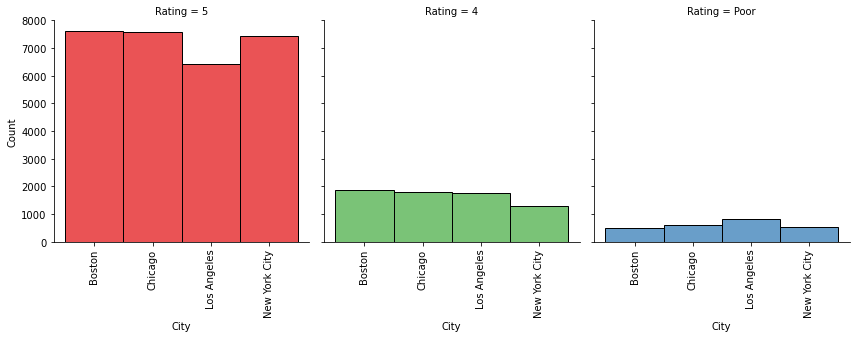

In [20]:
# %matplotlib notebook
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1", height=4,
                            col_order=ta_chng_rat.Rating.value_counts().index)
ratingsgrid.map(sns.histplot, 'City', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)

### Ratings Count broken down by Attraction

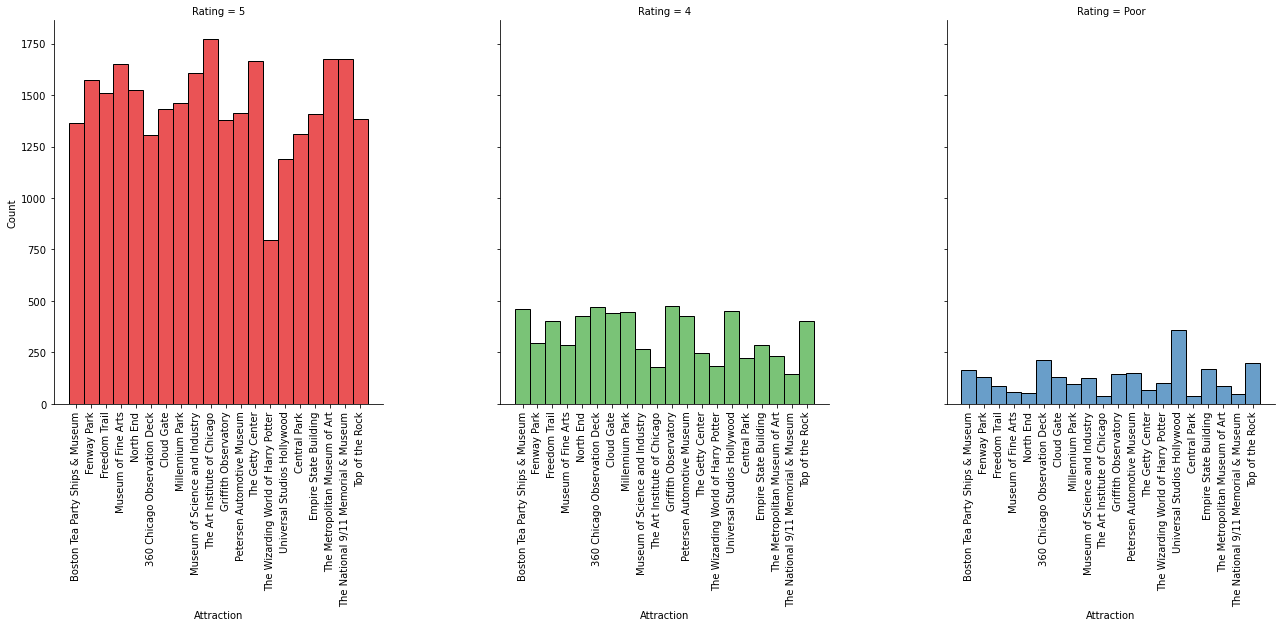

In [21]:
ratingsgrid = sns.FacetGrid(data=ta_chng_rat, col='Rating', hue="Rating", palette="Set1",
                            col_order=ta_chng_rat.Rating.value_counts().index, height=6.25, aspect=1)
ratingsgrid.map(sns.histplot, 'Attraction', kde=False)
ratingsgrid.set_xticklabels(rotation='vertical', fontsize=10)


# Analyzing Boston

### Analyzing by Rating (5 stars, 4 stars, Poor)

In [22]:
ta_5vspoor = ta_chng_rat[(ta_chng_rat['City']=='Boston') ]

ta_5vspoor.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
20289,Freedom Trail,Boston,2019-10-01,2019-09-01,25,4,0,4,We decided to do the trail over a couple of da...,Self guided walk,JulieS1000,NEW SOUTH WALES,AUSTRALIA,,,,4
26401,North End,Boston,2019-11-01,2019-05-01,41,34,1,5,My favorite city !! Best food .. Old world Ita...,LOVE LOVE LOVE the NORTH END !!!,Leyna65,MERRICK,NY,,,,5
28093,Fenway Park,Boston,2019-10-01,2019-10-01,32,52,0,5,Iâ€™ve been enjoying baseball for a long time ...,A Day at the Old Ball Park,David M,,,,,,5
23903,Boston Tea Party Ships & Museum,Boston,2019-01-01,2019-01-01,47,7,0,5,Very interesting tour and museum. Employees dr...,Worth it!,Suzan R,SAN ANTONIO,TX,,,,5
21655,Museum of Fine Arts,Boston,2018-03-01,2018-02-01,15,5,0,4,The MFA has something for EVERYONE from mummyâ...,Free on holidays!,Nan D,BOSTON,MA,,,,4
21613,Museum of Fine Arts,Boston,2018-02-01,2018-01-01,99,27,0,5,"I really thought this was special, and a must ...",Absolutely amazing Museum!!! A must visit!,GregT Italiano,,,,,,5
27040,Fenway Park,Boston,2019-01-01,2019-01-01,81,42,0,5,"Would recommend going on this tour, was a good...",Good tour,danw21674,LONDON,UNITED KINGDOM,,,,5
27996,Fenway Park,Boston,2019-09-01,2019-09-01,23,3,0,5,We love visiting ballparks and this was well w...,Must see!,sandir29,GALLITZIN,PA,,,,5
20602,Freedom Trail,Boston,2020-03-01,2019-09-01,238,38,0,5,I did not intent to walk the Freedom Trail. My...,You can see so much of Boston on this trail.,TarJa,SALT LAKE CITY,UT,,,,5
23416,Boston Tea Party Ships & Museum,Boston,2018-05-01,2018-04-01,7,0,0,5,"My husband, 3 sons (11,11 & 9) really enjoyed ...",Fun & engaging experience,Nicole G,BAKERSFIELD,UNITED STATES,,,,5


## Using Word Lemmatizer to Analyze Text Data

### Single Word Analysis

#### 5 Star Analysis

In [23]:
lemmatizer= WordNetLemmatizer()
stop_filters = stopwords.words('english') + list(string.punctuation) +\
['boston', '’', "n't", "'s", 'u', 'get', "'m", 'also', '...' ,"'", '`', '``', '-', '"', "''", '""']

# Word Count
corpus_5star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==5]['Text']).lower()
tokens_5star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star)\
                if tokens not in stop_filters]

fdist_5star = FreqDist(tokens_5star)
fdist_5star.most_common(50)

[('tour', 3360),
 ('great', 3163),
 ('museum', 2419),
 ('history', 2305),
 ('time', 2139),
 ('see', 1937),
 ('trail', 1632),
 ('visit', 1561),
 ('day', 1547),
 ('tea', 1543),
 ('one', 1456),
 ('place', 1456),
 ('well', 1411),
 ('north', 1343),
 ('end', 1308),
 ('art', 1293),
 ('go', 1262),
 ('park', 1248),
 ('walk', 1199),
 ('guide', 1162),
 ('lot', 1134),
 ('restaurant', 1128),
 ('way', 1075),
 ('really', 1067),
 ('fun', 1033),
 ('many', 1021),
 ('good', 1019),
 ('much', 1016),
 ('fenway', 1008),
 ('experience', 1006),
 ('take', 973),
 ('old', 968),
 ('food', 953),
 ('game', 931),
 ('would', 909),
 ('freedom', 894),
 ('worth', 890),
 ('exhibit', 889),
 ('italian', 873),
 ('must', 838),
 ('area', 838),
 ('around', 816),
 ('recommend', 800),
 ('enjoyed', 793),
 ('hour', 773),
 ('collection', 763),
 ('like', 753),
 ('part', 733),
 ('shop', 719),
 ('walking', 719)]

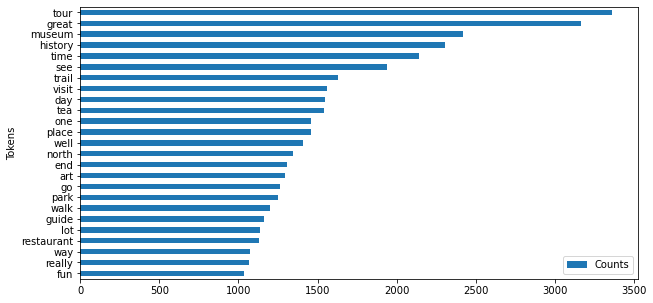

In [24]:
# Graph of Word Count
fdist_5star_graph = pd.DataFrame(fdist_5star.most_common(25),
                                 columns=['Tokens',
                                          'Counts']).set_index('Tokens').plot(kind='barh')
fdist_5star_graph.invert_yaxis()

- 4 Star Analysis

In [25]:
# prepping 4 star word count graph
corpus_4star = ' '.join(ta_5vspoor[ta_5vspoor['Rating']==4]['Text']).lower()
tokens_4star = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_4star)\
                if tokens not in stop_filters]

fdist_4star = FreqDist(tokens_4star)
fdist_4star.most_common(50)

[('tour', 786),
 ('great', 663),
 ('history', 542),
 ('tea', 530),
 ('time', 492),
 ('museum', 486),
 ('see', 470),
 ('trail', 455),
 ('good', 417),
 ('lot', 382),
 ('place', 354),
 ('walk', 353),
 ('visit', 326),
 ('well', 320),
 ('restaurant', 320),
 ('end', 311),
 ('would', 305),
 ('way', 304),
 ('day', 302),
 ('one', 301),
 ('really', 295),
 ('north', 288),
 ('guide', 285),
 ('around', 283),
 ('fun', 277),
 ('take', 263),
 ('area', 256),
 ('go', 252),
 ('party', 250),
 ('park', 248),
 ('old', 247),
 ('freedom', 239),
 ('nice', 238),
 ('worth', 234),
 ('little', 229),
 ('many', 229),
 ('italian', 229),
 ('enjoyed', 225),
 ('experience', 220),
 ('like', 214),
 ('ship', 213),
 ('shop', 212),
 ('walking', 211),
 ('hour', 204),
 ('part', 202),
 ('much', 201),
 ('interesting', 200),
 ('game', 199),
 ('art', 196),
 ('food', 183)]

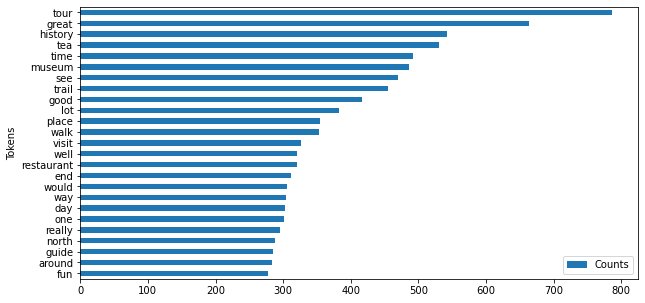

In [26]:
# Graph of Word Count
fdist_4star_graph = pd.DataFrame(fdist_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [27]:
# prepping poor word count graph
corpus_poor = ' '.join(ta_5vspoor[ta_5vspoor['Rating']=='Poor']['Text']).lower()
tokens_poor = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor)\
               if tokens not in stop_filters]

fdist_poor = FreqDist(tokens_poor)
fdist_poor.most_common(50)

[('tour', 360),
 ('museum', 189),
 ('would', 151),
 ('tea', 149),
 ('time', 134),
 ('see', 125),
 ('history', 117),
 ('good', 116),
 ('one', 116),
 ('go', 109),
 ('guide', 105),
 ('like', 101),
 ('great', 100),
 ('day', 99),
 ('experience', 99),
 ('trail', 96),
 ('park', 95),
 ('people', 94),
 ('really', 89),
 ('u', 85),
 ('place', 83),
 ('ticket', 81),
 ('game', 81),
 ('much', 79),
 ('way', 78),
 ('could', 78),
 ('fenway', 78),
 ('around', 76),
 ('lot', 74),
 ('ship', 73),
 ('visit', 72),
 ('thing', 70),
 ('little', 68),
 ('interesting', 67),
 ('group', 66),
 ('seat', 66),
 ('nice', 64),
 ('walk', 63),
 ('room', 62),
 ('kid', 61),
 ('shop', 58),
 ('went', 57),
 ('stadium', 57),
 ('part', 56),
 ('well', 55),
 ('take', 55),
 ('fan', 55),
 ('back', 54),
 ('actor', 53),
 ('however', 52)]

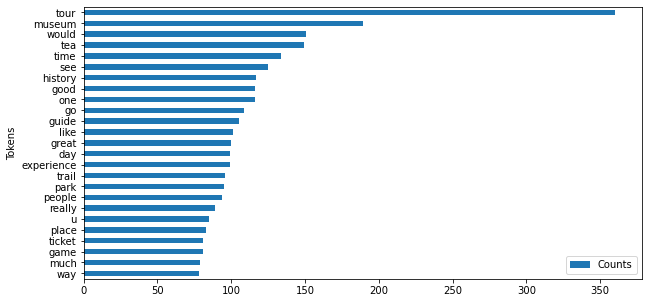

In [28]:
# Graph of Word Count
fdist_poor_graph = pd.DataFrame(fdist_poor.most_common(25),
                                columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_poor_graph.invert_yaxis()

- We can see that most of the reviews that gave 3 or fewer stars mentioned tours the most

### Bigram Analysis

- 5 Star Analysis

In [29]:
# 5 star bigram
bigram_5star = list(nltk.bigrams(tokens_5star))
fdist_bi_5star = FreqDist(bigram_5star)
fdist_bi_5star.most_common(50)

[(('north', 'end'), 983),
 (('freedom', 'trail'), 854),
 (('tea', 'party'), 578),
 (('tour', 'guide'), 469),
 (('fenway', 'park'), 406),
 (('paul', 'revere'), 384),
 (('red', 'sox'), 379),
 (('highly', 'recommend'), 378),
 (('well', 'worth'), 312),
 (('north', 'church'), 302),
 (('green', 'monster'), 261),
 (('baseball', 'fan'), 257),
 (('old', 'north'), 257),
 (('must', 'see'), 234),
 (('italian', 'restaurant'), 232),
 (('gift', 'shop'), 221),
 (('revere', 'house'), 214),
 (('bunker', 'hill'), 213),
 (('great', 'way'), 195),
 (('along', 'way'), 195),
 (('really', 'enjoyed'), 193),
 (('guided', 'tour'), 193),
 (('great', 'place'), 192),
 (('fine', 'art'), 188),
 (('italian', 'food'), 186),
 (('tea', 'room'), 167),
 (('us', 'constitution'), 160),
 (('well', 'done'), 158),
 (('art', 'museum'), 156),
 (('great', 'time'), 153),
 (('much', 'history'), 152),
 (('easy', 'follow'), 149),
 (('much', 'see'), 145),
 (('year', 'old'), 144),
 (('walk', 'around'), 142),
 (('red', 'brick'), 141),
 ((

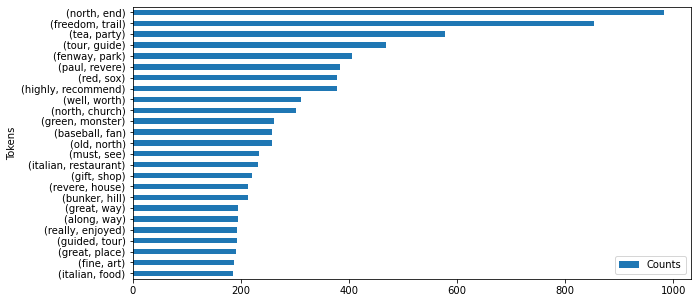

In [30]:
# Graph of 5 Star Bigram
fdist_bi_5star_graph = pd.DataFrame(fdist_bi_5star.most_common(25),
                                    columns=['Tokens',
                                             'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_graph.invert_yaxis()

- 4 Star Analysis

In [31]:
# getting 4 star bigram
bigram_4star = list(nltk.bigrams(tokens_4star))
fdist_bi_4star = FreqDist(bigram_4star)
fdist_bi_4star.most_common(50)

[(('tea', 'party'), 230),
 (('freedom', 'trail'), 227),
 (('north', 'end'), 215),
 (('paul', 'revere'), 104),
 (('tour', 'guide'), 86),
 (('italian', 'restaurant'), 77),
 (('red', 'sox'), 74),
 (('gift', 'shop'), 66),
 (('great', 'way'), 62),
 (('fenway', 'park'), 61),
 (('north', 'church'), 60),
 (('revere', 'house'), 58),
 (('really', 'enjoyed'), 56),
 (('worth', 'visit'), 55),
 (('well', 'worth'), 54),
 (('old', 'north'), 51),
 (('walk', 'around'), 50),
 (('guided', 'tour'), 49),
 (('red', 'brick'), 49),
 (('along', 'way'), 49),
 (('baseball', 'fan'), 49),
 (('great', 'place'), 47),
 (('green', 'monster'), 44),
 (('would', 'recommend'), 43),
 (('must', 'see'), 41),
 (('little', 'italy'), 40),
 (('bunker', 'hill'), 39),
 (('italian', 'food'), 38),
 (('tea', 'overboard'), 37),
 (('tea', 'room'), 37),
 (('lot', 'history'), 37),
 (('easy', 'follow'), 36),
 (('walking', 'tour'), 35),
 (('mike', 'pastry'), 35),
 (('great', 'time'), 34),
 (('throw', 'tea'), 33),
 (('throwing', 'tea'), 32),

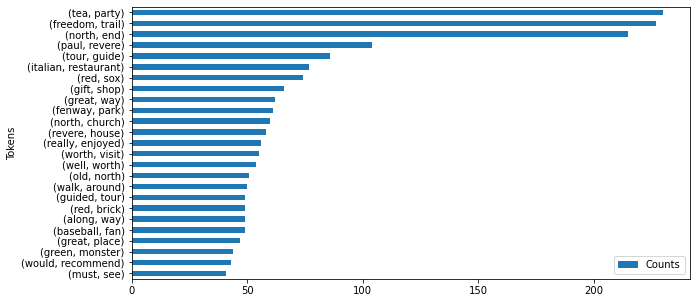

In [32]:
# Graph of 4 Star Bigram
fdist_bi_4star_graph = pd.DataFrame(fdist_bi_4star.most_common(25), columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_4star_graph.invert_yaxis()

- Poor Rating Analysis

In [33]:
# getting poor bigram
bigram_poor = list(nltk.bigrams(tokens_poor))
fdist_bi_poor = FreqDist(bigram_poor)
fdist_bi_poor.most_common(50)

[(('tour', 'guide'), 44),
 (('tea', 'party'), 40),
 (('freedom', 'trail'), 36),
 (('gift', 'shop'), 27),
 (('red', 'sox'), 26),
 (('north', 'end'), 22),
 (('tea', 'room'), 19),
 (('green', 'monster'), 17),
 (('guided', 'tour'), 15),
 (('fenway', 'park'), 15),
 (('baseball', 'fan'), 15),
 (('many', 'people'), 13),
 (('paul', 'revere'), 13),
 (('walk', 'around'), 12),
 (('museum', 'experience'), 11),
 (('actor', 'good'), 10),
 (('part', 'tour'), 10),
 (('locker', 'room'), 10),
 (('bunker', 'hill'), 10),
 (('year', 'old'), 9),
 (('ship', 'museum'), 9),
 (('sox', 'fan'), 9),
 (('took', 'u'), 9),
 (('one', 'hour'), 8),
 (('replica', 'ship'), 8),
 (('felt', 'like'), 8),
 (('much', 'better'), 8),
 (('tour', 'group'), 8),
 (('across', 'street'), 8),
 (('must', 'see'), 8),
 (('old', 'north'), 8),
 (('north', 'church'), 8),
 (('easy', 'follow'), 8),
 (('tea', 'box'), 7),
 (('really', 'good'), 7),
 (('ticket', 'online'), 7),
 (('would', 'recommend'), 7),
 (('tea', 'chest'), 7),
 (('tourist', 'tra

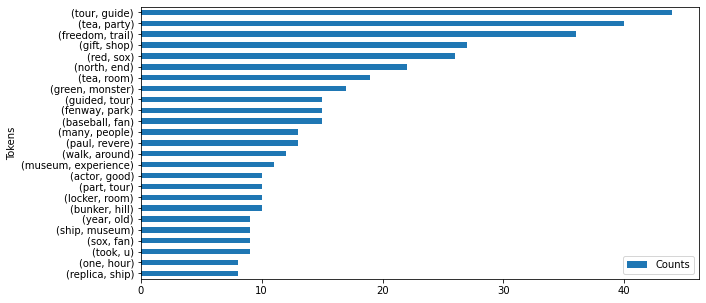

In [34]:
# Graph of Poor Bigram
fdist_bi_poor_graph = pd.DataFrame(fdist_bi_poor.most_common(25),
                                   columns=['Tokens',
                                            'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_poor_graph.invert_yaxis()

- Plot of the top 25 most used words for reviews regarding the top 5 Boston Attractions

- We see some similar words that we saw in the analysis of helpful reviews of Boston's Attractions

- A small sample of the reviews found where the word 'tour' was mentioned in helpful reviews of Boston

In [35]:
# bigrams for 5 star reviews
bigram_words_5star = [tup[0] for tup in fdist_bi_5star.most_common(50)]
bigram_words_5star

[('north', 'end'),
 ('freedom', 'trail'),
 ('tea', 'party'),
 ('tour', 'guide'),
 ('fenway', 'park'),
 ('paul', 'revere'),
 ('red', 'sox'),
 ('highly', 'recommend'),
 ('well', 'worth'),
 ('north', 'church'),
 ('green', 'monster'),
 ('baseball', 'fan'),
 ('old', 'north'),
 ('must', 'see'),
 ('italian', 'restaurant'),
 ('gift', 'shop'),
 ('revere', 'house'),
 ('bunker', 'hill'),
 ('great', 'way'),
 ('along', 'way'),
 ('really', 'enjoyed'),
 ('guided', 'tour'),
 ('great', 'place'),
 ('fine', 'art'),
 ('italian', 'food'),
 ('tea', 'room'),
 ('us', 'constitution'),
 ('well', 'done'),
 ('art', 'museum'),
 ('great', 'time'),
 ('much', 'history'),
 ('easy', 'follow'),
 ('much', 'see'),
 ('year', 'old'),
 ('walk', 'around'),
 ('red', 'brick'),
 ('museum', 'fine'),
 ('little', 'italy'),
 ('make', 'sure'),
 ('ball', 'park'),
 ('worth', 'visit'),
 ('one', 'best'),
 ('great', 'experience'),
 ('american', 'history'),
 ('way', 'see'),
 ('mike', 'pastry'),
 ('would', 'recommend'),
 ('throw', 'tea'),
 

In [36]:
# bigrams for 4 star reviews
bigram_words_4star = [tup[0] for tup in fdist_bi_4star.most_common(50)]
bigram_words_4star

[('tea', 'party'),
 ('freedom', 'trail'),
 ('north', 'end'),
 ('paul', 'revere'),
 ('tour', 'guide'),
 ('italian', 'restaurant'),
 ('red', 'sox'),
 ('gift', 'shop'),
 ('great', 'way'),
 ('fenway', 'park'),
 ('north', 'church'),
 ('revere', 'house'),
 ('really', 'enjoyed'),
 ('worth', 'visit'),
 ('well', 'worth'),
 ('old', 'north'),
 ('walk', 'around'),
 ('guided', 'tour'),
 ('red', 'brick'),
 ('along', 'way'),
 ('baseball', 'fan'),
 ('great', 'place'),
 ('green', 'monster'),
 ('would', 'recommend'),
 ('must', 'see'),
 ('little', 'italy'),
 ('bunker', 'hill'),
 ('italian', 'food'),
 ('tea', 'overboard'),
 ('tea', 'room'),
 ('lot', 'history'),
 ('easy', 'follow'),
 ('walking', 'tour'),
 ('mike', 'pastry'),
 ('great', 'time'),
 ('throw', 'tea'),
 ('throwing', 'tea'),
 ('highly', 'recommend'),
 ('make', 'sure'),
 ('walking', 'around'),
 ('year', 'old'),
 ('us', 'constitution'),
 ('american', 'history'),
 ('way', 'see'),
 ('party', 'ship'),
 ('well', 'done'),
 ('ship', 'museum'),
 ('really'

In [37]:
# bigrams for poor reviews
bigram_words_poor = [tup[0] for tup in fdist_bi_poor.most_common(50)]
bigram_words_poor

[('tour', 'guide'),
 ('tea', 'party'),
 ('freedom', 'trail'),
 ('gift', 'shop'),
 ('red', 'sox'),
 ('north', 'end'),
 ('tea', 'room'),
 ('green', 'monster'),
 ('guided', 'tour'),
 ('fenway', 'park'),
 ('baseball', 'fan'),
 ('many', 'people'),
 ('paul', 'revere'),
 ('walk', 'around'),
 ('museum', 'experience'),
 ('actor', 'good'),
 ('part', 'tour'),
 ('locker', 'room'),
 ('bunker', 'hill'),
 ('year', 'old'),
 ('ship', 'museum'),
 ('sox', 'fan'),
 ('took', 'u'),
 ('one', 'hour'),
 ('replica', 'ship'),
 ('felt', 'like'),
 ('much', 'better'),
 ('tour', 'group'),
 ('across', 'street'),
 ('must', 'see'),
 ('old', 'north'),
 ('north', 'church'),
 ('easy', 'follow'),
 ('tea', 'box'),
 ('really', 'good'),
 ('ticket', 'online'),
 ('would', 'recommend'),
 ('tea', 'chest'),
 ('tourist', 'trap'),
 ('time', 'money'),
 ('go', 'back'),
 ('make', 'sure'),
 ('batting', 'practice'),
 ('red', 'brick'),
 ('art', 'museum'),
 ('little', 'italy'),
 ('throwing', 'tea'),
 ('tea', 'shop'),
 ('people', 'group'),


In [38]:
# finding common words between all 3 lists
bigram_common_words = list(set(bigram_words_5star).intersection(bigram_words_poor))
bigram_common_words = list(set(bigram_common_words).intersection(bigram_words_4star))
bigram_common_words

[('old', 'north'),
 ('bunker', 'hill'),
 ('fenway', 'park'),
 ('freedom', 'trail'),
 ('green', 'monster'),
 ('make', 'sure'),
 ('tea', 'party'),
 ('would', 'recommend'),
 ('gift', 'shop'),
 ('guided', 'tour'),
 ('paul', 'revere'),
 ('year', 'old'),
 ('north', 'church'),
 ('easy', 'follow'),
 ('north', 'end'),
 ('baseball', 'fan'),
 ('tour', 'guide'),
 ('must', 'see'),
 ('little', 'italy'),
 ('red', 'sox'),
 ('tea', 'room'),
 ('red', 'brick'),
 ('walk', 'around')]

In [39]:
# creating a dataframe with the words in common
words_5star_count = [tup for tup in fdist_bi_5star.most_common(50) if tup[0] in bigram_common_words]
words_4star_count = [tup for tup in fdist_bi_4star.most_common(50) if tup[0] in bigram_common_words]
words_poor_count = [tup for tup in fdist_bi_poor.most_common(50) if tup[0] in bigram_common_words]

words_5star_count_df = pd.DataFrame(words_5star_count, columns = ['Words', '5Star_Count'])
words_4star_count_df = pd.DataFrame(words_4star_count, columns = ['Words', '4Star_Count'])
words_poor_count_df = pd.DataFrame(words_poor_count, columns = ['Words', 'Poor_Count'])

from functools import reduce

dfs = [words_5star_count_df, words_4star_count_df, words_poor_count_df]

combined_words_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), dfs)
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",983,215,22
1,"(freedom, trail)",854,227,36
2,"(tea, party)",578,230,40
3,"(tour, guide)",469,86,44
4,"(fenway, park)",406,61,15
5,"(paul, revere)",384,104,13
6,"(red, sox)",379,74,26
7,"(north, church)",302,60,8
8,"(green, monster)",261,44,17
9,"(baseball, fan)",257,49,15


In [40]:
# getting the percentages of the word counts within each ratings group

# getting the counts of the ratings
count_5star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==5)])
count_4star_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']==4)])
count_poor_ttl = len(ta_5vspoor[(ta_5vspoor['Rating']=='Poor')])

count_total = count_5star_ttl + count_4star_ttl + count_poor_ttl

combined_words_df[['5Star_Count']] = combined_words_df[['5Star_Count']]/count_5star_ttl
combined_words_df[['4Star_Count']] = combined_words_df[['4Star_Count']]/count_4star_ttl
combined_words_df[['Poor_Count']] = combined_words_df[['Poor_Count']]/count_poor_ttl
combined_words_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(north, end)",0.128969,0.114789,0.044898
1,"(freedom, trail)",0.112044,0.121196,0.073469
2,"(tea, party)",0.075833,0.122798,0.081633
3,"(tour, guide)",0.061532,0.045916,0.089796
4,"(fenway, park)",0.053267,0.032568,0.030612
5,"(paul, revere)",0.050380,0.055526,0.026531
6,"(red, sox)",0.049724,0.039509,0.053061
7,"(north, church)",0.039622,0.032034,0.016327
8,"(green, monster)",0.034243,0.023492,0.034694
9,"(baseball, fan)",0.033718,0.026161,0.030612


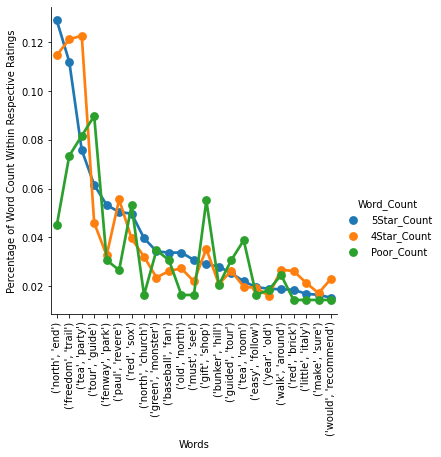

<Figure size 1440x720 with 0 Axes>

In [41]:
# creating a graph to show the discrepancy of the words used
combined_words_df_plot = combined_words_df.melt('Words', var_name='Word_Count',
                                                value_name = 'Count Percentage')
combined_words_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count',
                                     data=combined_words_df_plot, kind='point')
plt.figure(figsize=(20,10))
combined_words_df_plot.axes[0,0].set_ylabel("Percentage of Word Count Within Respective Ratings")
combined_words_df_plot.set_xticklabels(rotation='vertical', fontsize=10)

plt.show()

In [42]:
# looking at unique pairs of words
list(set(bigram_words_5star) - set(bigram_words_4star) - set(bigram_words_poor))

[('much', 'history'),
 ('museum', 'fine'),
 ('special', 'exhibit'),
 ('great', 'experience'),
 ('fine', 'art'),
 ('much', 'see'),
 ('one', 'best'),
 ('ball', 'park')]

In [43]:
# looking at unique pairs of words
list(set(bigram_words_4star) - set(bigram_words_5star) - set(bigram_words_poor))

[('tea', 'overboard'),
 ('lot', 'history'),
 ('walking', 'tour'),
 ('party', 'ship'),
 ('historic', 'site'),
 ('walking', 'around'),
 ('faneuil', 'hall')]

In [44]:
# looking at unique pairs of words
# even taking 'u' and "u" out with the lemmatizer does not actually take the letter out
list(set(bigram_words_poor) - set(bigram_words_4star) - set(bigram_words_5star))

[('sox', 'fan'),
 ('much', 'better'),
 ('time', 'money'),
 ('locker', 'room'),
 ('part', 'tour'),
 ('tea', 'box'),
 ('tea', 'chest'),
 ('took', 'u'),
 ('batting', 'practice'),
 ('ticket', 'online'),
 ('tour', 'group'),
 ('museum', 'experience'),
 ('many', 'people'),
 ('tea', 'shop'),
 ('across', 'street'),
 ('customer', 'service'),
 ('replica', 'ship'),
 ('tourist', 'trap'),
 ('felt', 'like'),
 ('one', 'hour'),
 ('actor', 'good'),
 ('people', 'group')]

In [45]:
# looking at sub-df for 'gift' 'shop'
important_list = ['Attraction', 'Rating', 'Text', 'Title', 'Username', 'Old_Rating']

ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))][important_list]

,Attraction,Rating,Text,Title,Username,Old_Rating
22579,Boston Tea Party Ships & Museum,Poor,Had to to this for our visit to Boston. We had...,Interesting.,tinytrace,3
22648,Boston Tea Party Ships & Museum,Poor,"The ship is fun to look at, but the ceremony a...",Iced Tea to Drink Rather than Throw in Harbor,KathrynCleveland,3
22649,Boston Tea Party Ships & Museum,Poor,This is run by (for Profit?) Historic Tours of...,Private Company and not worth it,GustavSpeed,2
22705,Boston Tea Party Ships & Museum,Poor,intended to visit the museum but a lot of scho...,More of a place for school trips,Geraldine L,3
22742,Boston Tea Party Ships & Museum,Poor,Ok - you have to go there as it is globally fa...,Had to go!,Honisoiquimalypense,3
22811,Boston Tea Party Ships & Museum,Poor,Stay away! I attempted to purchase three items...,Taxation without Representation,RI_Mom_1,1
22843,Boston Tea Party Ships & Museum,Poor,This was fun to see and would likely be really...,Fun to see.,Michelle2560,3
22939,Boston Tea Party Ships & Museum,Poor,I wish I could have said I loved every minute ...,More for kids...,Sara H,3
22943,Boston Tea Party Ships & Museum,Poor,We opted for this trip as add on to our trolle...,Good experience about history,TravelJunkie707,3
22973,Boston Tea Party Ships & Museum,Poor,Booked tickets online through viator. Timed sl...,Boston tea party ship/Museum,yogianddaisy,3


Text(0.5, 1.0, 'Count of Poorly Rated Reviews Containing "Gift" and "Shop"')

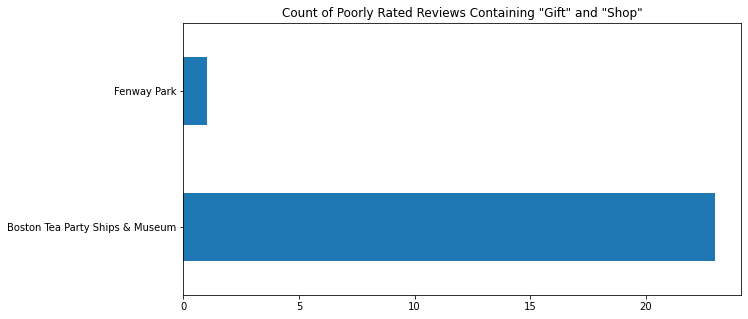

In [46]:
# creating bar graph to check the count of 'gift' and 'shop'
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))]['Attraction'].value_counts().plot(kind='barh')

plt.title('Count of Poorly Rated Reviews Containing "Gift" and "Shop"')

### Looking at some reviews

In [47]:
print(ta_5vspoor.loc[23023, 'Username'])
ta_5vspoor.loc[23023, 'Text']

DavvaW


"Sorry guys but we really didn't like this museum. The role play by actors in costumes was frankly embarrassing (British reserve I guess) and so little history about what actually happened and its significance. We all found the shouty actors irritating after a while, and the one exhibit in the museum just made us laugh - a tea chest on a rotating podium with spotlights, behind glass. Really? The crown jewels in the Tower of London have less fanfare than that. The film was really good though (no shouting) but the talking portraits were frankly silly. The portrayal of King George was laughable and comedic - not suitable for a historic museum and a bit insulting I thought (although understandable given the context I guess). Sorry guys, this place is clearly aimed at a domestic audience and to be fair the US visitors seemed to love it. However we just didn't enjoy it and the whole experience left us cold and irritable. Great gift shop though with the best selection we saw anywhere in Bosto

In [48]:
print(ta_5vspoor.loc[27737, 'Username'])
ta_5vspoor.loc[27737, 'Text']

mjp092158


'I upgraded my tour to the $35 package which allowed me and my guests (6x35) to go on the field and tour the green monster. The tour amounted to my group standing on the field behind home plate for 20 unbearable minutes with no interaction with our guide as she sat in the field boxes chatting with other guides. Then we proceed to the green monster, where again we sat idle for 20 min before we headed down to the picture gift shop. This clearly needs an upgrade to the level of the rest of the Fenway experience'

In [49]:
print(ta_5vspoor.loc[22648, 'Username'])
ta_5vspoor.loc[22648, 'Text']

KathrynCleveland


'The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great.'

In [50]:
print(ta_5vspoor.loc[23859, 'Username'])
ta_5vspoor.loc[23859, 'Text']

Nicky L


"We didn't pay the $30 for the tour but the gift shop is very good and there are nice views of the ships for photos, bit of a tourist trap and being British we didn't want to take the blame for history !! However it would be great for children to learn the story in this setting and the tour did sound great fun."

In [51]:
pd.set_option('display.max_colwidth', None)
ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum') &
           (ta_5vspoor['Text'].str.contains('gift')) &
           (ta_5vspoor['Text'].str.contains('shop'))][['Text']]

,Text
22579,"Had to to this for our visit to Boston. We had it included with our hop on/off bus tickets. We arrived and they have showings throughout the day. Possibly every half hour. We went straight in. They partly replay parts and you watch some on screens. You go on a boat and throw a padded box over the side, to resemble throwing the tea over board. Overall it was fairly interesting, and it was good to learn a little more about it. They have a very good gift shop and tea shop with cakes. Look for sale items."
22648,"The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great."
22649,"This is run by (for Profit?) Historic Tours of America, Inc. an entertainment company. They charge $29 to go inside. You are first treated to two actors who yell out a script about the ""origins"" of the American split with the British (I guess for those who never got past the second grade), then you are whisked to a ship look alike and herded through the place. You can hurl fake tea bundles into the bay (although they tell you this was not done - they had to open the bundles to pour out the tea, go figure). Next you are quickly escorted into a dark room where holograph figures yell at you. Next you are marched into a room where they show you the one artifact in this ""museum"": as actual crate from the Tea Party. You then hear two paintings yell and argue. The next room has a film (stand) about the first shot of the American Revolution before being forced upstair to the gift shop and overpriced tea room. Total Time 30 minutes (not counting the time in the gift shop)"
22705,intended to visit the museum but a lot of school trips so just went to the gift shop and tea shop. Would definitely recommend a visit to the tea shop.
22742,"Ok - you have to go there as it is globally famous. It is pretty fake with all the folks dressed up in 16th century clothes but it ir a bit cheesy for me. The 2 sailing boats look great, the gift shop is cool but my over-riding feeling was ""cheesy""! We did not pay to do the tossing of the tea over the side of the ship thing!"
22811,"Stay away! I attempted to purchase three items in the gift shop, two priced at $4.99 and one at $5.99. When the girl at the register rang up the items at a total of $22 and change, I suggested that something was wrong. She disagreed and didn't understand that $5 +$5 + $6= $16, plus approximately $1.30 in tax should total $17 and change, not $22. When the Manager came over and reviewed the transaction, she insisted that the computer was right. They were both so stubborn and rude and refused to take a moment to realize that the cashier had rang in one item twice resulting in an extra $5. Instead, the Manager told me I had to consider the tax because I'm in Massachusetts and not down South. I'm not from the South, so not sure what her point was, but we'd already agreed the tax was $1.30. She gave me a few choices, over-pay for the merchandise, buy tickets for the boat-tour (most likely a rip-off), or leave. I left, disappointed that these retail employees were unable to complete simple math and treat customers so badly."
22843,"This was fun to see and would likely be really great for small children. The costumes are elaborate and the staff are friendly and helpful. The gift shop was really fun. The ""tea"" is not really tea that they throw off the side, but this is likely due to the fact that throwing tea into the harbor would be really bad for the environment."
22939,"I wish I could have said I loved every minute of this tour, but I didn't. Just when you think it's going to end, it doesn't. I was hoping that by taking the tour, I'd learn a lot about the Boston Tea Party, but unfortunately, the tour guides who were in ""character"" the entire time, didn't engage my attention at all. It was like watching a bad play for an hour and a half. The positive thing about the tour was getting to go on the replicas of th

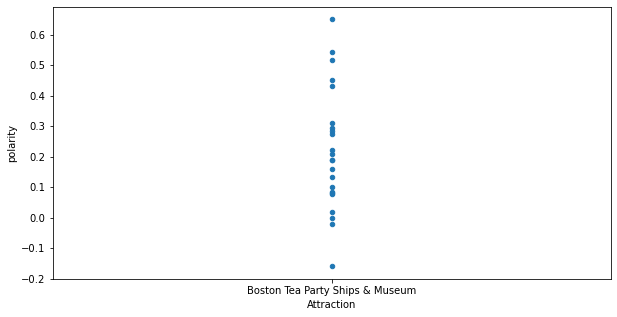

In [52]:
# looking at polarity for Bos tpsm
bos_tpsm_giftshop = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
                               (ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum') &
                               (ta_5vspoor['Text'].str.contains('gift')) &
                               (ta_5vspoor['Text'].str.contains('shop'))]

sample_size = len(bos_tpsm_giftshop)

sample = bos_tpsm_giftshop.sample(sample_size).apply(sentiment_func, axis=1)
sample.plot.scatter('Attraction', 'polarity').tick_params(axis='x')

In [53]:
# creating corpus
bos_tpsm_gs_text = bos_tpsm_giftshop['Text']
bos_tpsm_gs_text_pd = bos_tpsm_giftshop[['Text']]
bos_tpsm_gs_corpus = ' '.join(bos_tpsm_gs_text).lower()
bos_tpsm_gs_corpus

'had to to this for our visit to boston. we had it included with our hop on/off bus tickets. we arrived and they have showings throughout the day. possibly every half hour. we went straight in. they partly replay parts and you watch some on screens. you go on a boat and throw a padded box over the side, to resemble throwing the tea over board. overall it was fairly interesting, and it was good to learn a little more about it. they have a very good gift shop and tea shop with cakes. look for sale items. the ship is fun to look at, but the ceremony and costumers were quite cheesy. the gift shop is better than average. the employees were great. this is run by (for profit?) historic tours of america, inc. an entertainment company. they charge $29 to go inside. you are first treated to two actors who yell out a script about the "origins" of the american split with the british (i guess for those who never got past the second grade), then you are whisked to a ship look alike and herded throug

In [54]:
# viewing text
bos_tpsm_gs_text

22579                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Had to to this for our visit to Boston. We had it included with our hop on/off bus tickets. We a

In [55]:
bos_tpsm_gs_corpus_nltktxt = nltk.Text(bos_tpsm_gs_corpus.split())

In [56]:
# looking for clues around gift shop
bos_tpsm_gs_corpus_nltktxt.concordance('gift')

Displaying 24 of 24 matches:
more about it. they have a very good gift shop and tea shop with cakes. look f
and costumers were quite cheesy. the gift shop is better than average. the emp
n before being forced upstair to the gift shop and overpriced tea room. total 
inutes (not counting the time in the gift shop) intended to visit the museum b
 of school trips so just went to the gift shop and tea shop. would definitely 
 the 2 sailing boats look great, the gift shop is cool but my over-riding feel
mpted to purchase three items in the gift shop, two priced at $4.99 and one at
 staff are friendly and helpful. the gift shop was really fun. the "tea" is no
ng "adult" thing about the tour. the gift shop is also pretty nice. other than
l's tea room. they also have a great gift shop with some neat items. so depend
w is all staged. lovely tea room and gift shop. would recommend. the experienc
 and have some money to spend in the gift shop. sorry guys but we really didn'
ce left us cold and irr

In [57]:
# The concordance above does not tell us much. We will have to look through the text 1 by 1
bos_tpsm_gs_text_pd

,Text
22579,"Had to to this for our visit to Boston. We had it included with our hop on/off bus tickets. We arrived and they have showings throughout the day. Possibly every half hour. We went straight in. They partly replay parts and you watch some on screens. You go on a boat and throw a padded box over the side, to resemble throwing the tea over board. Overall it was fairly interesting, and it was good to learn a little more about it. They have a very good gift shop and tea shop with cakes. Look for sale items."
22648,"The ship is fun to look at, but the ceremony and costumers were quite cheesy. The gift shop is better than average. The employees were great."
22649,"This is run by (for Profit?) Historic Tours of America, Inc. an entertainment company. They charge $29 to go inside. You are first treated to two actors who yell out a script about the ""origins"" of the American split with the British (I guess for those who never got past the second grade), then you are whisked to a ship look alike and herded through the place. You can hurl fake tea bundles into the bay (although they tell you this was not done - they had to open the bundles to pour out the tea, go figure). Next you are quickly escorted into a dark room where holograph figures yell at you. Next you are marched into a room where they show you the one artifact in this ""museum"": as actual crate from the Tea Party. You then hear two paintings yell and argue. The next room has a film (stand) about the first shot of the American Revolution before being forced upstair to the gift shop and overpriced tea room. Total Time 30 minutes (not counting the time in the gift shop)"
22705,intended to visit the museum but a lot of school trips so just went to the gift shop and tea shop. Would definitely recommend a visit to the tea shop.
22742,"Ok - you have to go there as it is globally famous. It is pretty fake with all the folks dressed up in 16th century clothes but it ir a bit cheesy for me. The 2 sailing boats look great, the gift shop is cool but my over-riding feeling was ""cheesy""! We did not pay to do the tossing of the tea over the side of the ship thing!"
22811,"Stay away! I attempted to purchase three items in the gift shop, two priced at $4.99 and one at $5.99. When the girl at the register rang up the items at a total of $22 and change, I suggested that something was wrong. She disagreed and didn't understand that $5 +$5 + $6= $16, plus approximately $1.30 in tax should total $17 and change, not $22. When the Manager came over and reviewed the transaction, she insisted that the computer was right. They were both so stubborn and rude and refused to take a moment to realize that the cashier had rang in one item twice resulting in an extra $5. Instead, the Manager told me I had to consider the tax because I'm in Massachusetts and not down South. I'm not from the South, so not sure what her point was, but we'd already agreed the tax was $1.30. She gave me a few choices, over-pay for the merchandise, buy tickets for the boat-tour (most likely a rip-off), or leave. I left, disappointed that these retail employees were unable to complete simple math and treat customers so badly."
22843,"This was fun to see and would likely be really great for small children. The costumes are elaborate and the staff are friendly and helpful. The gift shop was really fun. The ""tea"" is not really tea that they throw off the side, but this is likely due to the fact that throwing tea into the harbor would be really bad for the environment."
22939,"I wish I could have said I loved every minute of this tour, but I didn't. Just when you think it's going to end, it doesn't. I was hoping that by taking the tour, I'd learn a lot about the Boston Tea Party, but unfortunately, the tour guides who were in ""character"" the entire time, didn't engage my attention at all. It was like watching a bad play for an hour and a half. The positive thing about the tour was getting to go on the replicas of th

## 'Tour' 'Guide'

In [58]:
# looking at poor tour guide reviews
tour_guide_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
                             (ta_5vspoor['Text'].str.contains('tour')) &
                             (ta_5vspoor['Text'].str.contains('guide'))][important_list]

tour_guide_poor

,Attraction,Rating,Text,Title,Username,Old_Rating
22637,Boston Tea Party Ships & Museum,Poor,"More of a one hour historical play (on stage) than anything else. I was excited to see the tea party ship, but was told this ship had just been built to the same scale. We did get to tour the ship after their little show. The tour guides are dressed up and speak (and pretend) like they are from the 1700s. I think KIDS will like this a lot. For adults IMO I think it's an hour I would have rather spent on a tour bus or seeing the state house.",A little too cutesy for adults,Jill123pink,3
22803,Boston Tea Party Ships & Museum,Poor,"We bought a hop on hop off old town trolley tour and we decided to get off on the stop in front of the Museum. It is on the left side of the Children's museum and close to the area for the tour to MIT. We get a discount from purchasing the trolley tour so we decided to might as well tour the museum. As you enter the room, a lady dressed in that era greeted us and handed us cards-showing what character we were assigned. We were also handed feathers symbolizing the disguise made so they won't be recognized if caught. You get to keep the cards and feathers at the end of the tour. We were supposed to relive a town hall meeting regarding taxation without representation -and went aboard a replica of the ship where the tea were kept. Got a sort of reenactment of how the tea were dumped in the ocean. Video clips were also shown in the museum. The tour guide was in character throughout the tour. Overall an okay tour if you want a piece of history.",A piece of history,marifern96,3
22842,Boston Tea Party Ships & Museum,Poor,"This could be so much better! The guides try hard to engage everyone but I found the chat all very samey and it got a bit boring. Need more interactive elements and the museum had one item in it, a tea box, not much of a museum really! Trying hard to be like Disney and failing. I love history but this left me cold! Abigail's tea room at the end however is excellent, $5.95 for bottomless mug of tea, five types to try and a souvenir mug to take home. Great Value! Don't do this tour if you are on a budget. Duck tour or USS constitution much better.",Not worth the money!,Georgiadrubbin,2
22939,Boston Tea Party Ships & Museum,Poor,"I wish I could have said I loved every minute of this tour, but I didn't. Just when you think it's going to end, it doesn't. I was hoping that by taking the tour, I'd learn a lot about the Boston Tea Party, but unfortunately, the tour guides who were in ""character"" the entire time, didn't engage my attention at all. It was like watching a bad play for an hour and a half. The positive thing about the tour was getting to go on the replicas of the ships.... and then there was a film at the end, which was the only interesting ""adult"" thing about the tour. The gift shop is also pretty nice. Other than that, there isn't too much to say about this...",More for kids...,Sara H,3
22943,Boston Tea Party Ships & Museum,Poor,"We opted for this trip as add on to our trolley tour. Since my daughter is going into the 5th grade and they will be studying this history, I thought it would be neat for her to experience it and learn some things. You first enter a sitting hall where the realistic experience begins. A woman (Rebecca Hodge) dressed in period wear was greeting each family giving out character cards. She would speak to each family making fun conversation with the kids....except for us! I know my daughter and I were only a family of 2 but there was no reason to basically ignore us. My daughter and I felt a bit left out and miffed. Hence my 3 star review since this is more geared towards children. After getting hyped by Samuel Adams, we were all ushered to the ship where a young gentleman gave us a tour and let us throw tea over board! He was to listen to. After we got off the ship we were in the back area of the building, where the lady came back to speak to us about the participants 

In [59]:
for i in list(tour_guide_poor.index):
    print(i)
    print(tour_guide_poor.loc[i, 'Attraction'])
    print(tour_guide_poor.loc[i, 'Text'])
    print('\n')
    print('-'*50)

22637
Boston Tea Party Ships & Museum
More of a one hour historical play (on stage) than anything else. I was excited to see the tea party ship, but was told this ship had just been built to the same scale. We did get to tour the ship after their little show. The tour guides are dressed up and speak (and pretend) like they are from the 1700s. I think KIDS will like this a lot. For adults IMO I think it's an hour I would have rather spent on a tour bus or seeing the state house.


--------------------------------------------------
22803
Boston Tea Party Ships & Museum
We bought a hop on hop off old town trolley tour and we decided to get off on the stop in front of the Museum. It is on the left side of the Children's museum and close to the area for the tour to MIT. We get a discount from purchasing the trolley tour so we decided to might as well tour the museum. As you enter the room, a lady dressed in that era greeted us and handed us cards-showing what character we were assigned. We 

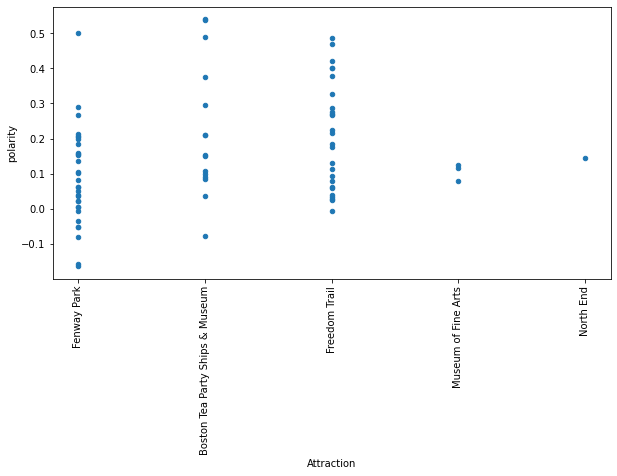

In [60]:
# looking at the polarity
sample_size_tg = len(tour_guide_poor)

sample_tg = tour_guide_poor.sample(sample_size_tg).apply(sentiment_func, axis=1)
sample_tg.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [61]:
# examining the reviews 
sample_tg[sample_tg['polarity']<0][['Attraction', 'Text']]

,Attraction,Text
27737,Fenway Park,"I upgraded my tour to the $35 package which allowed me and my guests (6x35) to go on the field and tour the green monster. The tour amounted to my group standing on the field behind home plate for 20 unbearable minutes with no interaction with our guide as she sat in the field boxes chatting with other guides. Then we proceed to the green monster, where again we sat idle for 20 min before we headed down to the picture gift shop. This clearly needs an upgrade to the level of the rest of the Fenway experience"
27986,Fenway Park,"Unfortunately My husband and I didn't have a good experience at Fenway Park. The day we went the park was preparing for a Billy Joel concert. The field was full of seats. We were unable to see the whole field. It seemed the park was selling as many tickets as they would for the tour time. The group was,so big that they needed a other guide at the end of the group so that they know where it ended. We were unable to stop to look at the hall of gamers, the jerseys, or the gloves. We were so rushed. The guide seemed annoyed and just wanted it to be done. What a disappointment."
22999,Boston Tea Party Ships & Museum,"My husbands comment was this was the Boston version of Disney. Over-priced and not very good. Kids enjoyed throwing the ""fake"" tea boxes overboard but I would have preferred a generally informative guide and much faster walk through instead of having to listen through the long winded tour and once inside multiple video presentations. Took up too much time and we missed other things. Disappointing and not recommended."
28384,Fenway Park,"I was so excited to tour Fenway but was disappointed. Our tour guide originally said they were going to split is into two groups because our group was so large but that didn't happen. So that means if you are stuck in the back of the group it is hard to hear and also was a problem when we went to sit up on the green monster and there was a limited area for us to be in. The tour only took us to various parts of the park where you could sit if you went to a game. We did not see any dugout, press box or get to go on the field. Very disappointing. I've been to several ballpark tours and this was the worst. It was a 2 pm tour on a Saturday and there was a game that night but the players were not even there yet so not sure why we didn't get to see more."
26501,Fenway Park,"Tickets for this are available only on the day of the tour. IT IS A WASTE OF TIME AND MONEY!! We spent time on the field, were then ushered to sit down, the guide said that there was no time to talk about the history of the park (because the warm-up music started) but if you have questions to ask him. Then up to the Green Monster where we watched batting practice - and the tour was over. Are you kidding me?? The last time we took a group tour which was fun and informative - and you could buy tickets online. For this I had to go the the park earlier in the day to get the tickets? Forget about it!!"
27640,Fenway Park,"We called Fenway the day of our tour since the description on when we started was a little vague. Our game started at 4:05pm and we arrived at 1:30pm. *Caution*! There are a number of different tours available, and do NOT ask the ticket takers, because you will be run all over the place. Go to gate D. Hopefully you will be greeted by an Aviator representative close to your tour time. We were put with someone who had only been doing the â€œgeneralâ€ tours for a week. Our whole group (8-10) could tell we werenâ€™t getting the same tour as the other groups. Make sure you ask how long your guide has been doing this. Definitely not worth $75/person in my opinion."
19573,Freedom Trail,"We took a tour, and the guide was too political for us to enjoy it. We took a similar tour in Charleston and couldnâ€™t get enough. With all of Bostonâ€™s history, we expected more. Part of our problem, too, was we didnâ€™t like the city itself. Admittedly, we didnâ€™t see to

In [62]:
ta_5vspoor.loc[19768, 'Text']

"The Freedom Trail is a designated pedestrian route through central Boston, which takes you from the Common, through different areas of the town centre, past various landmarks, parks and monuments. Although paid guided tours are available, it can be just done as a self-guided walk. It's a pleasant walk, not too far and a good way to navigate through the city. Unfortunately, while the route itself is well marked by a continuous line on the floor, there are limited information boards or signs to alert you to what the points of interest are. Also, each venue on the route is individually managed and there's no co-ordination between them in terms of ticketing so while each may only be $10-20, for a family of 4 it quickly adds up to $70 plus! We didn't bother, but it was a nice enough walk!"

## 'Red' 'Sox'

In [63]:
# checking red sox 
red_sox_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
                             (ta_5vspoor['Text'].str.contains('red')) &
                             (ta_5vspoor['Text'].str.contains('sox'))][important_list]

red_sox_poor

,Attraction,Rating,Text,Title,Username,Old_Rating
28238,Fenway Park,Poor,"When i went to the park, I was expectin a good pie, just like the one i get by yankee, but this was not the case. I guess this was too much for simple minded red sox fans. THAT WASNT EVEN MY BIGGEST PROBLEM! The place was filled with SOX fans. I cant even be in the same room with them, how is a simple guido such as myself supposed to be in a stadium filled with those paesanos. I mean Madonna Mia!!! I mean the agita it made me feel, oh madonna. I was walking through the corwded hallways and nobody even listend to me saying Hey Im Walkin ERE. Salud to all the people who ever have the displeasure of going there Fenway sucks, the socks suck, capeesh? GO YANKS!!! -from a proud italian New Yorker.",heck the sox,Proud Italian (who lives in NY),1


- this just seems like an avid Yankees fan

## 'Tea' 'Room'

In [64]:
# checking tea room
tea_room_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
                             (ta_5vspoor['Text'].str.contains('tea')) &
                             (ta_5vspoor['Text'].str.contains('room'))][important_list]

tea_room_poor

,Attraction,Rating,Text,Title,Username,Old_Rating
22622,Boston Tea Party Ships & Museum,Poor,"This is an interesting attraction with a good concept, but this is where the good things stop. The minute things go off script, the staff seems lost. The video at the end would not play, so they offered complimentarily tea to the people in our group. Ok, technical problems happen. My daughter was actually excited to have tea. But the tour leader gave out a bunch of paper cups to adults in the group and told several families in the group with small children to get in the line at the counter at the tea room behind paying customers who (understandably) were taking their time. It would have taken us half an hour to get to the tea. I asked the group leader to just get us some cups but she told me that she wasn't allowed to go behind the counter - I am not sure what was stopping her from asking the lady behind the counter to just pass her some cups. Obviously, they just decided to cut their losses. I asked to speak to the manager but he showed no understanding or sympathy - his response was ""what, you want me to get you a cup"". Customer service seems like a foreign concept - for the prices they charged, they really needed to do better.",Terrible customer service,Masha S,1
22649,Boston Tea Party Ships & Museum,Poor,"This is run by (for Profit?) Historic Tours of America, Inc. an entertainment company. They charge $29 to go inside. You are first treated to two actors who yell out a script about the ""origins"" of the American split with the British (I guess for those who never got past the second grade), then you are whisked to a ship look alike and herded through the place. You can hurl fake tea bundles into the bay (although they tell you this was not done - they had to open the bundles to pour out the tea, go figure). Next you are quickly escorted into a dark room where holograph figures yell at you. Next you are marched into a room where they show you the one artifact in this ""museum"": as actual crate from the Tea Party. You then hear two paintings yell and argue. The next room has a film (stand) about the first shot of the American Revolution before being forced upstair to the gift shop and overpriced tea room. Total Time 30 minutes (not counting the time in the gift shop)",Private Company and not worth it,GustavSpeed,2
22796,Boston Tea Party Ships & Museum,Poor,"The boat was nothing special, the coolest part was throwing over ""tea"" and then just piling it back up. I thought we were done after going on the boat, but turns out there are 3-4 rooms where u have to stand for around 15 minutes. Don't waste your money.",Not what I expected,Aidany2,1
22803,Boston Tea Party Ships & Museum,Poor,"We bought a hop on hop off old town trolley tour and we decided to get off on the stop in front of the Museum. It is on the left side of the Children's museum and close to the area for the tour to MIT. We get a discount from purchasing the trolley tour so we decided to might as well tour the museum. As you enter the room, a lady dressed in that era greeted us and handed us cards-showing what character we were assigned. We were also handed feathers symbolizing the disguise made so they won't be recognized if caught. You get to keep the cards and feathers at the end of the tour. We were supposed to relive a town hall meeting regarding taxation without representation -and went aboard a replica of the ship where the tea were kept. Got a sort of reenactment of how the tea were dumped in the ocean. Video clips were also shown in the museum. The tour guide was in character throughout the tour. Overall an okay tour if you want a piece of history.",A piece of history,marifern96,3
22808,Boston Tea Party Ships & Museum,Poor,"The actors were good but there was way too much sitting and standing around in between the places they take you. In room one they assign you a person who participated in the tea party and they explain the events leading up to it. This part

In [65]:
for i in list(tea_room_poor.index):
    print(i)
    print(tea_room_poor.loc[i, 'Attraction'])
    print(tea_room_poor.loc[i, 'Text'])
    print('\n')
    print('-'*50)

22622
Boston Tea Party Ships & Museum
This is an interesting attraction with a good concept, but this is where the good things stop. The minute things go off script, the staff seems lost. The video at the end would not play, so they offered complimentarily tea to the people in our group. Ok, technical problems happen. My daughter was actually excited to have tea. But the tour leader gave out a bunch of paper cups to adults in the group and told several families in the group with small children to get in the line at the counter at the tea room behind paying customers who (understandably) were taking their time. It would have taken us half an hour to get to the tea. I asked the group leader to just get us some cups but she told me that she wasn't allowed to go behind the counter - I am not sure what was stopping her from asking the lady behind the counter to just pass her some cups. Obviously, they just decided to cut their losses. I asked to speak to the manager but he showed no underst

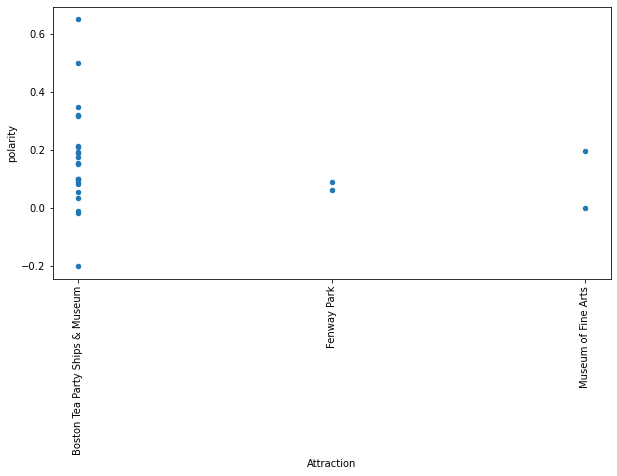

In [66]:
# looking at polarity for reviews containing the words tea and room
sample_size_tr = len(tea_room_poor)

sample_tr = tea_room_poor.sample(sample_size_tr).apply(sentiment_func, axis=1)
sample_tr.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [67]:
sample_tr[sample_tr['polarity']<0][['Attraction', 'Text']]

,Attraction,Text
23975,Boston Tea Party Ships & Museum,Adult fare is $29 which is expensive for just over an hour. The staff are enthusiastic and we learned some interesting facts but it was all too hurried. Felt like we were on a conveyor waiting for the next group to be pushed through behind us. They couldnâ€™t wait to get us out into the attached tea room. Didnâ€™t even have enough time to â€œthrowâ€ tea box into the water. Poor value overall
22649,Boston Tea Party Ships & Museum,"This is run by (for Profit?) Historic Tours of America, Inc. an entertainment company. They charge $29 to go inside. You are first treated to two actors who yell out a script about the ""origins"" of the American split with the British (I guess for those who never got past the second grade), then you are whisked to a ship look alike and herded through the place. You can hurl fake tea bundles into the bay (although they tell you this was not done - they had to open the bundles to pour out the tea, go figure). Next you are quickly escorted into a dark room where holograph figures yell at you. Next you are marched into a room where they show you the one artifact in this ""museum"": as actual crate from the Tea Party. You then hear two paintings yell and argue. The next room has a film (stand) about the first shot of the American Revolution before being forced upstair to the gift shop and overpriced tea room. Total Time 30 minutes (not counting the time in the gift shop)"
21537,Museum of Fine Arts,"I was in Boston for two days. On the second day, I went with a friend to the museum. We arrived shortly after 2pm. I paid $25 for my ticket, and after the transaction was over, I found a tiny sign in the hall that said the museum would be closing at 4pm that evening for a private event, which left us with less than two hours to view the art. After waiting in line to check our coats, we had about 90 minutes. The museum is confusing and difficult to navigate. The exhibits are not labeled nor are they easily located. Some pieces of art don't even have a sign describing the pieces. Most of the rooms are cavernous but nearly empty- the canvases are scattered out along the walls in no real comprehensive order, and the small placards on the walls offer little to no insight of the pieces you see. Our struggling to navigate the museum was hindered even more by the ""private event"" they were planning. All around us, associates carried tables, tablecloths, steamers, chairs, and cables, without any mind to the paying guests all around them. Honestly, my piece of advice for this establishment would be to simply close for the entire day when an event is to be hosted there. Your staff makes no effort to accommodate your guests or help them find their way- they are too focused on nonsense like making 132 inch tablecloths fit on a 40 inch round table. (Whose idea was that anyway??) About 60 minutes into my visit, after several frustrating attempts navigate the map I found on the wall, I finally found myself in the contemporary art section of the museum and had just begun to observe a large display when a security guard approached me and tapped his watch and ushered me out the door, muttering ""The museum's closing..."" I'll admit, I did hear a voice over the PA system a few minutes prior, but the sound was so distorted, I couldn't understand what the voice was trying to say, and to be honest, I assumed they were speaking another language! When we were shooed out of the contemporary art exhibit, we made our way back to the coat room, collected our things, and fought our way through the crowd back to the front of the building. Once there, I had to navigate the crowd and find a place to put my coat on- being 30 degrees outside, I certainly wasn't fond of the idea of walking out in a sleeveless dress! No sooner had I set my phone and clutch on a table when another elderly security guard approached me and said, ""They're using this table for the party."" I replied, ""I underst

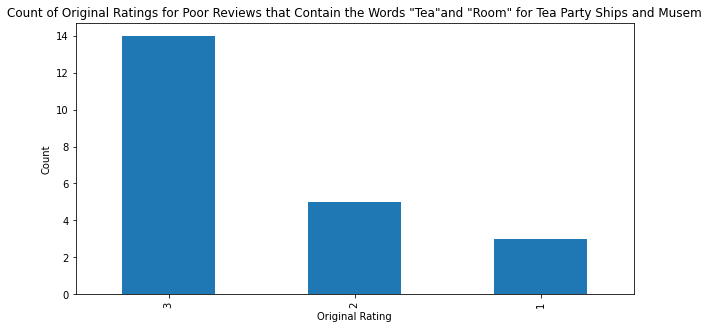

In [68]:
# graph of the ratings for boston tpsm
sample_tr[sample_tr['Attraction']=='Boston Tea Party Ships & Museum']\
['Old_Rating'].value_counts().plot(kind='bar')
plt.title('Count of Original Ratings for Poor Reviews that Contain the Words "Tea"\
and "Room" for Tea Party Ships and Musem')
plt.xlabel('Original Rating')
plt.ylabel('Count')
plt.show()

## 'Walk' 'Around'

In [69]:
# checking if there is anything valid for walk around
walk_around_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
                             (ta_5vspoor['Text'].str.contains('walk')) &
                             (ta_5vspoor['Text'].str.contains('around'))][important_list]

walk_around_poor

,Attraction,Rating,Text,Title,Username,Old_Rating
22808,Boston Tea Party Ships & Museum,Poor,"The actors were good but there was way too much sitting and standing around in between the places they take you. In room one they assign you a person who participated in the tea party and they explain the events leading up to it. This part was good but drawn out. They then take you on the ship which was very boring. Not much to see. Kids threw tea over but weren't overly impressed by this. Kinda lame actually. Next, you stand or sit under a canopy for 15 min while the actor answers questions. Next you see two wives perspectives but they basically say the same thing as room one. Next you see the tea cheat and talking paintings of King George and Samuel Adams that explain the events once again. Last is a movie about the Revolutionary War. It was very educational but the waiting and standing around ruined it especially on a very hot day. I did not like the fact that they don't do reservations like they do in Washington DC. You get assigned a time that is 30 plus min after you buy the tickets so more waiting. Wall to wall people on this crowded day and lots of people cutting the line and walking up to the ticket counter on the other side of the line while the man in charge of the line chats with guests. Overall, it is educational, somewhat interactive but way too long and too pricey for what you really get.",Disappointing and lots of waiting in between the tour,Lori V,2
23801,Boston Tea Party Ships & Museum,Poor,"We went on a rainy September Wednesday around lunchtime. There were people participating in the tea party, by throwing large square 'bales of tea' overboard. I believe they paid to go onboard to tour the real looking ship and participate in the revolution. The staff were dressed in historically appropriate attire and kids would probably really get a kick out of doing this. We checked out the gift shop too, but overall it just wasn't my 'cup of tea'. We did walk close by to a waterfront seafood restaurant that was great but when the rain picked up it was a chilly (yummy) meal under their tent.",Cute & Historical But A Bit Too 'Canned' For My Taste,Karen S,3
23886,Boston Tea Party Ships & Museum,Poor,"I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around .",Doesn't worth the price,Alextsvang,2
23974,Boston Tea Party Ships & Museum,Poor,"Skip it. It's not a museum. There are a town hall re-enactment by the staff followed, a pretend tea tossing exercise, a quick walk around the boat, then a couple videos. The tea box handed down through generations is plausible, the tea recovered from the boot not so much. The digital picture technology was cool. Not a 'museum' experience.",If you are over 12 ...,Kristopher Kent,3
26607,Fenway Park,Poor,"This is a one hour tour that begins in the Red Sox Team Shop across the street from the Stadium. It was great to see Fenway for the first time. So much history! I admire the fact that they have maintained the ballpark in the same location since 1912. I live in the Dallas/Fort Worth area and the Rangers are building a new park after only twenty years. So much for tradition. Now, as far as the tour, it was fairly unimpressive. This was more like a ""pick your seat"" day. All you did was walk around the seats and look at the stadium/field from different vantage points. That's great and should be part of the tour, but it left us wanting more. You don't get to see anything you couldn't see by just buying a game ticket. Didn't get on the field or in the dugouts, dressing rooms, broadcast booths, suites, underneath inner workings. Nothing but walk around in the stands. You will get a little bit of history abo

In [70]:
for i in list(walk_around_poor.index):
    print(i)
    print(walk_around_poor.loc[i, 'Attraction'])
    print(walk_around_poor.loc[i, 'Text'])
    print('\n')
    print('-'*50)

22808
Boston Tea Party Ships & Museum
The actors were good but there was way too much sitting and standing around in between the places they take you. In room one they assign you a person who participated in the tea party and they explain the events leading up to it. This part was good but drawn out. They then take you on the ship which was very boring. Not much to see. Kids threw tea over but weren't overly impressed by this. Kinda lame actually. Next, you stand or sit under a canopy for 15 min while the actor answers questions. Next you see two wives perspectives but they basically say the same thing as room one. Next you see the tea cheat and talking paintings of King George and Samuel Adams that explain the events once again. Last is a movie about the Revolutionary War. It was very educational but the waiting and standing around ruined it especially on a very hot day. I did not like the fact that they don't do reservations like they do in Washington DC. You get assigned a time that

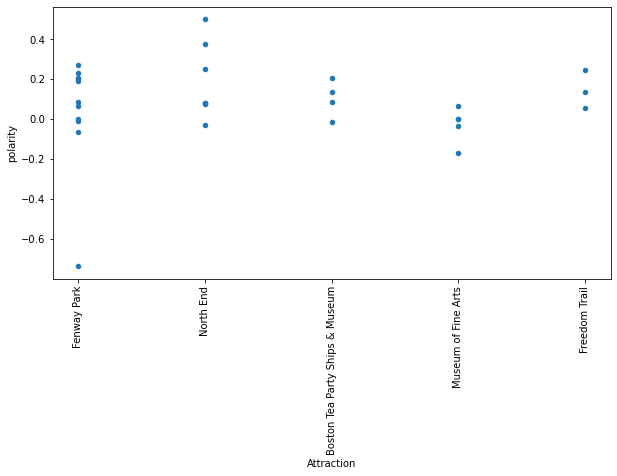

In [71]:
# checking polarity
sample_size_wa = len(walk_around_poor)

sample_wa = walk_around_poor.sample(sample_size_wa).apply(sentiment_func, axis=1)
sample_wa.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [72]:
sample_wa[sample_wa['polarity']<0][['Attraction', 'Text']]

,Attraction,Text
27674,Fenway Park,"Spent $500 bucks on two tickets in Loge Box 158, Third Base side lower level. We were 20 or so rows from the field. The seats had to have been installed in 1916 and were very uncomfortable and cramped. I had to literally take turns with the fan beside me putting my arms down at my side. The way the park is set up with the support beams and angles of the seats there are many obstructed views of the field. We could see nothing from left center field to the foul pole due to the angle of our seating and the construction of the left field seating wall. The constant flow of vendors carrying wares in front of us obstructed our view as well due the slight slope of the seating to the field level. I Love Boston and The Sox but will probably not go back to Fenway again and will definitely not sit anywhere on 3rd Base side. The Fans were Awesome! We had a great time before the game walking the park and visiting with people in and around the Park. If you want a Beer or Drink bring your ID. We are in our 60â€™s and could not buy a cold one having no idea of this restriction. They need a better way to handle this as even the vendors out in the stands carded, which added more obstruction to fans views. Sox Won Big."
23886,Boston Tea Party Ships & Museum,"I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around ."
22565,Museum of Fine Arts,"I visited here during a one week visit to Boston. It is a lovely museum, very impressive from the outside, and there are a number of places to eat and drink in the museum. It is well located for public transport although I walked down from Kenmore square. The very disappointing thing about this museum were the large number of regular areas that were closed. Not only was it disappointing that the galleries were closed, but it also meant, that as someone who has mobility problems, I found it difficult to find a lift that I could use that did not end up in a dead end. There were some exhibits closed that I really wanted to see. The other disappointment was the very large number of school parties that were visiting. This meant that moving around the museum was challenging because being young people they were not aware of anything outside their world, including people trying to get through the corridors that they were spread across. The museum acoustics were also quite poor, so the children shrieking at each other was amplified. There seemed to be no attempts to keep their voices down a little so as not to interrupt the enjoyment of other visitors. It was a Friday in February, and maybe this is a day to avoid. Or the museum could try and regulate school visits so that they are more spread out across the week?"
27837,Fenway Park,We paid $21 per person and basically just walked around to different seats in the stadium and heard the history. We did get to go up behind the green monster but for the price it would have been nice to see some back areas of the stadium like we have seen at others.
21537,Museum of Fine Arts,"I was in Boston for two days. On the second day, I went with a friend to the museum. We arrived shortly after 2pm. I paid $25 for my ticket, and after the transaction was over, I found a tiny sign in the hall that said the museum would be closing at 4pm that evening for a private event, which left us with less than two hours to view the art. After waiting in line to check our coats, we had about 90 minutes. The museum is confusing and difficult to navigate. The exhibits are not labeled nor are they easily located. Some pieces of art don't even have a sign describing the pieces. Most of the rooms are cavernous but nearly empty- the canvases are scattered out along the wa

- Most of the comments do not have anything cohesive to mention regarding walking around

## 'Time' 'Money'

In [73]:
# checking reviews using the words time and money
time_money_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('time')) &
           (ta_5vspoor['Text'].str.contains('money'))]
time_money_poor

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
23886,Boston Tea Party Ships & Museum,Boston,2018-12-01,2018-12-01,22,28,1,Poor,"I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around .",Doesn't worth the price,Alextsvang,,,,,,2
24007,Boston Tea Party Ships & Museum,Boston,2019-05-01,2019-04-01,2,1,0,Poor,"Not entirely worth the $50+ dollars to view. I wouldn't do it again. Actors did an amazing job; but once you paid, you were at the timeline mercy of the museum. You can't stay and linger and look. You get herded into the museum store, so you can part with more of your money. Info was good; but there's not enough time to view it.",Expensive for what it is,Gnarlynick,,,,,,3
24209,Boston Tea Party Ships & Museum,Boston,2019-08-01,2019-08-01,490,182,0,Poor,"Possibly great for kids, younger teens. As an adult, I could have skipped it. Yes, the 'cast' is enthusiastic, though a little thrown off by in depth questions about the tenor of the times - the assumption is that (most) everyone shared the same views in 1773 - nut the ship tour is a total reconstruction, you're herded through the museum, the videos are mostly perfunctory (though with a cool picture come to life effect, and the sole surviving tea chest was interesting / although its spinning presentation like a priceless gem is a bit much) and the entire history lesson would occupy a couple pages of text. Again, if you have kids and are willnig to shell out - great. Solo, and know something about history - your money might be better spent elsewhere.","Overpriced, overhyped",scott r,SILVER SPRING,MD,,,,3
24247,Boston Tea Party Ships & Museum,Boston,2019-09-01,NaT,651,251,2,Poor,"This tour, led by actors in period costume, re-enacts events leading up to, and after the Boston tea party. Visitors are encouraged to participate with cheers and boos, so be prepared. You are taken through key events either by the actors or through high-tech multimedia performances. You get to visit one of 2 ships which were involved in the tea party to experience life in the 1770s. The whole tour lasts just over an hour but it all felt very rushed and highly organised, as visitors are shepherded from one event to the next. There was not enough time to read and digest the displays on the wharf. It was definitely a money-making enterprise with the object being to push tours through to the gift shop and the tea room.",Need more time to explore!,Jacqui M,,,,,,3
24385,Boston Tea Party Ships & Museum,Boston,2019-11-01,2019-10-01,27,8,0,Poor,"My wife and I were on a trip to Boston sightseeing and was looking forward to visiting this attraction. We paid $59 for both of us and of all the things that we did on our three week trip to New England this was by far the biggest waste of money. The tour starts in a mock up of the Old Meeting house and is conducted by two role playing guides. The whole presentation is aimed at young children - probably 5 to 10 year olds - fair enough but we hoped we would be able to read the info in the exhibits. However, the issue is that everything is rushed and the very few things to read/look at that are in the ""museum"" you are not given time to take in. When we went out to the boat the guide gave his talk on the top deck and then asked everybody to go down to the next deck where he would continue the tour. There were two sets of stairs going down but we were told we could only use one. We were at the back of a large group, thirty or forty people, and by the time we had filed downstairs the guide was already half way through his talk so we missed it (no waiting allowed a

In [74]:
list(time_money_poor.index)

[23886,
 24007,
 24209,
 24247,
 24385,
 24485,
 34501,
 27176,
 27313,
 27315,
 27719,
 28137,
 19220,
 21537]

In [75]:
for i in list(time_money_poor.index):
    print(i)
    print(time_money_poor.loc[i, 'Attraction'])
    print(time_money_poor.loc[i, 'Text'])
    print('\n')
    print('-'*50)

23886
Boston Tea Party Ships & Museum
I visited this museum with my 13 years boy. It's a nice small exhibition, mostly played by actors and contains visual effects. Not a regular museum you are expected to see. As for my boy it was boring especially if English isn't your language. So it looks like more as a small show on very low level. Don't waste your time and money, just take a walk around .


--------------------------------------------------
24007
Boston Tea Party Ships & Museum
Not entirely worth the $50+ dollars to view. I wouldn't do it again. Actors did an amazing job; but once you paid, you were at the timeline mercy of the museum. You can't stay and linger and look. You get herded into the museum store, so you can part with more of your money. Info was good; but there's not enough time to view it.


--------------------------------------------------
24209
Boston Tea Party Ships & Museum
Possibly great for kids, younger teens. As an adult, I could have skipped it. Yes, the 'c

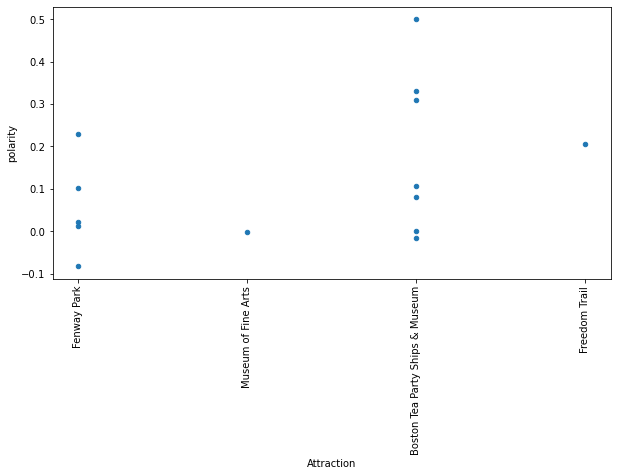

In [76]:
# checking polarity
sample_size_tm = len(time_money_poor)

sample_tm = time_money_poor.sample(sample_size_tm).apply(sentiment_func, axis=1)
sample_tm.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# Trigram Analysis

In [77]:
# 5 Star Analysis
trigram_5star = list(nltk.trigrams(tokens_5star))
fdist_tri_5star = FreqDist(trigram_5star)
fdist_tri_5star.most_common(50)

[(('old', 'north', 'church'), 252),
 (('paul', 'revere', 'house'), 206),
 (('museum', 'fine', 'art'), 130),
 (('would', 'highly', 'recommend'), 95),
 (('tea', 'party', 'ship'), 80),
 (('red', 'sox', 'fan'), 74),
 (('bunker', 'hill', 'monument'), 73),
 (('church', 'paul', 'revere'), 68),
 (('north', 'church', 'paul'), 66),
 (('well', 'worth', 'visit'), 65),
 (('great', 'way', 'see'), 64),
 (('house', 'old', 'north'), 58),
 (('highly', 'recommend', 'tour'), 55),
 (('party', 'ship', 'museum'), 54),
 (('revere', 'house', 'old'), 51),
 (('follow', 'red', 'brick'), 50),
 (('tea', 'party', 'museum'), 47),
 (('along', 'freedom', 'trail'), 47),
 (('red', 'sox', 'game'), 45),
 (('john', 'singer', 'sargent'), 45),
 (('walking', 'freedom', 'trail'), 44),
 (('fenway', 'park', 'tour'), 43),
 (('throw', 'tea', 'overboard'), 42),
 (('tour', 'guide', 'knowledgeable'), 41),
 (('walk', 'freedom', 'trail'), 40),
 (('walked', 'freedom', 'trail'), 40),
 (('wear', 'comfortable', 'shoe'), 37),
 (('visit', 'no

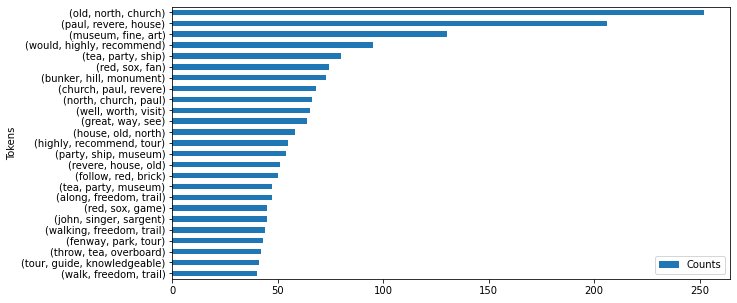

In [78]:
# Graph of 5 Star Trigram
fdist_tri_5star_graph = pd.DataFrame(fdist_tri_5star.most_common(25),
                                     columns=['Tokens',
                                              'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_5star_graph.invert_yaxis()

In [79]:
# 4 Star Analysis
trigram_4star = list(nltk.trigrams(tokens_4star))
fdist_tri_4star = FreqDist(trigram_4star)
fdist_tri_4star.most_common(50)

[(('paul', 'revere', 'house'), 58),
 (('old', 'north', 'church'), 48),
 (('tea', 'party', 'ship'), 28),
 (('throwing', 'tea', 'overboard'), 19),
 (('tea', 'party', 'museum'), 19),
 (('museum', 'fine', 'art'), 19),
 (('well', 'worth', 'visit'), 17),
 (('bunker', 'hill', 'monument'), 16),
 (('follow', 'red', 'brick'), 16),
 (('party', 'ship', 'museum'), 14),
 (('around', 'north', 'end'), 14),
 (('great', 'way', 'see'), 13),
 (('lot', 'italian', 'restaurant'), 12),
 (('learn', 'tea', 'party'), 11),
 (('red', 'sox', 'game'), 11),
 (('freedom', 'trail', 'great'), 11),
 (('walk', 'freedom', 'trail'), 11),
 (('house', 'old', 'north'), 11),
 (('history', 'tea', 'party'), 10),
 (('would', 'highly', 'recommend'), 10),
 (('great', 'way', 'spend'), 10),
 (('tour', 'guide', 'knowledgeable'), 10),
 (('red', 'brick', 'line'), 10),
 (('revere', 'house', 'old'), 10),
 (('north', 'end', 'great'), 10),
 (('many', 'italian', 'restaurant'), 10),
 (('story', 'tea', 'party'), 9),
 (('would', 'definitely', 'r

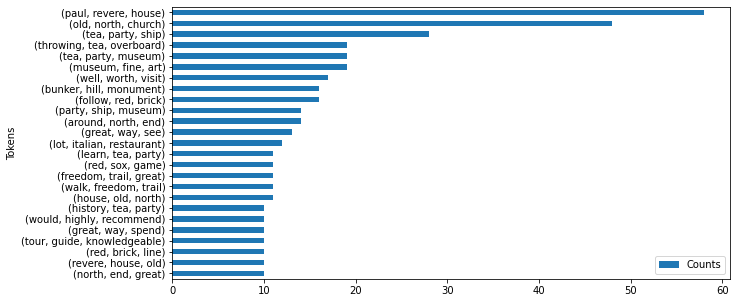

In [80]:
# Graph of 4 Star Trigram
fdist_tri_4star_graph = pd.DataFrame(fdist_tri_4star.most_common(25),
                                     columns=['Tokens',
                                              'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_4star_graph.invert_yaxis()

In [81]:
# Poor Analysis
trigram_poor = list(nltk.trigrams(tokens_poor))
fdist_tri_poor = FreqDist(trigram_poor)
fdist_tri_poor.most_common(50)

[(('old', 'north', 'church'), 8),
 (('tea', 'party', 'ship'), 6),
 (('party', 'ship', 'museum'), 5),
 (('red', 'sox', 'fan'), 5),
 (('paul', 'revere', 'house'), 5),
 (('many', 'people', 'tour'), 4),
 (('huge', 'baseball', 'fan'), 4),
 (('visitor', 'locker', 'room'), 4),
 (('top', 'green', 'monster'), 4),
 (('dugout', 'locker', 'room'), 4),
 (('walked', 'freedom', 'trail'), 4),
 (('house', 'old', 'north'), 4),
 (('trail', 'easy', 'follow'), 4),
 (('gift', 'shop', 'tea'), 3),
 (('kid', 'would', 'probably'), 3),
 (('great', 'gift', 'shop'), 3),
 (('waste', 'money', 'tour'), 3),
 (('throwing', 'tea', 'harbor'), 3),
 (('abigail', 'tea', 'room'), 3),
 (('tour', 'gift', 'shop'), 3),
 (('tea', 'party', 'experience'), 3),
 (('tea', 'party', 'museum'), 3),
 (('waste', 'time', 'money'), 3),
 (('self', 'guided', 'tour'), 3),
 (('revere', 'house', 'old'), 3),
 (('shop', 'tea', 'shop'), 2),
 (('think', 'kid', 'like'), 2),
 (('young', 'actor', 'take'), 2),
 (('nice', 'way', 'spend'), 2),
 (('way', 's

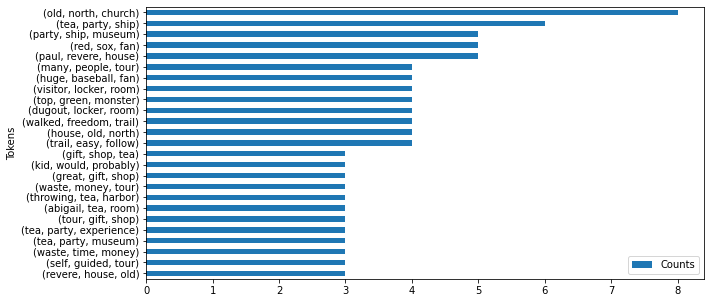

In [82]:
# Graph of Poor Bigram
fdist_tri_poor_graph = pd.DataFrame(fdist_tri_poor.most_common(25),
                                    columns=['Tokens',
                                             'Counts']).set_index('Tokens').plot(kind='barh')
fdist_tri_poor_graph.invert_yaxis()

In [83]:
# checking most common combo
trigram_words_5star = [tup[0] for tup in fdist_tri_5star.most_common(50)]
trigram_words_5star

[('old', 'north', 'church'),
 ('paul', 'revere', 'house'),
 ('museum', 'fine', 'art'),
 ('would', 'highly', 'recommend'),
 ('tea', 'party', 'ship'),
 ('red', 'sox', 'fan'),
 ('bunker', 'hill', 'monument'),
 ('church', 'paul', 'revere'),
 ('north', 'church', 'paul'),
 ('well', 'worth', 'visit'),
 ('great', 'way', 'see'),
 ('house', 'old', 'north'),
 ('highly', 'recommend', 'tour'),
 ('party', 'ship', 'museum'),
 ('revere', 'house', 'old'),
 ('follow', 'red', 'brick'),
 ('tea', 'party', 'museum'),
 ('along', 'freedom', 'trail'),
 ('red', 'sox', 'game'),
 ('john', 'singer', 'sargent'),
 ('walking', 'freedom', 'trail'),
 ('fenway', 'park', 'tour'),
 ('throw', 'tea', 'overboard'),
 ('tour', 'guide', 'knowledgeable'),
 ('walk', 'freedom', 'trail'),
 ('walked', 'freedom', 'trail'),
 ('wear', 'comfortable', 'shoe'),
 ('visit', 'north', 'end'),
 ('north', 'end', 'great'),
 ('history', 'tea', 'party'),
 ('tour', 'fenway', 'park'),
 ('would', 'definitely', 'recommend'),
 ('around', 'north', 'end'

In [84]:
# checking most common combo
trigram_words_4star = [tup[0] for tup in fdist_tri_4star.most_common(50)]
trigram_words_4star

[('paul', 'revere', 'house'),
 ('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('throwing', 'tea', 'overboard'),
 ('tea', 'party', 'museum'),
 ('museum', 'fine', 'art'),
 ('well', 'worth', 'visit'),
 ('bunker', 'hill', 'monument'),
 ('follow', 'red', 'brick'),
 ('party', 'ship', 'museum'),
 ('around', 'north', 'end'),
 ('great', 'way', 'see'),
 ('lot', 'italian', 'restaurant'),
 ('learn', 'tea', 'party'),
 ('red', 'sox', 'game'),
 ('freedom', 'trail', 'great'),
 ('walk', 'freedom', 'trail'),
 ('house', 'old', 'north'),
 ('history', 'tea', 'party'),
 ('would', 'highly', 'recommend'),
 ('great', 'way', 'spend'),
 ('tour', 'guide', 'knowledgeable'),
 ('red', 'brick', 'line'),
 ('revere', 'house', 'old'),
 ('north', 'end', 'great'),
 ('many', 'italian', 'restaurant'),
 ('story', 'tea', 'party'),
 ('would', 'definitely', 'recommend'),
 ('walking', 'freedom', 'trail'),
 ('red', 'sox', 'fan'),
 ('trail', 'great', 'way'),
 ('self', 'guided', 'tour'),
 ('church', 'paul', 'revere'),
 ('g

In [85]:
# checking most common combo
trigram_words_poor = [tup[0] for tup in fdist_tri_poor.most_common(50)]
trigram_words_poor

[('old', 'north', 'church'),
 ('tea', 'party', 'ship'),
 ('party', 'ship', 'museum'),
 ('red', 'sox', 'fan'),
 ('paul', 'revere', 'house'),
 ('many', 'people', 'tour'),
 ('huge', 'baseball', 'fan'),
 ('visitor', 'locker', 'room'),
 ('top', 'green', 'monster'),
 ('dugout', 'locker', 'room'),
 ('walked', 'freedom', 'trail'),
 ('house', 'old', 'north'),
 ('trail', 'easy', 'follow'),
 ('gift', 'shop', 'tea'),
 ('kid', 'would', 'probably'),
 ('great', 'gift', 'shop'),
 ('waste', 'money', 'tour'),
 ('throwing', 'tea', 'harbor'),
 ('abigail', 'tea', 'room'),
 ('tour', 'gift', 'shop'),
 ('tea', 'party', 'experience'),
 ('tea', 'party', 'museum'),
 ('waste', 'time', 'money'),
 ('self', 'guided', 'tour'),
 ('revere', 'house', 'old'),
 ('shop', 'tea', 'shop'),
 ('think', 'kid', 'like'),
 ('young', 'actor', 'take'),
 ('nice', 'way', 'spend'),
 ('way', 'spend', 'hour'),
 ('would', 'probably', 'really'),
 ('trolley', 'tour', 'decided'),
 ('tour', 'guide', 'character'),
 ('wall', 'wall', 'people'),
 

In [86]:
# checking for words that are utilized in all 3 ratings
trigram_common_words = list(set(trigram_words_5star).intersection(trigram_words_poor))
trigram_common_words = list(set(trigram_common_words).intersection(trigram_words_4star))
trigram_common_words

[('paul', 'revere', 'house'),
 ('house', 'old', 'north'),
 ('walked', 'freedom', 'trail'),
 ('party', 'ship', 'museum'),
 ('tea', 'party', 'museum'),
 ('tea', 'party', 'ship'),
 ('red', 'sox', 'fan'),
 ('old', 'north', 'church'),
 ('self', 'guided', 'tour'),
 ('revere', 'house', 'old'),
 ('abigail', 'tea', 'room')]

In [87]:
# creating df with word count
words_5star_tri_count = [tup for tup in fdist_tri_5star.most_common(50)\
                         if tup[0] in trigram_common_words]
words_5star_tri_count_df = pd.DataFrame(words_5star_tri_count, columns = ['Words', '5Star_Count'])

words_4star_tri_count = [tup for tup in fdist_tri_4star.most_common(50)\
                         if tup[0] in trigram_common_words]
words_4star_tri_count_df = pd.DataFrame(words_4star_tri_count, columns = ['Words', '4Star_Count'])

words_poor_tri_count = [tup for tup in fdist_tri_poor.most_common(50)\
                        if tup[0] in trigram_common_words]
words_poor_tri_count_df = pd.DataFrame(words_poor_tri_count, columns = ['Words', 'Poor_Count'])

from functools import reduce

tri_dfs = [words_5star_tri_count_df, words_4star_tri_count_df, words_poor_tri_count_df]

combined_words_tri_df = reduce(lambda left,right: pd.merge(left,right,on='Words'), tri_dfs)
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",252,48,8
1,"(paul, revere, house)",206,58,5
2,"(tea, party, ship)",80,28,6
3,"(red, sox, fan)",74,9,5
4,"(house, old, north)",58,11,4
5,"(party, ship, museum)",54,14,5
6,"(revere, house, old)",51,10,3
7,"(tea, party, museum)",47,19,3
8,"(walked, freedom, trail)",40,7,4
9,"(self, guided, tour)",34,9,3


In [88]:
# getting the percentage of the combination of words within the respective ratings
combined_words_tri_df[['5Star_Count']] = combined_words_tri_df[['5Star_Count']]/count_5star_ttl
combined_words_tri_df[['4Star_Count']] = combined_words_tri_df[['4Star_Count']]/count_5star_ttl
combined_words_tri_df[['Poor_Count']] = combined_words_tri_df[['Poor_Count']]/count_5star_ttl
combined_words_tri_df

,Words,5Star_Count,4Star_Count,Poor_Count
0,"(old, north, church)",0.033062,0.006298,0.001050
1,"(paul, revere, house)",0.027027,0.007610,0.000656
2,"(tea, party, ship)",0.010496,0.003674,0.000787
3,"(red, sox, fan)",0.009709,0.001181,0.000656
4,"(house, old, north)",0.007610,0.001443,0.000525
5,"(party, ship, museum)",0.007085,0.001837,0.000656
6,"(revere, house, old)",0.006691,0.001312,0.000394
7,"(tea, party, museum)",0.006166,0.002493,0.000394
8,"(walked, freedom, trail)",0.005248,0.000918,0.000525
9,"(self, guided, tour)",0.004461,0.001181,0.000394


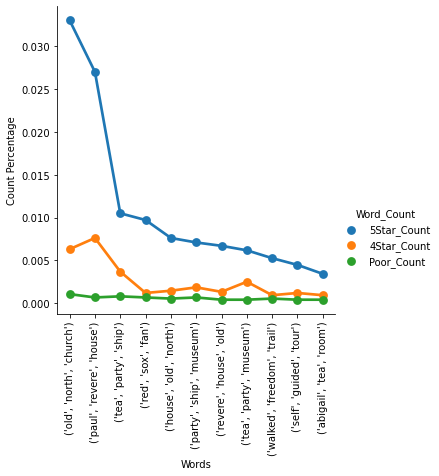

<Figure size 720x360 with 0 Axes>

In [89]:
# graphing the above
combined_words_tri_df_plot = combined_words_tri_df.melt('Words',
                                                        var_name='Word_Count',
                                                        value_name = 'Count Percentage')

combined_words_tri_df_plot = sns.catplot(x="Words", y="Count Percentage", hue='Word_Count', 
                                         data=combined_words_tri_df_plot, kind='point')
plt.figure(figsize=(10,5))
combined_words_tri_df_plot.set_xticklabels(rotation='vertical', fontsize=10)
plt.show()

In [90]:
# words only in 5 stars
trigram_words_5star_only = list(set(trigram_words_5star) -\
                                set(trigram_words_4star) - set(trigram_words_poor))

trigram_words_5star_only

[('town', 'hall', 'meeting'),
 ('highly', 'recommend', 'tour'),
 ('wear', 'comfortable', 'shoe'),
 ('tour', 'fenway', 'park'),
 ('old', 'state', 'house'),
 ('fenway', 'park', 'tour'),
 ('great', 'italian', 'restaurant'),
 ('game', 'fenway', 'park'),
 ('along', 'freedom', 'trail'),
 ('john', 'singer', 'sargent'),
 ('love', 'north', 'end'),
 ('well', 'worth', 'money'),
 ('part', 'freedom', 'trail')]

In [91]:
# words only in 4 stars
trigram_words_4star_only = list(set(trigram_words_4star) -\
                                set(trigram_words_5star) - set(trigram_words_poor))
trigram_words_4star_only

[('reenactment', 'tea', 'party'),
 ('tour', 'tea', 'party'),
 ('trail', 'great', 'way'),
 ('red', 'brick', 'line'),
 ('story', 'tea', 'party'),
 ('chance', 'throw', 'tea'),
 ('great', 'tour', 'guide'),
 ('walked', 'north', 'end'),
 ('definitely', 'worth', 'visit'),
 ('many', 'italian', 'restaurant'),
 ('learn', 'tea', 'party'),
 ('find', 'way', 'around'),
 ('freedom', 'trail', 'take'),
 ('lot', 'italian', 'restaurant')]

In [92]:
# words only in 5 stars
trigram_words_poor_only = list(set(trigram_words_poor) -\
                               set(trigram_words_5star) - set(trigram_words_4star))
trigram_words_poor_only

[('waste', 'money', 'tour'),
 ('tour', 'let', 'u'),
 ('gift', 'shop', 'tea'),
 ('throwing', 'tea', 'harbor'),
 ('shop', 'tea', 'shop'),
 ('staff', 'friendly', 'helpful'),
 ('great', 'gift', 'shop'),
 ('dugout', 'locker', 'room'),
 ('think', 'kid', 'like'),
 ('trail', 'easy', 'follow'),
 ('trolley', 'tour', 'decided'),
 ('kid', 'enjoyed', 'throwing'),
 ('many', 'people', 'group'),
 ('tour', 'led', 'actor'),
 ('tea', 'party', 'experience'),
 ('tour', 'guide', 'make'),
 ('tour', 'gift', 'shop'),
 ('gift', 'shop', 'neat'),
 ('wall', 'wall', 'people'),
 ('many', 'people', 'tour'),
 ('take', 'lot', 'picture'),
 ('overboard', 'gift', 'shop'),
 ('waste', 'time', 'money'),
 ('nice', 'way', 'spend'),
 ('good', 'nice', 'view'),
 ('tour', 'getting', 'go'),
 ('actor', 'good', 'job'),
 ('huge', 'baseball', 'fan'),
 ('young', 'actor', 'take'),
 ('way', 'spend', 'hour'),
 ('actor', 'costume', 'playing'),
 ('booked', 'ticket', 'online'),
 ('kid', 'would', 'probably'),
 ('tour', 'guide', 'character'),
 

In [93]:
# examining old north church
old_north_church = ta_5vspoor[(ta_5vspoor['Rating']==5) &
                              (ta_5vspoor['Text'].str.contains('old')) &
                              (ta_5vspoor['Text'].str.contains('north')) &
                              (ta_5vspoor['Text'].str.contains('church'))]

In [94]:
ta_5vspoor.loc[19224,'Text']

'This was my first visit to Boston, amazing city rich in history. Loved the Freedom Trail. Follow the red bricks throughout the city and youâ€™ll find cemeteries where Samuel Adams, The Franklins (Ben Franklins parents) were buried. Paul Revereâ€™s home, the old north church.'

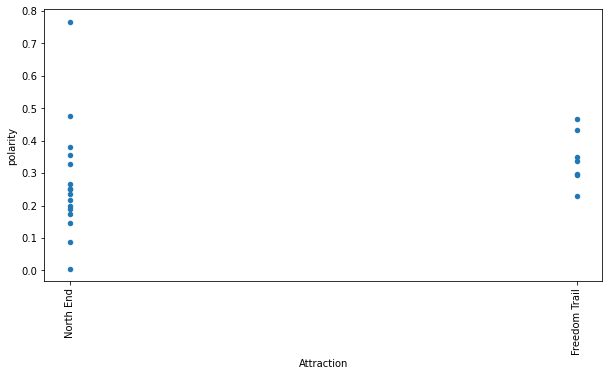

In [95]:
# polarity for attractions that mention old north church
sample_size_onc = len(old_north_church)

sample_onc = old_north_church.sample(sample_size_onc).apply(sentiment_func, axis=1)
sample_onc.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [96]:
for i in list(old_north_church.index):
    print(i)
    print(old_north_church.loc[i, 'Attraction'])
    print(old_north_church.loc[i, 'Text'])
    print('\n')
    print('-'*50)

19224
Freedom Trail
This was my first visit to Boston, amazing city rich in history. Loved the Freedom Trail. Follow the red bricks throughout the city and youâ€™ll find cemeteries where Samuel Adams, The Franklins (Ben Franklins parents) were buried. Paul Revereâ€™s home, the old north church.


--------------------------------------------------
19273
Freedom Trail
This was a great walk. Getting to see Paul Revereâ€™s house, old north church, and other sites was fantastic. I learned about this in school. It was fun to see these sites.


--------------------------------------------------
19321
Freedom Trail
We started near the harbor and walked by the graveyard, explored the graveyard, then went to the old north church where Paul Revere lit the candles to alert the other riders. The trail is in a beautiful neighborhood, is easy to follow, and if you are lucky, actors will come around and give you a talk!


--------------------------------------------------
19688
Freedom Trail
I love th

In [97]:
# examining would highly recommend
would_highly_rec = ta_5vspoor[(ta_5vspoor['Rating']==5) &
                              (ta_5vspoor['Text'].str.contains('would')) &
                              (ta_5vspoor['Text'].str.contains('highly')) &
                              (ta_5vspoor['Text'].str.contains('recommend'))]

would_highly_rec['Attraction'].value_counts()

Boston Tea Party Ships & Museum    31
Museum of Fine Arts                18
Fenway Park                        15
Freedom Trail                      13
North End                           5
Name: Attraction, dtype: int64

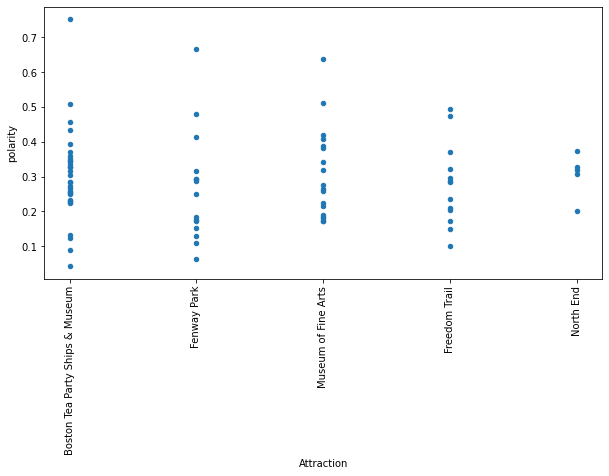

In [98]:
# polarity for would highly recommend
sample_size_whr = len(would_highly_rec)

sample_whr = would_highly_rec.sample(sample_size_whr).apply(sentiment_func, axis=1)
sample_whr.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [99]:
for i in list(would_highly_rec.index):
    print(i)
    print(would_highly_rec.loc[i, 'Attraction'])
    print(would_highly_rec.loc[i, 'Text'])
    print('\n')
    print('-'*50)

22644
Boston Tea Party Ships & Museum
This tour was so much fun. I would highly recommend it. It was an interactive tour where the guides dress up in costume and include you in the fun. When we arrived, we were given a character "to play" during the tour. Honestly, you didn't have to do anything with it. It was just fun to get the card with a little explanation of who you were supposed to be. The guides asked for volunteers to speak during the first part of the tour -- where they re-enacted a town meeting. So much fun. The kids loved it. At the end of the tour, we went to the tea house and had tea and hot chocolate. They also had sandwiches and pastries available to purchase as well. Well worth the visit.


--------------------------------------------------
22755
Boston Tea Party Ships & Museum
The museum includes two replica ships that were involved with the Boston Tea Party. Kids can toss a 'crate' of tea into the harbor; the staff appear to all be actors playing real characters from

In [100]:
# examining well worth visit
well_worth_visit = ta_5vspoor[(ta_5vspoor['Rating']==4) &
                              (ta_5vspoor['Text'].str.contains('well')) &
                              (ta_5vspoor['Text'].str.contains('worth')) &
                              (ta_5vspoor['Text'].str.contains('visit'))]

well_worth_visit['Attraction'].value_counts()

Boston Tea Party Ships & Museum    10
Museum of Fine Arts                 8
Freedom Trail                       5
North End                           4
Fenway Park                         2
Name: Attraction, dtype: int64

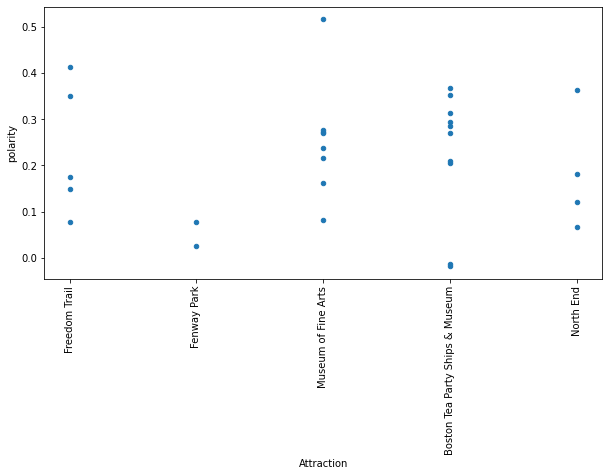

In [101]:
# polarity analysis
sample_size_wwv = len(well_worth_visit)

sample_wwv = well_worth_visit.sample(sample_size_wwv).apply(sentiment_func, axis=1)
sample_wwv.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [102]:
for i in list(well_worth_visit.index):
    print(i)
    print(well_worth_visit.loc[i, 'Attraction'])
    print(well_worth_visit.loc[i, 'Text'])
    print('\n')
    print('-'*50)

22882
Boston Tea Party Ships & Museum
An interesting experience. We took the guided tour for $20pp and found ourselves in something of a role play. Every body gets a little card with an historical name on it that you can check out online later if you wish and if you are really lucky? you get one with a quotation that you can expound at the town meeting. The guides are all in costume and truly its quite engaging. The ships of course are mockups but still interesting and the audio visual presentation is really well done. well worth a visit if you are into history which Boston is


--------------------------------------------------
22968
Boston Tea Party Ships & Museum
Lots of mixed reviews but we thought it was a fun tour and pitched at the right level and duration. Tea room after tour is well worth visiting. Would highly recommend


--------------------------------------------------
23083
Boston Tea Party Ships & Museum
As we entered the meeting hall, we were handed a card with the name

In [103]:
# examining waste money tour
waste_money_tour = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Text'].str.contains('waste')) &
           (ta_5vspoor['Text'].str.contains('money')) &
           (ta_5vspoor['Text'].str.contains('tour'))]
waste_money_tour['Attraction']

23454    Boston Tea Party Ships & Museum
24385    Boston Tea Party Ships & Museum
27624                        Fenway Park
Name: Attraction, dtype: object

In [104]:
ta_5vspoor.loc[23454, 'Text']

'We just completed this tour and were very underwhelmed. It was boring throughout and not â€œhigh techâ€\x9d at all. For $100+ for 5 people we were very disappointed. Definitely the low point of our trip to Boston. Thankfully we only wasted an hour of our day. We typically agree with reviews on trip advisor, but this was not one of them. Skip this and do the Duck Tour...totally worth the money.'

In [105]:
ta_5vspoor.loc[24385, 'Text']

'My wife and I were on a trip to Boston sightseeing and was looking forward to visiting this attraction. We paid $59 for both of us and of all the things that we did on our three week trip to New England this was by far the biggest waste of money. The tour starts in a mock up of the Old Meeting house and is conducted by two role playing guides. The whole presentation is aimed at young children - probably 5 to 10 year olds - fair enough but we hoped we would be able to read the info in the exhibits. However, the issue is that everything is rushed and the very few things to read/look at that are in the "museum" you are not given time to take in. When we went out to the boat the guide gave his talk on the top deck and then asked everybody to go down to the next deck where he would continue the tour. There were two sets of stairs going down but we were told we could only use one. We were at the back of a large group, thirty or forty people, and by the time we had filed downstairs the guide

In [106]:
ta_5vspoor.loc[27624, 'Text']

'Horrible waste of money. Our tour guide was nice but had no information and just walked us around which u can do on your own. They put way too many people on 1 tour was not private at all.'

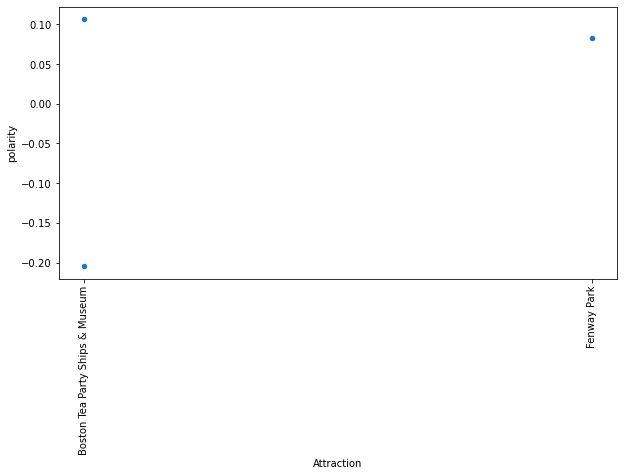

In [107]:
# only boston tpsm and fenway
sample_size_wmt = len(waste_money_tour)

sample_wmt = waste_money_tour.sample(sample_size_wmt).apply(sentiment_func, axis=1)
sample_wmt.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- indicative of problems

# Analysis of Helpful Reviews

In [108]:
ta_5vspoor_helpful_df = ta_5vspoor[ta_5vspoor['Review_Helpful']>0]
ta_5vspoor_helpful_df.sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
20201,Freedom Trail,Boston,2019-09-01,2019-09-01,88,16,1,5,"What a brilliant idea. In the 50s Boston created a red brick trail linking the citie's historic sites. You can easily follow the trail yourself, there's an app for that. I highly recommend the docent guided my guide really made history come alive. We got much more than just here sis building and here's what happened we got social and political insights along with wonderful anecdotal stories I had not heard before. The tour began at Boston Common and in it at Faneuil Hall, taking about 90 minutes. Our guide was quite knowledgeable, and encouraged questions as we went along. I loved every minute and I would do it again?",Take the guided walk,Jennifer S,,,,,,5
21997,Museum of Fine Arts,Boston,2018-10-01,2018-10-01,57,17,1,5,Great place to visit while visiting Boston. My husband and I were here for two days. The admission ticket is good for two days.,A MUST STOP,Onefinelady,NAPLES,FL,,,,5
26372,North End,Boston,2019-10-01,2019-10-01,181,22,1,5,"Is the Italian section of Boston. I highly recomend Neptune Oyster, simply excellent. There are also some mercatos and salumerias. Quaint. Nice to walk around. Also close to Haymarket",Interesting good italian food,Alexander F,FORT LAUDERDALE,FL,,,,5
19775,Freedom Trail,Boston,2019-06-01,2019-05-01,"2,771",1,2,4,"We enjoyed visiting the Freedom Trail in Boston. There is so much history to see. We made it through half of the Trail from Boston Common to Faneuil Hall. It is a lot of walking. I enjoyed the Granary Burying Ground, Ben Franklin Statue, and Samuel Adams Statue. We didn't take a tour. This allowed us plenty of time for pictures. If my son was older, I would have considered the tour. We spent several hours on the Freedom Trail. You could spend an entire days trying to see everything. If we come back to Boston, we would return to the Freedom Trail",Great Historical Walking Trail in Boston,Tom W,KATY,TX,,,,4
19560,Freedom Trail,Boston,2019-04-01,2019-02-01,"2,514",239,1,5,"We walked part of the Freedom Trail ourselves then took a Hop-On, Hop-Off for part of it. It was good to hear details from our bus drivers about the trail. I love Boston! Every corner of the Freedom Trail had amazing things to see. I especially enjoyed the cemeteries and special markers along to way.",A Walk Through History,TravelingFreeWoman,MORO,IL,,,,5
20584,Freedom Trail,Boston,2020-02-01,2020-02-01,495,131,1,4,"Just a fun walk in a fun city! You can Just follow the trail as They suggest or walk in Boston and stop when you see something interesting for You. You dont have To stop everywhere. Lost of free attraction. The web site is really Well made. You can also take Ã guided tour. We really liked the cemetery, public garden, Boston massacre site and state house.",Easy To do,Jean-FranÃ§ois Tessier,MONTREAL,CANADA,,,,4
23645,Boston Tea Party Ships & Museum,Boston,2018-08-01,2018-07-01,9,7,1,5,"Maybe because I'm from the UK.. but this was brilliant. I was very naÃ¯ve with regards the Boston Tea Party but after this I felt that it was very informative and I've learned lot and it was very entertaining. Also the tea room at the end is lovely, make sure you sample the tea!",Tea for two!,Liz B,DERBY,UNITED KINGDOM,,,,5
27535,Fenway Park,Boston,2019-07-01,2019-07-01,51,13,1,5,"I am not a huge baseball fan but my husband is. We both thoroughly enjoyed this tour. The history is neat and the ballpark is fantastic. The way it has been preserved and maintained is wonderful. This tour is primarily focused on Fenway history. You tour the green monster seats, sit in the media area, oldest seats in the stadium and ended with a great room of memorabilia. We plan to go back for the Game Day tour. Even if you arenâ€™t a huge baseball fan you will enjoy this tour!!",Great Tour,AmyMarie42,GARNETT,KS,,,,5
28156,Fenway 

In [109]:
helpful_total = len(ta_5vspoor_helpful_df)
helpful_total

1089

In [110]:
helpful_5star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==5])
helpful_5star 

811

In [111]:
helpful_4star = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']==4])
helpful_4star

188

In [112]:
helpful_poor = len(ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'])
helpful_poor

90

In [113]:
count_5star_ttl

7622

In [114]:
count_4star_ttl

1873

In [115]:
count_poor_ttl

490

### which ratings are helpful?

In [116]:
# Helpful reviews that gave 5 stars

helpful_5star/count_5star_ttl

0.10640251902387825

In [117]:
# Helpful reviews that gave 4 stars

helpful_4star/count_4star_ttl

0.1003737319807795

In [118]:
# Helpful reviews that gave 3 or fewer stars

helpful_poor/count_poor_ttl

0.1836734693877551

- It seems that reviews that rated attractions with 3 stars or fewer were more likely to be viewed as helpful

In [119]:
ta_5vspoor_helpful_df[ta_5vspoor_helpful_df['Rating']=='Poor'].sample(10)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
21493,Museum of Fine Arts,Boston,2017-11-01,2017-11-01,94,36,2,Poor,"The near side of Museum Road has parking meters, coin or phone operated. But if your visit runs past 6:00 PM, you will get a $40 parking ticket. There is one sign at each end of the block that says the spaces are ""restricted to residents"" after 6:00 PM. No sticker on the meter, no other signs between the ends of the block. The museum? That is fine. But evidently they haven't complained to the city of Boston about the predatory parking situation next to them.",Dangerous neighborhood. Parking meter scam.,Concord_MABill,CONCORD,MA,,,,3
23450,Boston Tea Party Ships & Museum,Boston,2018-06-01,2018-05-01,31,7,1,Poor,"The actors/staff dress in period costume and talk very loudly, they do a very good job showing children the historical facts of period. There is also a tea room that you can go to and get a bite to eat, as well as the souvenir shop with all its wares.",There is a lot of shouting,Sharyn H,BRISBANE,AUSTRALIA,,,,3
23801,Boston Tea Party Ships & Museum,Boston,2018-10-01,2018-09-01,69,13,1,Poor,"We went on a rainy September Wednesday around lunchtime. There were people participating in the tea party, by throwing large square 'bales of tea' overboard. I believe they paid to go onboard to tour the real looking ship and participate in the revolution. The staff were dressed in historically appropriate attire and kids would probably really get a kick out of doing this. We checked out the gift shop too, but overall it just wasn't my 'cup of tea'. We did walk close by to a waterfront seafood restaurant that was great but when the rain picked up it was a chilly (yummy) meal under their tent.",Cute & Historical But A Bit Too 'Canned' For My Taste,Karen S,VIENNA,OH,,,,3
27521,Fenway Park,Boston,2019-07-01,2019-07-01,43,18,1,Poor,"If I could give this experience zero stars, I would. We booked our tour of Fenway through Viator for what turned out to be the hottest day of the year so far. We went all the way out there, only to find that, due to Phish concerts the day before and that day, the entire fieldâ€¦",Trip Advisor/Viator Sold Us A Tour of Fenway Where You Couldn't See the Field!,dlonyc,NEW YORK CITY,,,,,1
21683,Museum of Fine Arts,Boston,2018-03-01,2018-03-01,516,122,1,Poor,"It's a good place to go for those who love to soak in some art pieces but of course, can't compare to Louvre. It is good enough to have some peaceful respite and appreciate some art after a day's work. Wednesdays are free. go and check it out!",An interesting place to see in Boston,youricat,QUEZON CITY,PHILIPPINES,,,,3
22565,Museum of Fine Arts,Boston,2020-03-01,2020-02-01,"1,517",163,2,Poor,"I visited here during a one week visit to Boston. It is a lovely museum, very impressive from the outside, and there are a number of places to eat and drink in the museum. It is well located for public transport although I walked down from Kenmore square. The very disappointing thing about this museum were the large number of regular areas that were closed. Not only was it disappointing that the galleries were closed, but it also meant, that as someone who has mobility problems, I found it difficult to find a lift that I could use that did not end up in a dead end. There were some exhibits closed that I really wanted to see. The other disappointment was the very large number of school parties that were visiting. This meant that moving around the museum was challenging because being young people they were not aware of anything outside their world, including people trying to get through the corridors that they were spread across. The museum acoustics were also quite poor, so the children shrieking at each other was amplified. There seemed to be no attempts to keep their voices down a little so as not to interrupt the enjoyment of other visitors. 

In [120]:
ta_5vspoor_helpful_df.loc[22956, 'Text']

"Aimed at a very low level of intellect, which may be why it is popular. You can take this tour and finish with very little idea of what the event was, what led up to it, or why it turned out to be significant. The only thought that seeps through is that if you are angry over an insignificant tax, it is ok to destroy other people's property. An actress of limited ability plays the role of an actual participant, and conducts the tour, which is not really a museum visit but a replica ship and then a series of rooms with videos. At over $25 a head, this is not a good way to spend your tourist dollar."

In [121]:
ta_5vspoor_helpful_df.loc[22956, 'User_Loc2']

'SPAIN'

In [122]:
ta_5vspoor_helpful_df.loc[23023, 'Text']

"Sorry guys but we really didn't like this museum. The role play by actors in costumes was frankly embarrassing (British reserve I guess) and so little history about what actually happened and its significance. We all found the shouty actors irritating after a while, and the one exhibit in the museum just made us laugh - a tea chest on a rotating podium with spotlights, behind glass. Really? The crown jewels in the Tower of London have less fanfare than that. The film was really good though (no shouting) but the talking portraits were frankly silly. The portrayal of King George was laughable and comedic - not suitable for a historic museum and a bit insulting I thought (although understandable given the context I guess). Sorry guys, this place is clearly aimed at a domestic audience and to be fair the US visitors seemed to love it. However we just didn't enjoy it and the whole experience left us cold and irritable. Great gift shop though with the best selection we saw anywhere in Bosto

In [123]:
ta_5vspoor_helpful_df.loc[23023, 'User_Loc2']

'UNITED KINGDOM'

In [124]:
ta_5vspoor_helpful_df.loc[19156, 'Text']

'After reading some other reviewers comments we decided to do the Freedom Trail without a guide as we were only in Boston for the day and wanted to be able to walk the whole trail from beginning to end. It is a lot of walking so be sure to wear comfortable shoes! I was glad we did not make a reservation in advance as we had problems getting to Boston from the train and took us longer than expected so we would of missed our time so by us doing self guided tour it worked out fine. We started at what we thought was the Boston Common, but some how didn\'t start where we wanted to so had to do some back tracking. We saw what you would of seen if you did the "Walk into History" and "North End" tours. It was nice as we could go at our own pace and take a lot of pictures. If I did it again the next time I would do a guided tour so I got a little more history and understood what I was looking at without having to google it on my phone.'

In [125]:
ta_5vspoor_helpful_df.head()

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
22733,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-05-01,72,53,1,5,We had a great time learning the history of the Boston Tea Party. Great audience participation with the live period dress characters. We had a great time even though it was raining. This is an excellent attraction and I would recommend a visit. A good tip is to pre book Boston Trolly Bus tickets and there is the opportunity to visit the Boston Tea Party Ships and Museam for free.,"Informative history of Boston, well worth a visit",Simon Lewis,BROMLEY,UNITED KINGDOM,,,,5
22781,Boston Tea Party Ships & Museum,Boston,2017-06-01,2017-06-01,17,15,1,5,We have 8 kids ranging from 6-19 and EVERYONE loves this museum. It was worth every penny! Super interactive and educational!,Best Museum in Boston!!!,jaydeelady,ORANGEVALE,CA,,,,5
22904,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,161,54,1,5,Educational and interactive. My 10 yo son and I really enjoyed it. We also liked the gift shop they had a lot of nice things. We used the on and off trolley tour to get there so we didn't have to worry about parking.,Cool,Charlieboysmom,,,,,,5
22936,Boston Tea Party Ships & Museum,Boston,2017-07-01,2017-07-01,147,48,1,4,tried to visit on a busy saturday only to find tours for the day sold out. :( as it is a bit of a walk and if you don't mind traveling the freedom trail out of order i'd recommend. starting here or at least making it a stop early in your day. This sight is NOT self guided and entry is by timed tickets.,Tried to visit on a busy Saturday,momLofteens,BOSTON,MA,,,,4
22956,Boston Tea Party Ships & Museum,Boston,2017-08-01,2017-07-01,"1,169",779,1,Poor,"Aimed at a very low level of intellect, which may be why it is popular. You can take this tour and finish with very little idea of what the event was, what led up to it, or why it turned out to be significant. The only thought that seeps through is that if you are angry over an insignificant tax, it is ok to destroy other people's property. An actress of limited ability plays the role of an actual participant, and conducts the tour, which is not really a museum visit but a replica ship and then a series of rooms with videos. At over $25 a head, this is not a good way to spend your tourist dollar.",Juvenile,MannyG2000,BARCELONA,SPAIN,,,,2


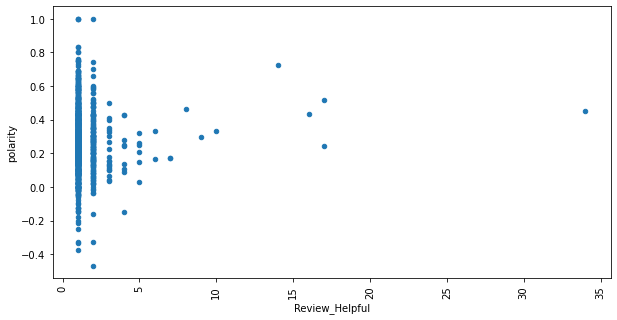

In [126]:
# polarity of helpful reviews
sample_size_hdf = len(ta_5vspoor_helpful_df)

sample_hdf = ta_5vspoor_helpful_df.sample(sample_size_hdf).apply(sentiment_func, axis=1)
sample_hdf.plot.scatter('Review_Helpful', 'polarity').tick_params(axis='x', labelrotation = 90)

- Helpful reviews tend to be more positive

### Analysis of Review Text Polarity of the 20 most helpful users

In [127]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
22139,Museum of Fine Arts,Boston,2019-01-01,2018-12-01,"4,905",988,0,5,"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure.",Wonderful surprise,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,,5
20974,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,"5,762",987,0,5,"In addition to seeing the Art in Bloom displays around the museum, we viewed Botticelli and Search for the Divine, Make Way for Ducklings: The Art of Robert McCloskey, and Matisse in the Studio. The Matisse exhibit was interesting as the you can see the works with the objects of inspiration including a pewter jug, a chocolate maker, an Andalusian vase, textiles, sculptures and masks.",Another lovely Art in Bloom!,Nikko4Me,MILFORD,MA,,,,5
19426,Freedom Trail,Boston,2019-01-01,2018-12-01,"4,905",987,0,4,"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way.",Boston best,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,,4
27259,Fenway Park,Boston,2019-05-01,2019-05-01,"9,552",973,0,5,I was here for an afternoon game. The weather was ok and it wasnâ€™t that crowded. Itâ€™s a great old park that is full of character and they embrace the past. Itâ€™s a great place to go. Iâ€™ve been to over 20 parks and this is second only to Wrigley.,Great park.,LostALot22,CHICAGO,IL,,,,5
21284,Museum of Fine Arts,Boston,2017-08-01,2017-05-01,"1,038",949,0,4,"My spouse and I visited Bostonâ€™s Museum of Fine Arts (MFA) on a Saturday afternoon in late May 2017. The museum is open daily from approximately 10:00 am until 5:00 pm, with extended hours until 10:00 pm on Wednesdays (including â€œWinedaysâ€ social event), Thursdays, and Fridays (including the monthly reoccurring â€œFirst Fridayâ€ cocktail party). Be sure to check their website for exact details. Admission costs $25 per adult, but you can enjoy a repeat visit within 10 days. If you visit the neighboring Isabella Stewart Gardner Museum (ISGM), you can save $2 on a combined admission. You are requested to check larger bags at the coat check counter. The over 600,000-square foot museum (founded in 1870) opened in its present Fenway-Kenmore neighborhood location in the early 1900s. The museum seems to occupy a series of interconnected buildings and wings (which makes navigating around a bit tricky). The museum collection is displayed in over 30 spacious, high-ceilinged galleries spread over four floors (including the basement). You can use either stairs or elevators to travel between the levels. Several dining options are available, including Bravo, American CafÃ©, Taste, and the Garden Cafeteria (listed in descending order from most formal/expensive to least). The expansive glass-enclosed courtyard hosts one of my favorite pieces in the museum, Dale Chihulyâ€™s 42-foot-high lime green icicle tower. Another favorite space is the rotunda with colonnades and frescoes painted by John Singer Sargent. (We loved how the museum placed a mirror in the center of the first floor space so that you can view the reflected ceiling paintings with

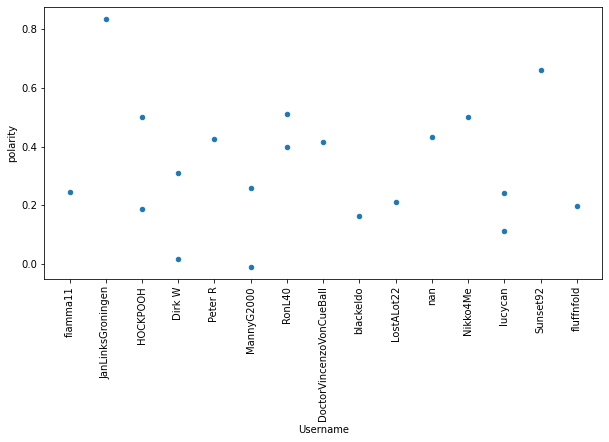

In [128]:
# user polarity
sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [129]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
22139,Dirk W,988,Museum of Fine Arts,"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."
20974,Nikko4Me,987,Museum of Fine Arts,"In addition to seeing the Art in Bloom displays around the museum, we viewed Botticelli and Search for the Divine, Make Way for Ducklings: The Art of Robert McCloskey, and Matisse in the Studio. The Matisse exhibit was interesting as the you can see the works with the objects of inspiration including a pewter jug, a chocolate maker, an Andalusian vase, textiles, sculptures and masks."
19426,Dirk W,987,Freedom Trail,"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."
27259,LostALot22,973,Fenway Park,I was here for an afternoon game. The weather was ok and it wasnâ€™t that crowded. Itâ€™s a great old park that is full of character and they embrace the past. Itâ€™s a great place to go. Iâ€™ve been to over 20 parks and this is second only to Wrigley.
21284,fluffnfold,949,Museum of Fine Arts,"My spouse and I visited Bostonâ€™s Museum of Fine Arts (MFA) on a Saturday afternoon in late May 2017. The museum is open daily from approximately 10:00 am until 5:00 pm, with extended hours until 10:00 pm on Wednesdays (including â€œWinedaysâ€ social event), Thursdays, and Fridays (including the monthly reoccurring â€œFirst Fridayâ€ cocktail party). Be sure to check their website for exact details. Admission costs $25 per adult, but you can enjoy a repeat visit within 10 days. If you visit the neighboring Isabella Stewart Gardner Museum (ISGM), you can save $2 on a combined admission. You are requested to check larger bags at the coat check counter. The over 600,000-square foot museum (founded in 1870) opened in its present Fenway-Kenmore neighborhood location in the early 1900s. The museum seems to occupy a series of interconnected buildings and wings (which makes navigating around a bit tricky). The museum collection is displayed in over 30 spacious, high-ceilinged galleries spread over four floors (including the basement). You can use either stairs or elevators to travel between the levels. Several dining options are available, including Bravo, American CafÃ©, Taste, and the Garden Cafeteria (listed in descending order from most formal/expensive to least). The expansive glass-enclosed courtyard hosts one of my favorite pieces in the museum, Dale Chihulyâ€™s 42-foot-high lime green icicle tower. Another favorite space is the rotunda with colonnades and frescoes painted by John Singer Sargent. (We loved how the museum placed a mirror in the center of the first floor space so that you can view the reflected ceiling paintings without craning your neck - an interesting technique that we had not seen before!) The architecture of the museum itself is almost as interesting as the objects that hang inside it. The MFA's vast and varied collection of approximately 450,000 objects includes works by American painters (Homer, Sargent, Hopper, and Cassatt), Impressionists (Monet, Manet, Renoir, Degas, Van Gogh, Cezanne), sculptures, furniture, Egyptian artifacts, Asian art from Japan and China, African masks, Native Ame

### Dirk W's Reviews and polarity assessment

In [130]:
print(helpful_users_condensed.loc[22139, 'Attraction'])
helpful_users_condensed.loc[22139, 'Text']

Museum of Fine Arts


"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."

In [131]:
print(helpful_users_condensed.loc[19426, 'Attraction'])
helpful_users_condensed.loc[19426, 'Text']

Freedom Trail


"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."

# Text Polarity/Basic Sentiment Analysis

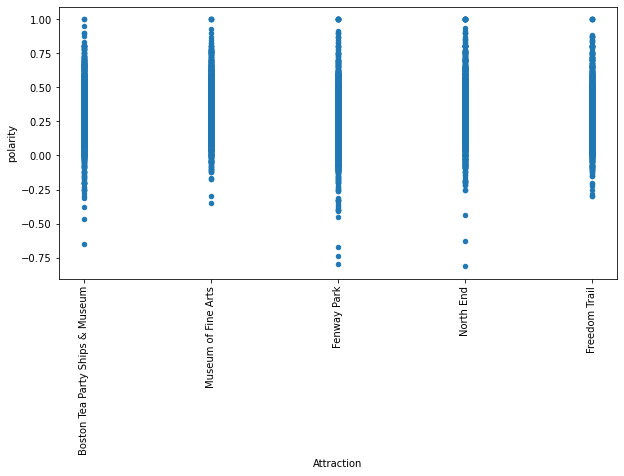

In [132]:
# polarity of the 5 attractions
sample_size_tavp = len(ta_5vspoor)

sample_tavp = ta_5vspoor.sample(sample_size_tavp).apply(sentiment_func, axis=1)
sample_tavp.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

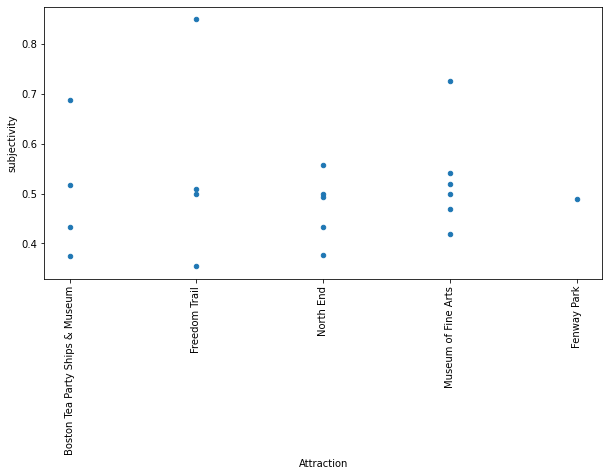

In [133]:
# checking subjectivity
sample.plot.scatter('Attraction', 'subjectivity').tick_params(axis='x', labelrotation = 90)

In [134]:
sample_tavp

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating,polarity,subjectivity
24453,Boston Tea Party Ships & Museum,Boston,2020-01-01,2019-04-01,27,1,0,4,"The single most important event leading to the American revolution. Although I'm not drinking tea, I like the story and the courage from the people from that era. I spent always more time in this kind of places as the average visitors. I read everything and listen to all the explanations some twice. I have visited the museum on different occasions. First was in 1995. Last was springtime in 2019.",Stolen moments from history,Voyager760525,BORSBEEK,BELGIUM,,,,4,0.175325,0.419481
20897,Museum of Fine Arts,Boston,2017-04-01,2017-04-01,148,50,0,5,"On a recent weekend in Boston, my husband and I decided to spend an afternoon at this museum and we were really glad that we did. They have a superb collection, and we had a great time wandering through their halls. They had several special exhibitions, including one that featured Georgia O'Keefe, and there were some really amazing pieces by her there. We planned to have about 3 hours there, and we found that we ran out of time! It is a museum that has something to appeal to everyone!",Wonderful Art Museum Worth the Visit,Jennifer A,TERRE HAUTE,IN,UNITED STATES,,,5,0.513520,0.638776
27217,Fenway Park,Boston,2019-04-01,2019-04-01,310,81,0,5,We were able to see a game from the convenience of our hotel room. They had a gigantic screen and it was so special.,We faced their giant screen in our hotel room,Decor71,FRANKLIN SQUARE,NY,,,,5,0.152381,0.532143
27086,Fenway Park,Boston,2019-02-01,2019-02-01,3,1,0,5,"Fenway Park tour is a must for anyone interested in American Sporting History as this is one of the most iconic sports stadium in America. The tour takes you to all places round the ground including the Green Monster and press box and the tour guides are both knowledgeable and full of fun stories. The entrance fee of $21 is worth it for the history and the ability to say that 'I have been there'. definitely put it on your itinerary. One note, if you go during the winter there is limited refreshment stops around the ground.",American Sporting History,Family Cheltenham,GLOUCESTER,UNITED KINGDOM,,,,5,0.157143,0.335714
25502,North End,Boston,2017-11-01,2017-09-01,113,29,0,5,So many restaurants to choose from. They all look great and smell good too. Hard choices but any are good. Walking was easy and lots of sights.,Food,David H,GENEVA,AL,,,,5,0.473611,0.637500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18822,Freedom Trail,Boston,2018-08-01,2018-08-01,18,2,0,5,"Our tour was super! Our guide was very informative and answered all of our questions and encouraged us to ask as many questions as we wanted, to test his knowledge. Our group was a good size and you could keep up on the walk and hear everything he said even pausing if excessive noise was present. He was able to engage my 10 year old and keep him interested in what he would learn next. He found this to be very educational and enjoyable. Thank you for an exceptional walking tour!",Informative and Enthusiastic,gherkin224,HARTFORD,CT,,,,5,0.313462,0.485897
19357,Freedom Trail,Boston,2018-11-01,2018-11-01,291,238,2,4,Visited with friends it was a good walk taking in all of the sights would definitely recommend to people. Some sights you have to pay to enter and others you don't !,Sightseeing,Tinytimtown,DARTMOUTH,UNITED KINGDOM,,,,4,0.350000,0.550000
25559,North End,Boston,2018-01-01,2018-01-01,3,0,0,5,In some areas you can't even tell you're in the city. Quiet and charming with lots of character. A favorite place to wander.,Charming & Quaint,rebeccaj139,,,,,,5,0.400000,0.777778
27361,Fenway Park,Boston,2019-06-01,2019-06-01,76,17,1,5,"This is the oldest ballpark still in use, and yet it makes you feel comfortable and at home when you walk through the

In [135]:
sample_tavp[sample_tavp['polarity']<-0.4][['Attraction', 'Text']]

,Attraction,Text
28013,Fenway Park,"We saw this tour and purchased tickets via TripAdvisor and Viator. Ripped off!!! Do NOT BUY THESE THROUGH THIS SITE. The tickets at Fenway park are $21 each yet you will pay at least 35 on the site. Yes we should have checked but two thirds over is crazy. TripAdvisor, youâ€™ve lost us."
23587,Boston Tea Party Ships & Museum,This is a very expensive tourist trap. There is no proof that the Boston Tea party happened at this location.
25040,North End,"You have to walk around the North End! Pick any restaurant, I don't think you can go wrong! Stop off at Mike's Pastries for some insane cannoli."
23497,Boston Tea Party Ships & Museum,As adults without children we were a little bit disappointed to experience some history notes by actors in overdrive.
26867,Fenway Park,"If you are a Baseball fan this is a park you must visit. The Atmosphere, History and crazy Fans.I might be a bit biased but I think people will not be disappointed."
27886,Fenway Park,Come on kid nutin says boston like fenway pak even if they ruined it changing Yawkey way to stupid jersey st.
27966,Fenway Park,"I took a stadium tour here and was very disappointed. It excluded going on the field, in the dugout, or into the locker rooms. We basically just walked around the concourse and that was it. Not impressed."
26492,Fenway Park,Fenway Park is a toilet and Fenway Franks are the worst Franks I have ever had. I am a huge baseball fan and I've been in a lot of stadiums and Fenway is the worst
26042,North End,I would recommend parking your car and walking around. Trying to navagave by vehicle is almost impossible. The streets are so narrow. There are plenty of restaurants to choose from.
26012,North End,Hitting the North End is a MUST if youâ€™re visiting Boston. Known as â€œLittle Italy of Bostonâ€ you can not go wrong with any restaurant you choose!


In [136]:
sample_tavp[sample_tavp['polarity']<-0.75][['Attraction', 'Text']]

,Attraction,Text
25040,North End,"You have to walk around the North End! Pick any restaurant, I don't think you can go wrong! Stop off at Mike's Pastries for some insane cannoli."
27886,Fenway Park,Come on kid nutin says boston like fenway pak even if they ruined it changing Yawkey way to stupid jersey st.


In [137]:
fenway_poor = ta_5vspoor[(ta_5vspoor['Rating']=='Poor') &
           (ta_5vspoor['Attraction']=='Fenway Park')]
fenway_poor

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
13,Fenway Park,Boston,2018-08-01,2018-08-01,37,21,0,Poor,"Lots of shops , live buskers , and street food in Quincy market . It is for tourist . But It was alot of fun to visit",vibrant little area,Tender A,KOBE,JAPAN,,,,3
26482,Fenway Park,Boston,2018-08-01,2018-07-01,90,18,0,Poor,"We bought tickets online for a game before leaving the UK and found that there was a post restricting our view, I couldn't see either the pitcher or 1st base unless I sat at an angle! The stadium itself was lovely and getting through security and into the stadium was very easy as staff kept things going. There were loads of food and drink stalls outside for snacks.",Need to specify which seats have restricted views!,carol b,BRISTOL,UNITED KINGDOM,,,,3
26485,Fenway Park,Boston,2018-08-01,2018-08-01,77,25,0,Poor,"This was one of the top things to do on our list, we get there to take a tour only to find out that there is a festival going on that day and missed the last tour at 11am by 10 minutes and they would not let us in. This was not mentioned on your website what so ever!!! Terrible communication to your fans that have traveled so far and couldn't even view the stadium. Numerous staff members also mentioned that you need to do a better job of communicating with the public when tours will be canceled for that day, as this was also a problem last year. I'm sure if we would have been let in for a tour my review would have been different. Advise to others, call to make sure they are doing tours the day you plan on visiting.",Disappointing,weazer104,MICHIGAN,,,,,2
26492,Fenway Park,Boston,2018-09-01,2018-06-01,6,2,0,Poor,Fenway Park is a toilet and Fenway Franks are the worst Franks I have ever had. I am a huge baseball fan and I've been in a lot of stadiums and Fenway is the worst,The worst,Sixofone B,BROCKTON,MA,,,,1
26501,Fenway Park,Boston,2018-09-01,2018-08-01,4,3,1,Poor,"Tickets for this are available only on the day of the tour. IT IS A WASTE OF TIME AND MONEY!! We spent time on the field, were then ushered to sit down, the guide said that there was no time to talk about the history of the park (because the warm-up music started) but if you have questions to ask him. Then up to the Green Monster where we watched batting practice - and the tour was over. Are you kidding me?? The last time we took a group tour which was fun and informative - and you could buy tickets online. For this I had to go the the park earlier in the day to get the tickets? Forget about it!!",Pre-Game Tour,thishappycamper,NEW YORK,NY,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28384,Fenway Park,Boston,2019-08-01,2019-08-01,40,13,0,Poor,"I was so excited to tour Fenway but was disappointed. Our tour guide originally said they were going to split is into two groups because our group was so large but that didn't happen. So that means if you are stuck in the back of the group it is hard to hear and also was a problem when we went to sit up on the green monster and there was a limited area for us to be in. The tour only took us to various parts of the park where you could sit if you went to a game. We did not see any dugout, press box or get to go on the field. Very disappointing. I've been to several ballpark tours and this was the worst. It was a 2 pm tour on a Saturday and there was a game that night but the players were not even there yet so not sure why we didn't get to see more.",Disappointing Tour,hotel7231122,ORANGE COUNTY,CA,,,,2
28390,Fenway Park,Boston,2019-08-01,2019-08-01,70,25,0,Poor,"Tour guide was fine, but we did not get to go on the field due to it ""sprinkling"" even after it stopped we were not offered to go down. Nothing special about this tour vs the others that are WAY cheaper without the field experience. Really disappointed.","Tour was fine, but rushed and no field

In [138]:
fenway_poor.loc[26485, 'Text']

"This was one of the top things to do on our list, we get there to take a tour only to find out that there is a festival going on that day and missed the last tour at 11am by 10 minutes and they would not let us in. This was not mentioned on your website what so ever!!! Terrible communication to your fans that have traveled so far and couldn't even view the stadium. Numerous staff members also mentioned that you need to do a better job of communicating with the public when tours will be canceled for that day, as this was also a problem last year. I'm sure if we would have been let in for a tour my review would have been different. Advise to others, call to make sure they are doing tours the day you plan on visiting."

In [139]:
fenway_poor.loc[26492, 'Text']

"Fenway Park is a toilet and Fenway Franks are the worst Franks I have ever had. I am a huge baseball fan and I've been in a lot of stadiums and Fenway is the worst"

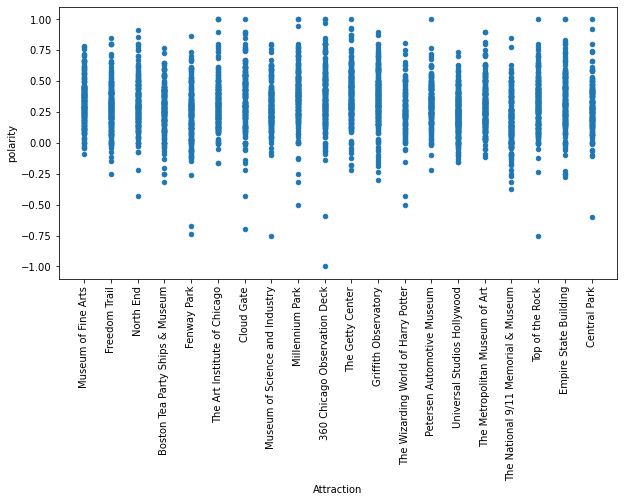

In [140]:
# checking polarity of all cities' attractions
sample_grcty = group_city.sample(1000).apply(sentiment_func, axis=1)
sample_grcty.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

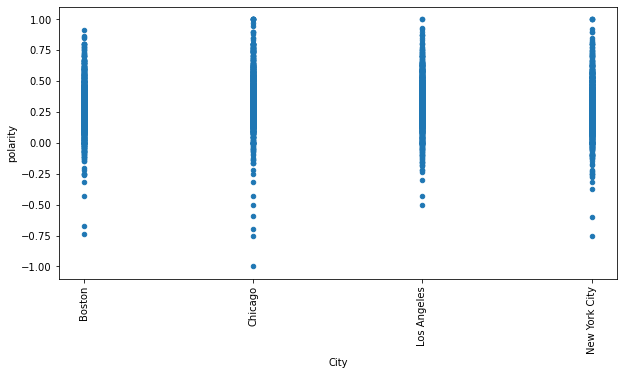

In [141]:
# checking polarity of all cities
sample_grcty.plot.scatter('City', 'polarity').tick_params(axis='x', labelrotation = 90)

# Analyzing Rating Based on Month and Year

In [142]:
ta_5vspoor.groupby('Attraction').agg(['count'])['Title']

ta_5vspoor_df = ta_5vspoor.loc[:, ['Visited', 'Rating']]
ta_5vspoor_df.sample(15)

,Visited,Rating
19303,2018-11-01,5
22295,2019-04-01,5
27870,2019-08-01,Poor
22142,2018-11-01,5
27925,2019-09-01,5
27532,2019-07-01,5
21985,2018-09-01,5
21382,2017-09-01,5
19826,2019-06-01,5
21660,2018-03-01,5


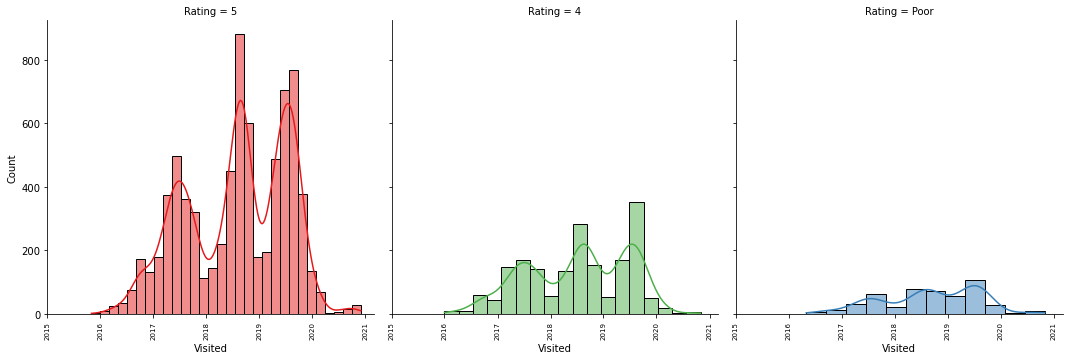

In [143]:
# graphing ratings counts
visited_grid = sns.FacetGrid(data=ta_5vspoor_df, col='Rating', hue="Rating", palette="Set1", height=5,
                             aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid.map(sns.histplot, "Visited", kde=True)

visited_grid.set_xticklabels(rotation='vertical', fontsize=7)

In [144]:
poor_date = ta_5vspoor[(ta_5vspoor['Visited']>'2019-03-01') &
           (ta_5vspoor['Visited']<'2019-09-01') &
           (ta_5vspoor['Rating']=='Poor')]
poor_date

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
23970,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,81,10,0,Poor,"This would be a super activity for families. My two sisters and I were in town for Marathon weekend and (even without children) thoroughly enjoyed the presentation - A mix of play along actors, multimedia and some museum pieces. I think kids under 6 would not really understand. Although it was an enjoyable hour I think it is probably $6 - $9 overpriced. Coming from Canada and adding the exchange rate made it not really worth the $30.US price",Fun and Informative - but Overpriced,TTTravels,MISSISSAUGA,CANADA,,,,3
23974,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,94,25,1,Poor,"Skip it. It's not a museum. There are a town hall re-enactment by the staff followed, a pretend tea tossing exercise, a quick walk around the boat, then a couple videos. The tea box handed down through generations is plausible, the tea recovered from the boot not so much. The digital picture technology was cool. Not a 'museum' experience.",If you are over 12 ...,Kristopher Kent,MIDDLETON,WI,,,,3
23975,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,184,82,0,Poor,Adult fare is $29 which is expensive for just over an hour. The staff are enthusiastic and we learned some interesting facts but it was all too hurried. Felt like we were on a conveyor waiting for the next group to be pushed through behind us. They couldnâ€™t wait to get us out into the attached tea room. Didnâ€™t even have enough time to â€œthrowâ€ tea box into the water. Poor value overall,Not good value and very hurried,Noshortcuts,YSTRADFELLTE,UNITED KINGDOM,,,,2
23978,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,41,8,0,Poor,"Seemed a bit expensive for what you got, but the kids enjoyed the interaction and it was well done. Plenty to see and gave a good Understanding of boston tea party",Great for kids,jeanpaulstoker,GOLD COAST,AUSTRALIA,,,,3
23980,Boston Tea Party Ships & Museum,Boston,2019-04-01,2019-04-01,19,1,0,Poor,"The admission fee is about $30/person, and the whole experience does not worth it. You would have a chance to dump the ""tea"" from the ship. Before coming, I expected I would see the ""real tea"" or something similar. The real experience was just dumping some regular boxes, which look like a pillow at my house. The lower level of the ship smelled weird, but that can be understood as it was a rainy day. However, the museum does have some interesting items from the Boston Tea Party, such as a tea container from the event. One short movie about the battle of Lexington and the midnight ride of Paul Revere is also included in the experience. Keep in mind that photos are prohibited for most of the parts.",Not worth your time and money!!,Gia Phuong Phan,,,,,,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22413,Museum of Fine Arts,Boston,2019-08-01,2019-08-01,81,46,0,Poor,I went there to see Dennis Hopper paintings but the third floor was closed. They didnâ€™t advise me when I bought the tickets and there were no evidence of this on the site or in the museum I was really disappointed. The collection is amazing there are beautiful paintings but it is very difficult to orientate yourself in the museum. What a pity for the Hopper paintings.,Amazing collections but I didnâ€™t like the way is displayed,EarthGypsy,MILAN,ITALY,,,,3
26160,North End,Boston,2019-05-01,2019-05-01,"1,300",423,0,Poor,"I'm not sure what we were expecting but the North end was a little dull - plenty of Italian restaurants and a few historical sites, but it all felt a little artificial.",OK but a little disappointing,BrushM,OXFORD,UNITED KINGDOM,,,,3
26196,North End,Boston,2019-06-01,2019-06-01,152,55,0,Poor,We went by to see if we could go in but it was closed. They close pretty early. I think we were ther

- There seems to be a larger uptick in poor ratings in middle of 2019

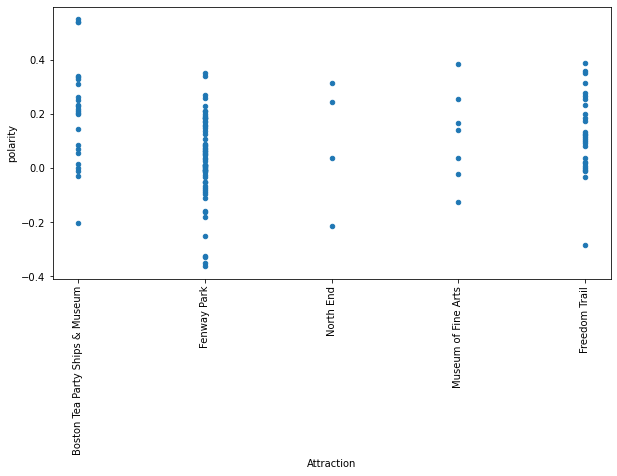

In [145]:
# checking polarity within the dates above
sample_length_poordate = len(poor_date)

sample_poordate = poor_date.sample(sample_length_poordate).apply(sentiment_func, axis=1)
sample_poordate.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [146]:
poor_fp = poor_date[poor_date['Attraction']=='Fenway Park']

In [147]:
for i in list(poor_fp.index):
    print(i)
    print(poor_fp.loc[i, 'Attraction'])
    print(poor_fp.loc[i, 'Text'])
    print('\n')
    print('-'*50)

27176
Fenway Park
I purchased my ticket on line for pick up at Will Call window. Late opening of the ticket window and Automation problems led to standing there for 30 minutes. I guess I should be great full as that translated to less time spending crazy money. I have been to baseball stadiums all over the world but this one must be the most expensive. $5 for bottled water.


--------------------------------------------------
27183
Fenway Park
Went on this tour as part of a school field trip. The tour did not live up to my expectations, as it was very short and we didn't see very much. Upon leaving, it started to rain so we asked if we could eat our school lunches under the concourse; the answer was no. Weâ€¦


--------------------------------------------------
27199
Fenway Park
Guide was great. Park was interesting. Would have gone to a game if Sox were in town when I was. Sitting in the press box was very cool. Problem: stop hiding Yawkey's bigotry. It's part of the story. It's why Y

In [148]:
# Word Count
corpus_poor_fp = ' '.join(poor_fp[poor_fp['Text'].notnull()]['Text']).lower()
tokens_poor_fp = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_poor_fp) if tokens not in stop_filters]

fdist_poor_fp = FreqDist(tokens_poor_fp)
fdist_poor_fp.most_common(10)

[('tour', 87),
 ('fenway', 53),
 ('game', 52),
 ('park', 46),
 ('seat', 41),
 ('field', 31),
 ('stadium', 29),
 ('fan', 29),
 ('see', 28),
 ('ticket', 24)]

In [149]:
poor_date.loc[27183, 'Text']

"Went on this tour as part of a school field trip. The tour did not live up to my expectations, as it was very short and we didn't see very much. Upon leaving, it started to rain so we asked if we could eat our school lunches under the concourse; the answer was no. Weâ€¦"

### Analyzing Ratings of Specific Attractions

In [150]:
ta_5vspoor_1 = ta_5vspoor[(ta_5vspoor['Attraction']=='Boston Tea Party Ships & Museum')]
ta_5vspoor_1

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
0,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,360,186,0,5,"We stopped over here on our way to the airport because we had a couple of hours to spare. It was a very entertaining and educational hour. They have actors re-enacting the events of the Boston Tea Party, as well as talking pictures and a movie. Tea in the tearoom was also fun. Here they have people who stay in character engaging with you while you ask questions about the event.",Entertaining and Educational,nadiag0610,SAN DIEGO,CA,,,,5
1,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,174,17,0,5,Who knew committing treason could be fun? From the moment u step in you are playing a part in the story of the tea party. This interactive lively museum staffed with talented and enthusiastic actors was the best all around. Highly recommend! Awesome for kids. Diana was aâ€¦,History Comes Alive,1TravelNP,GREENSBORO,NC,,,,5
2,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,31,11,0,5,Loved this. It's great fun and there are some nice surprises which make it great. You learn lots and the actors really involve you (and I'm not someone who likes organised fun). If you buy the old town trolley tours you get this for free which saves you quite a bit of money. Recommended.,Really well done,Paulrob75,LONDON,UNITED KINGDOM,,,,5
3,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,44,26,0,5,"Well organised tour, staff very knowledgeable and friendly. Good for adults and children. Abigails tea room at the end very reasonably priced",Very informative,budd1965,DERBY,UNITED KINGDOM,,,,5
4,Boston Tea Party Ships & Museum,Boston,2017-03-01,2017-03-01,21,2,0,5,This museum is very interactive and extremely interesting. The actors that are your tour guides are excellent and extremely knowledgeable. Most of the tour you are on you feet so wear comfortable shoes. This is a must-see if you are visiting Boston!,Wow!,Kara B,RICHMOND,TX,,,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-09-01,19,9,0,4,It was informative and fun - had some interesting things to see but was definitely a tourism trap. They try hard to stay in period. You have to stay in a group and move as a group.Their tearoom looked good but we did not stay.,Tourism at its highest,AnnaDuke,LAS VEGAS,NV,,,,4
34849,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-08-01,78,8,0,4,"What a well planned tourist attraction this is. Loved the introduction where we were all transported back in time to a meeting. My husband had a little speaking part to play which immersed us even more. We learned so much about the night of the 'Tea Party', and very well acted out by all the staff. The tea room at the end was lovely too. I enjoyed the idea of actually tasting all the teas which were originally aboard the ship, even if I didn't actually enjoy drinking all of them!! A little on the pricey side but well worth the visit.",Take part,Diane A,NUNEATON,UNITED KINGDOM,,,,4
34851,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-10-01,15,6,0,5,This museum is an interactive one. The cast assigns a character from the era to each guest. I highly recommend it for all ages!,History made Fun,Pamela F,BELTON,,,,,5
34853,Boston Tea Party Ships & Museum,Boston,2017-11-01,2017-10-01,88,8,0,5,"Excellent history in an interactive session with lots to see, do and learn. Well worth the entry fee. Not too busy either. Nice tea room to visit afterwards, too. Would definitely recommend.",Historical entertainment,Lauren P,SURREY,UNITED KINGDOM,,,,5


In [151]:
ta_5vspoor_1_df = ta_5vspoor_1.loc[:, ['Visited', 'Rating']]
ta_5vspoor_1_df.sample(15)

,Visited,Rating
24201,2019-08-01,5
23256,2017-12-01,5
23194,2017-10-01,5
23267,2017-09-01,Poor
23089,2017-09-01,5
23861,2018-10-01,5
23951,2019-03-01,4
23509,2017-07-01,5
23070,2017-08-01,5
24065,2019-06-01,5


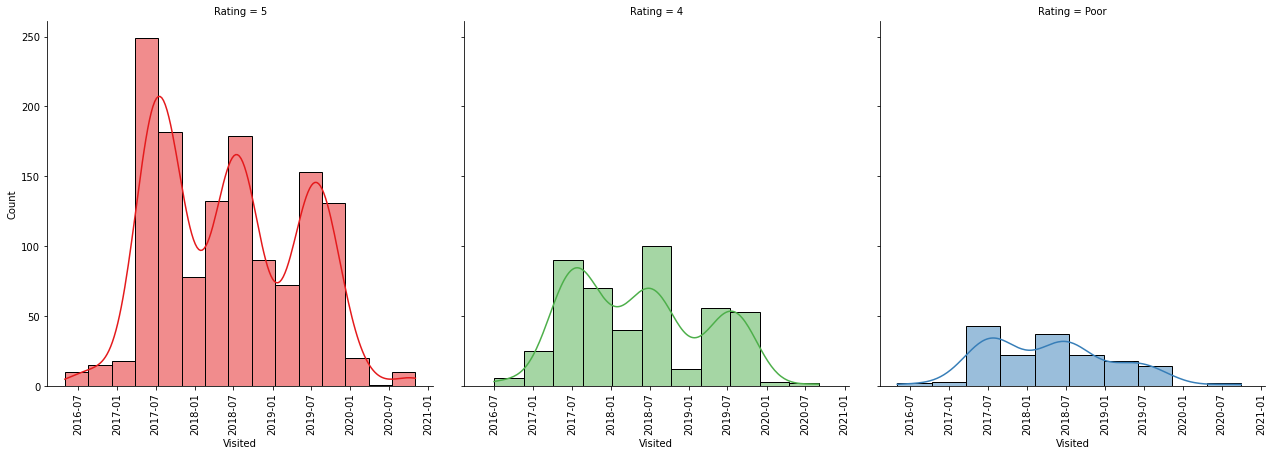

In [152]:
# ratings count by visit date
visited_grid_1 = sns.FacetGrid(data=ta_5vspoor_1_df, col='Rating', hue="Rating", palette="Set1", height=6, aspect=1,
                             col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_1.map(sns.histplot, "Visited", kde=True)

visited_grid_1.set_xticklabels(rotation='vertical', fontsize=10)

- There were fewer poor ratings in the summer/fall of 2019
- This seems to indicate the later reviews may be better overall during the seasonal spike

In [153]:
ta_5vspoor_2 = ta_5vspoor[(ta_5vspoor['Attraction']=='Fenway Park')]
ta_5vspoor_2

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
10,Fenway Park,Boston,2018-08-01,2018-08-01,7,21,0,5,We went on the stadium tour and this was very well run and our tour guide was very knowledgeable about the stadium and the Red Sox. Great views around the stadium from multiple vantage points.,Great tour experience,morrisonpaul47,DUDLEY,UNITED KINGDOM,,,,5
11,Fenway Park,Boston,2018-08-01,2018-07-01,7,0,0,5,Absolutely the best seats in the house. Fenway Park is the best Park in baseball. So much history and a love of baseball and City of Boston!,Green Monster seats,Linda B,OPPENHEIM,UNITED STATES,,,,5
12,Fenway Park,Boston,2018-08-01,2018-08-01,17,2,0,5,"I hadnâ€™t been back to Fenway Park since I moved away from New England in 1959, but the place still has unsurpassed charm. We went to a get-away game on a Thursday afternoon and the place was still sold out and 90% full. It helped, of course, that the Red Sox are 50 games over .500 and they were playing a good team, the Indians. We had 8 tickets, gotten through the MLB web site, in the grandstand on the first-base side. They were reasonably priced, at $61 a pop. But, yes, you can be behind a post on those lower deck grandstand seats. Still, youâ€™re a lot closer to the field than you would be in similar seats at Dodger Stadium. The amenities are good for a park built in 1912 and the choices are superb. Food and the like are no more expensive than they are at Pac Bell or Chase Field. Just donâ€™t drive and park if you can avoid it. $60 for parking close by is above my pay grade. We had to walk half a mile to save forty bucks. Get there early if possibleâ€”gates open 90 minutes before game timeâ€”and avoid the crush of the sold-out crowds. Boston fans are friendly and affable, even if youâ€™re sporting visiting-team gear (not that we were, but there were some Cleveland fans there). Bring a seat cushion if you sitting in the cheap seats as they are hard and narrow. All in all, if youâ€™re a baseball fan by all means visit Fenway Park when the Red Sox are in town. You donâ€™t need to spend the rent money on tickets, because you are close to the field from anywhere. I do suggest avoiding the lower grandstand because of the possibility of getting stuck behind a post, however. And, oh yeah, the Sox won 7-0. Plus, we found the brick we were looking for. My dad loved his Red Sox. And he loved long enough to see them win the WS in 2004.",Still the Greatest Place to see MLB,Philip L,LAS VEGAS,NV,,,,5
13,Fenway Park,Boston,2018-08-01,2018-08-01,37,21,0,Poor,"Lots of shops , live buskers , and street food in Quincy market . It is for tourist . But It was alot of fun to visit",vibrant little area,Tender A,KOBE,JAPAN,,,,3
14,Fenway Park,Boston,2018-08-01,2018-08-01,74,23,0,5,We went to 2 Yankees Red Sox games here. We loved it. So much character. You have to get a Fenway Frank.,Yankees Red Sox,T W,,,,,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34448,Fenway Park,Boston,2018-09-01,2018-09-01,159,28,0,5,"We always wanted to go and see the green monster, it didnâ€™t disappoint, great park. Watched the Sox vs Yankees. Great choice of beers and the hotdogs are delicious, itâ€™s a place everyone should visit...itâ€™s historic!",On the bucket list,The_Mold_Guy,CALEDON,CANADA,,,,5
34450,Fenway Park,Boston,2018-09-01,2018-09-01,53,5,0,5,I have been a Sox fan since 7 years old and have never toured Fenway. Great tour and never knew about the red seat in right field. The view from the monster was a great finish to a great tour.,3 days in Boston..,JohnnyK14,GRIMSBY,CANADA,,,,5
34451,Fenway Park,Boston,2018-09-01,2018-09-01,17,2,0,5,"Just like the title says, we lost the game but we really enjoyed ourselves. High priced food and drink, but so happy to be there and making great family memories","We lost, but great time and game",Ed2553377,GLENVILLE,NY,,,,5
34454,F

In [154]:
ta_5vspoor_2_df = ta_5vspoor_2.loc[:, ['Visited', 'Rating']]
ta_5vspoor_2_df.sample(15)

,Visited,Rating
27698,2019-08-01,5
27409,2019-06-01,4
26592,2018-09-01,5
28110,2019-10-01,5
28167,2019-10-01,5
26639,2018-09-01,5
27384,2019-06-01,5
26580,2018-07-01,5
26568,2018-09-01,5
26748,2018-10-01,4


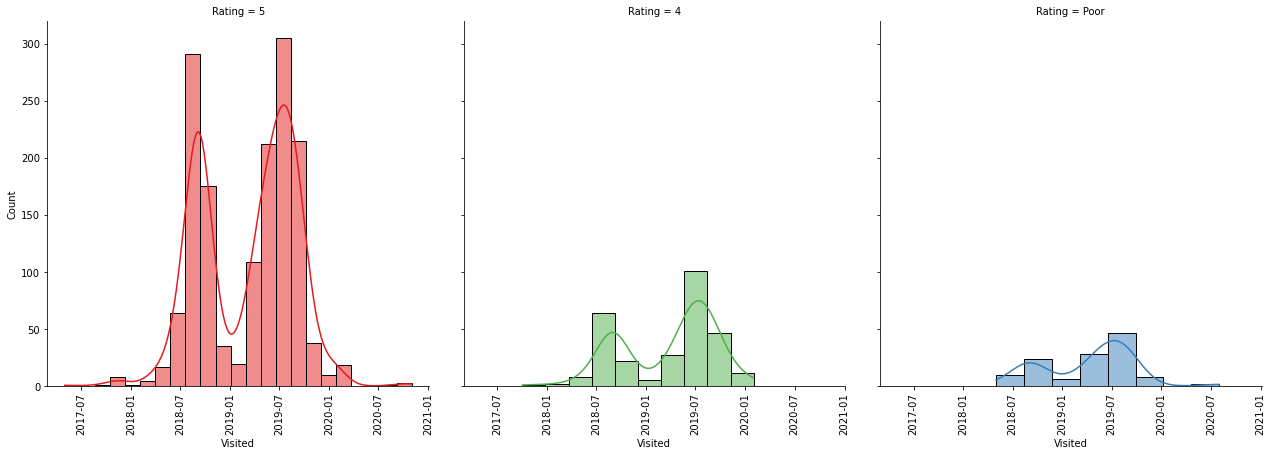

In [155]:
# ratings count by visit date
visited_grid_2 = sns.FacetGrid(data=ta_5vspoor_2_df, col='Rating', hue="Rating", palette="Set1",
                               height=6, aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_2.map(sns.histplot, "Visited", kde=True)

visited_grid_2.set_xticklabels(rotation='vertical', fontsize=10)

- Based on what we can see from the poor ratings histogram from Fenway Park, we may be able to conjecture that the significant increase in poor ratings in Boston was caused by this uptake

In [156]:
ta_5vspoor_3 = ta_5vspoor[(ta_5vspoor['Attraction']=='Freedom Trail')]
ta_5vspoor_3

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
15,Freedom Trail,Boston,2018-08-01,2018-07-01,176,6,0,5,"I love history, so I found out about the Freedom trail, I was in. We didnt follow it from the start, but we bounced around for 2 days seeing everything but Bunker Hill. We will do that next trip. The cemeteries were one if my favorite spots and sitting In the parks were very relaxing. Highly recommend.",A blast from the past,Brent N,METAIRIE,LA,,,,5
16,Freedom Trail,Boston,2018-08-01,2018-07-01,470,20,1,5,I've wanted to do this for a long time and finally got to with my own family. The kids were great during the whole walk along the trail and the walk back to the car. If you have kids you might want to prepare them for the long walk or invest in public transport on the way back. We learned so many things about our history and were able to see a lot of historical sites. The only places to get the Jr Ranger program books are Faneuil Hall and Bunker Hill so grab them first or start on that end maybe. We were fine getting ours at Faneuil Hall though and finished them. Walking it does take pretty much all day and some of the places along the trail cost money and some are cash only.,A must do when visiting Boston.,MyGeeklings,,,,,,5
17,Freedom Trail,Boston,2018-08-01,2018-07-01,46,19,0,5,"This was a great walking tour. We could go at our own pace and stop as needed. Make sure to ware comfortable shoes, the cobble stone can be a little difficult if you are not use to it.",Amazing history,Sandra K,SPRINGFIELD,MO,,,,5
18,Freedom Trail,Boston,2018-08-01,2018-08-01,3,0,0,5,Isaiah Thomas was the best tour I have ever had. He was funny and had everyoneâ€™s attention all throughout the tour,Best tour ever,Travis R,,,,,,5
19,Freedom Trail,Boston,2018-08-01,2018-07-01,116,37,2,5,"There are many reviews, so Iâ€™ll keep it brief. This is a MUST if you are in the are, or close enough to get there. Not to mention, itâ€™s worth being a trip to Boston all on its own. Tour for folks of all ages, mostly handicap accessible (due to the age of this period of history). You can do the walk for free, but I honestly recommend that you take advantage of the museums, churches, and other places of interest. If you have little time or ability to walk this trail, please take a Duck or Old Trolley tour!! Truly a MUST-SEE for American or visiting America.",History of America,Chateau Believe,BIG BEAR REGION,CA,,,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34842,Freedom Trail,Boston,2019-09-01,2019-08-01,97,39,0,5,"A must-do for anyone into the historical aspects of Boston! We started at the North end, and made our way down. A nice way to see the city! Took us about 3 hours, taking our time.",Did only part- but worth it!,910dianel,HARRISBURG,PA,,,,5
34844,Freedom Trail,Boston,2019-09-01,2019-08-01,42,13,0,5,You will learn a lot about American history...it all started here! We took the hop on hop off bus to really get a good overview of the city. Good decision. Commentary was insightful and fun.,A must do in Boston,Laurahill269,PITTSBURGH,PA,,,,5
34847,Freedom Trail,Boston,2019-09-01,2019-08-01,750,91,0,5,The Freedom Trail was a great history lesson or refresher. The trail is very neatly marked so a self tour is very easy. You can also take a guided tour. A very good refreshing history lesson. NOTE : Several of the historical location have an admission charge.,History Lesson,HNBISOFF,BEDFORD,TX,,,,5
34850,Freedom Trail,Boston,2019-09-01,2019-08-01,19,1,0,4,"I wanted to visit Boston to see historical landmarks, and this was the way to do it! I suggest having a friend who knows the area take you around like I did. If not, there are apps with walking audio tours for the trail. The trail will pretty much take you to all the historical places you'd want to see. It will easily fill up a day if you take your time and stop at all

In [157]:
ta_5vspoor_3_df = ta_5vspoor_3.loc[:, ['Visited', 'Rating']]
ta_5vspoor_3_df.sample(15)

,Visited,Rating
18974,2018-09-01,5
19736,2019-06-01,5
20433,2019-10-01,5
20203,2019-09-01,5
19130,2018-10-01,4
19973,2019-07-01,5
19151,2018-09-01,5
18710,2018-07-01,5
19933,2019-07-01,4
20594,2020-03-01,4


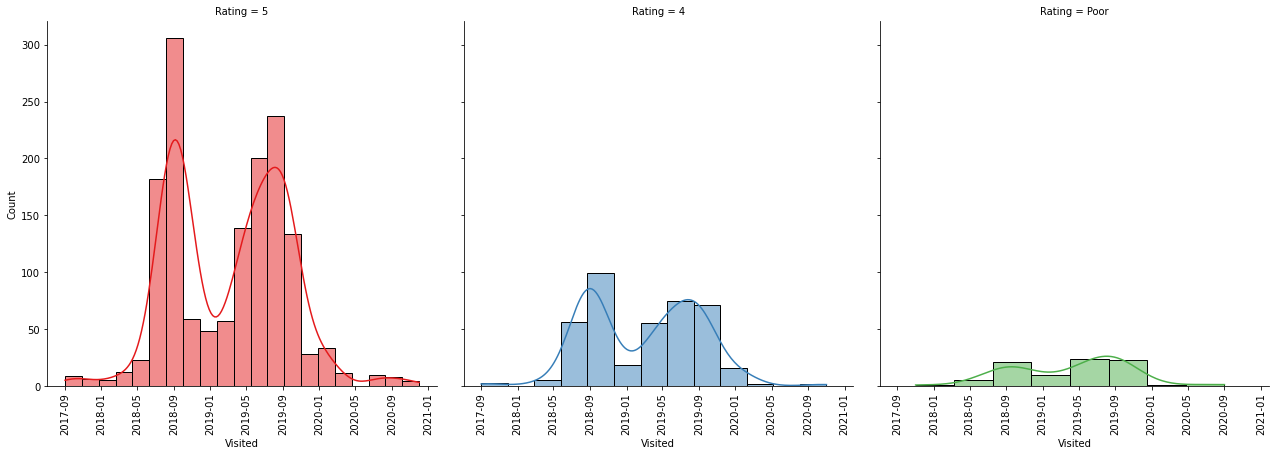

In [158]:
# ratings count by visit date
visited_grid_3 = sns.FacetGrid(data=ta_5vspoor_3_df, col='Rating', hue="Rating", palette="Set1",
                               height=6, aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_3.map(sns.histplot, "Visited", kde=True)

visited_grid_3.set_xticklabels(rotation='vertical', fontsize=10)

In [159]:
ta_5vspoor_4 = ta_5vspoor[(ta_5vspoor['Attraction']=='Museum of Fine Arts')]
ta_5vspoor_4

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
1990,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,40,2,0,5,We visit the museum monthly and are always pleased with the shows and the people who work at the museum. Shows are always well done and provide great information on the artist and the way the work is constructed. We consider ourselves lucky to live so close that we can visit often. There is also a great restaurant at the muceum.,A great museum--period,M1786GJjosephc,BRAINTREE,MA,UNITED STATES,,,5
1991,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,70,14,0,5,"This one of the reasons Boston is a first class city. Well known for its impressionist collection, Sargent murals, Early American silver sculpture and regular exhibits. You can't do it all in one day. So take a tour, eat at the Atrium, and admire the architecture. If you can fit it in the special exhibit, More than that you will get museum freeze. Plan to come back soon!! Think about a membership and save on lunch, parking and admission, It is worth it.",A TREASURE,grandmeggy,ORLEANS,MA,,,,5
1992,Museum of Fine Arts,Boston,2016-12-01,2016-11-01,4,1,0,5,êµí†µë„ íŽ¸í•˜ê³ ë³¼ ìž‘í’ˆì´ ë§Žì•˜ìŒ. ìž‘í’ˆì´ ë§Žì•„ ì¶©ë¶„í•œ ì‹œê°„ì„ ê°€ì§€ê³ ê°€ëŠ” ê²ƒì´ ì¢‹ì„ ë“¯. The transportation was very convenient. There are lots of display. I recommend you have enough time to splend in there.,Great!!!,Sammy J,,,,,,5
1993,Museum of Fine Arts,Boston,2016-12-01,2016-12-01,2,1,0,5,Went to school in Boston and I would spend afternoons at the MFA when I needed a place away from the hustle and bustle and stress of school. Great museum with an astounding variety. You won't be able to see it all in one visit. The cafe and restaurant are also great!,One of my favorite places in Boston,thatyoungtraveler,BOSTON,MA,,,,5
1994,Museum of Fine Arts,Boston,2016-12-01,2016-10-01,31,13,0,5,My only complaint was that I did not have time to see everything. We spent a half day but could have spent a full day. Really enjoyed the cafÃ©.,This is a world class facility,DAVID P,BRITISH COLUMBIA,,,,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34589,Museum of Fine Arts,Boston,2017-02-01,2017-02-01,24,18,0,5,"I like the new member plans; however, I wish the instructors who bring students to the museum were more respectful. They are loud and extremely disruptive to a quiet, reflective, appreciating, enjoyable experience. It's honestly like the instructors who teach IN the museum think if they speak louder that their points will become more valid - LOL! Then the students start talking out loud after the instructors set these disrespectful tones and it becomes a big racket - not the best experience on my last visit out of my 100+ visits to this MFA over the years. The museum itself is always changing (for the better). Love the new Monet room and the procurement plaques/""Art with a History"". Also, the large Renoir of the dancing couple in the market place is back (I think for a while now but it seemed to be on-loan or getting cleaned or just absent for too long), and they've changed up the European room quite a bit, bringing the Gaugan's upstairs, etc. I don't personally care for Gaugan but I think the changes are important because it makes you look at the same pieces, differently, with the different arrangements and comparisons. Overall, the representation of MFA's display of art is superior. Lunch at the main dining cafe with the green chihuly is regularly disappointing. I have to eat here with every visit because it's ""tradition"", but I don't eat/like brussel sprouts or sweet potatoes (regularly their only vegetable sides), and much of their food has onions, scallions or chives which is terrible for someone with an allicin allergy. They've also done away with their delish grain rolls, but the sweet rolls are still there and fantastic. Also - if you eat late 

In [160]:
ta_5vspoor_4_df = ta_5vspoor_4.loc[:, ['Visited', 'Rating']]
ta_5vspoor_4_df.sample(15)

,Visited,Rating
20926,2017-04-01,5
20836,2016-08-01,4
21410,2017-10-01,5
20849,2017-03-01,Poor
20771,2016-06-01,4
20727,2016-04-01,5
22156,2019-01-01,5
22567,2020-02-01,4
20923,2017-04-01,4
22436,2019-07-01,5


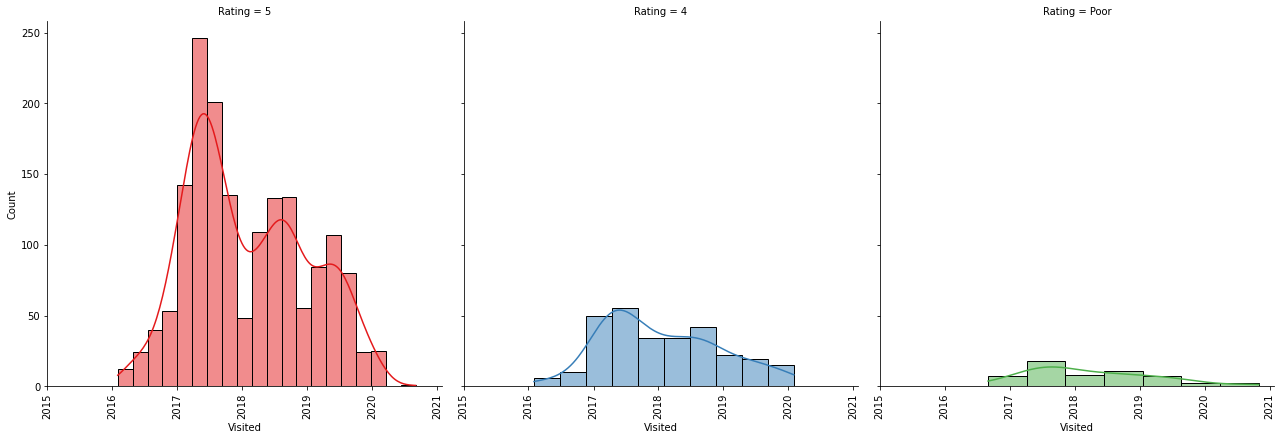

In [161]:
# ratings count by visit date
visited_grid_4 = sns.FacetGrid(data=ta_5vspoor_4_df, col='Rating', hue="Rating", palette="Set1",
                               height=6, aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_4.map(sns.histplot, "Visited", kde=True)

visited_grid_4.set_xticklabels(rotation='vertical', fontsize=10)

In [162]:
ta_5vspoor_5 = ta_5vspoor[(ta_5vspoor['Attraction']=='North End')]
ta_5vspoor_5

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
1995,North End,Boston,2016-10-01,2016-10-01,98,14,0,5,"Beautiful old buildings, historical sites, great restaurants, pubs and shops! From lunch to dinner to evening drinks, we found it all here. The atmosphere is lively. There are so many good restaurants, it's hard to choose!",A must when your in Boston,Jill H,TEXAS,,,,,5
1996,North End,Boston,2016-10-01,2016-10-01,61,6,0,5,Lots of great Italian restaurants & history. Beautiful neighborhood. Take time to wander around. You'll stumble onto Paul Revere's home & park.,Cool area,dagogirl07,HOUSTON,TX,,,,5
1997,North End,Boston,2016-10-01,2016-10-01,13,0,0,5,Great Italian food. Almost any place you go to eat on the North End is going to have fantastic food. Go to the North End and explore the restaurants and shops and enjoy.,Get your Italian on,Timothy H,,,,,,5
1998,North End,Boston,2016-10-01,2016-10-01,79,25,0,4,The North End has great Italian food but do not drive here. Try to get recommendations from locals or concierge. Great area to walk around.,Great food,delainao,DALLAS,TX,,,,4
1999,North End,Boston,2016-10-01,2016-09-01,25,7,0,5,Stunning area of Boston. Such a huge area for eating. You would do right to book as its hopping busy but absolutely amazing there. So so worth a visit. Very central to walk to or take a quick cab. You'll see way more by walking.,Stunning & Busy,EvelynC845,YOUGHAL,IRELAND,,,,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34478,North End,Boston,2017-11-01,2017-10-01,53,10,0,5,"this was one of our favorite parts of Boston. walking Hanover st. and seeing real italian, as opposed to ""boxed"". had gelato at a sidewalk cafe. would recommend this and do it again.",smell the garlic and fresh bread,jamie a,NASHVILLE,,,,,5
34480,North End,Boston,2017-10-01,2017-10-01,51,8,0,5,Love the north end ! It's got a great selection of restaurants and lots of cafes for cappuccinos and goodies,Best spot in town,Lenore D,HUNTINGTON,NY,,,,5
34481,North End,Boston,2017-11-01,2017-11-01,54,8,0,4,"While I've been here before, I must say I enjoyed this visit the most. The food was good and the walk around the town was great.",NOV Visit,Albert E,OLIVE BRANCH,MS,,,,4
34483,North End,Boston,2017-10-01,2017-09-01,49,12,0,5,"We stayed here on our visit to Boston, first time in the city. The location was perfect, restaurants were excellent, loved all the history within walking distance to our place. Highly recommend!!",Loved the North End!,Teresa Y,,,,,,5


In [163]:
ta_5vspoor_5_df = ta_5vspoor_5.loc[:, ['Visited', 'Rating']]
ta_5vspoor_5_df.sample(15)

,Visited,Rating
25348,2017-09-01,5
25464,2017-10-01,5
26019,2018-11-01,5
26222,2019-07-01,5
25743,2018-06-01,5
24769,2017-02-01,5
26378,2019-10-01,5
25040,2017-06-01,5
25420,2017-10-01,5
26436,2019-05-01,5


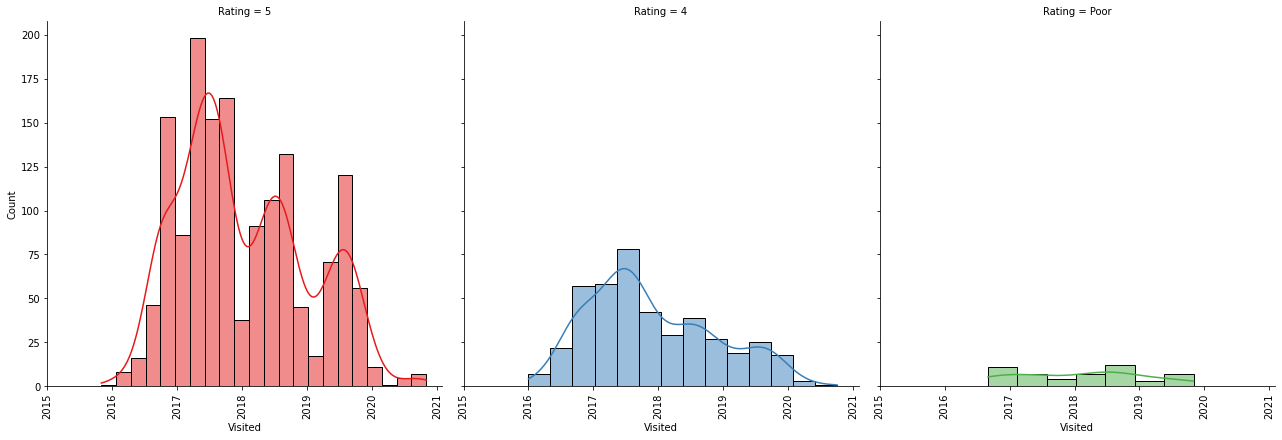

In [164]:
visited_grid_5 = sns.FacetGrid(data=ta_5vspoor_5_df, col='Rating', hue="Rating", palette="Set1",
                               height=6, aspect=1, col_order=ta_chng_rat.Rating.value_counts().index)

visited_grid_5.map(sns.histplot, "Visited", kde=True)

visited_grid_5.set_xticklabels(rotation='vertical', fontsize=10)

## Analyzing 5 star reviews on specific month and year

In [165]:
ta_5vspoor_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-07-01']

corpus_5star_date = ' '.join(ta_5vspoor_date[ta_5vspoor_date['Rating']==5]['Text']).lower()
tokens_5star_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_5star_date) if tokens not in stop_filters]

bigram_5star_date = list(nltk.bigrams(tokens_5star_date))
fdist_bi_5star_date = FreqDist(bigram_5star_date)
fdist_bi_5star_date.most_common(10)

[(('freedom', 'trail'), 63),
 (('tour', 'guide'), 47),
 (('baseball', 'fan'), 41),
 (('fenway', 'park'), 37),
 (('red', 'sox'), 29),
 (('green', 'monster'), 28),
 (('north', 'end'), 28),
 (('tea', 'party'), 26),
 (('bunker', 'hill'), 21),
 (('really', 'enjoyed'), 17)]

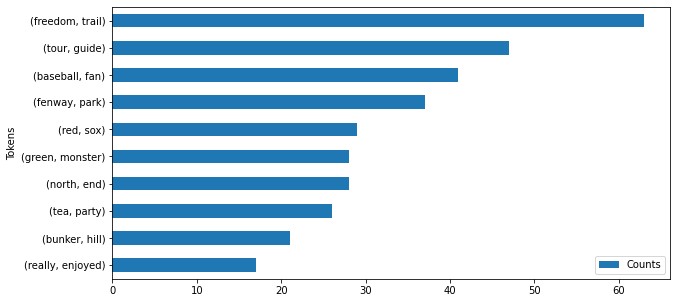

In [166]:
# Graph of 5 Star Bigram
fdist_bi_5star_date_graph = pd.DataFrame(fdist_bi_5star_date.most_common(10),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_5star_date_graph.invert_yaxis()

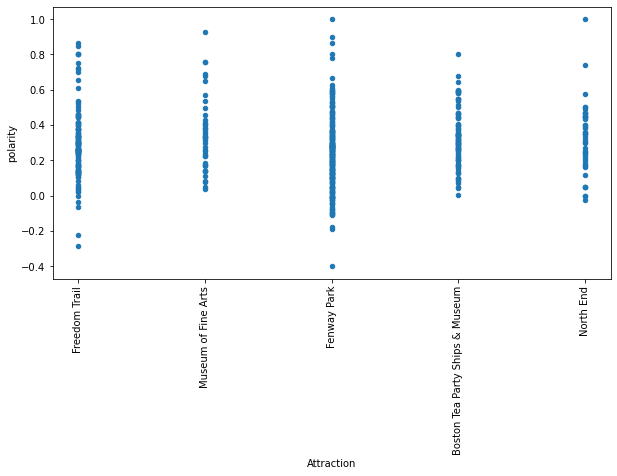

In [167]:
# polarity
sample_size_tadate = len(ta_5vspoor_date.Attraction)

sample_tadate = ta_5vspoor_date.sample(sample_size_tadate).apply(sentiment_func, axis=1)
sample_tadate.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- Analyzing all reviews on specific month and year

In [168]:
# Get reviews for June 2019
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2019-06-01']

In [169]:
# word count
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date) if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('freedom', 'trail'), 58),
 (('fenway', 'park'), 38),
 (('tea', 'party'), 33),
 (('red', 'sox'), 31),
 (('tour', 'guide'), 30),
 (('baseball', 'fan'), 28),
 (('highly', 'recommend'), 26),
 (('north', 'end'), 21),
 (('ball', 'park'), 18),
 (('green', 'monster'), 18),
 (('along', 'way'), 17),
 (('north', 'church'), 15),
 (('bunker', 'hill'), 15),
 (('great', 'time'), 13),
 (('much', 'history'), 13),
 (('guided', 'tour'), 13),
 (('paul', 'revere'), 13),
 (('great', 'experience'), 12),
 (('great', 'place'), 12),
 (('red', 'brick'), 12)]

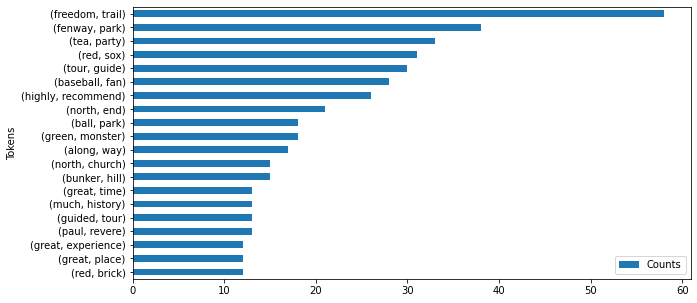

In [170]:
# graphing word count
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

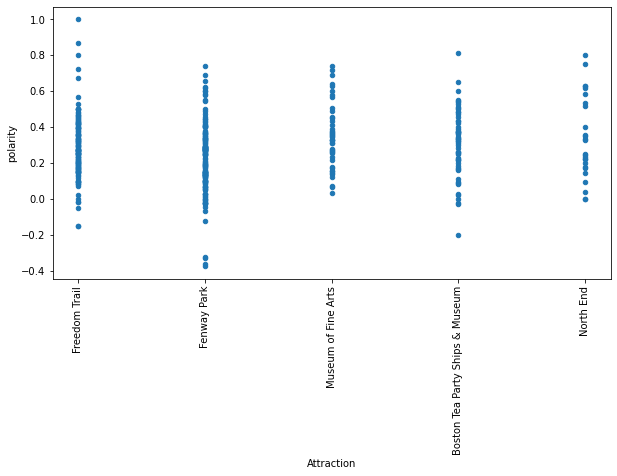

In [171]:
# polarity by attraction
sample_size_attr = len(ta_date.Attraction)

sample_attr = ta_date.sample(sample_size_attr).apply(sentiment_func, axis=1)
sample_attr.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

In [172]:
# Get reviews for Jan 2020
ta_date = ta_5vspoor[ta_5vspoor['Visited']=='2020-01-01']

In [173]:
# word count
corpus_date = ' '.join(ta_date['Text']).lower()
tokens_date = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_date)\
               if tokens not in stop_filters]

bigram_date = list(nltk.bigrams(tokens_date))
fdist_bi_date = FreqDist(bigram_date)
fdist_bi_date.most_common(20)

[(('freedom', 'trail'), 13),
 (('tour', 'guide'), 5),
 (('highly', 'recommend'), 5),
 (('special', 'exhibit'), 5),
 (('red', 'line'), 4),
 (('north', 'end'), 4),
 (('well', 'worth'), 3),
 (('tea', 'party'), 3),
 (('baseball', 'fan'), 3),
 (('great', 'way'), 3),
 (('way', 'see'), 3),
 (('really', 'enjoyed'), 3),
 (('fenway', 'park'), 3),
 (('walking', 'freedom'), 3),
 (('along', 'way'), 3),
 (('guided', 'tour'), 3),
 (('burying', 'ground'), 3),
 (('little', 'italy'), 3),
 (('contemporary', 'art'), 3),
 (('great', 'experience'), 2)]

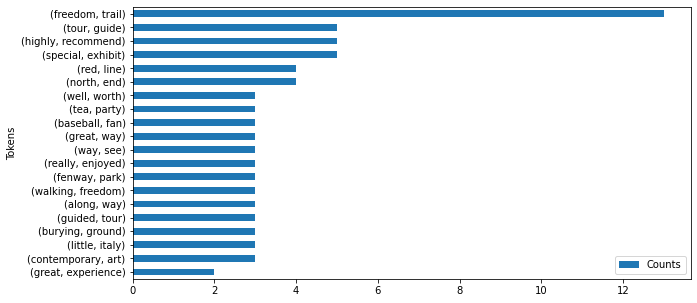

In [174]:
# graph of word count
fdist_bi_date_graph = pd.DataFrame(fdist_bi_date.most_common(20),
                                    columns=['Tokens',
                                             'Counts']).set_index('Tokens').plot(kind='barh')
fdist_bi_date_graph.invert_yaxis()

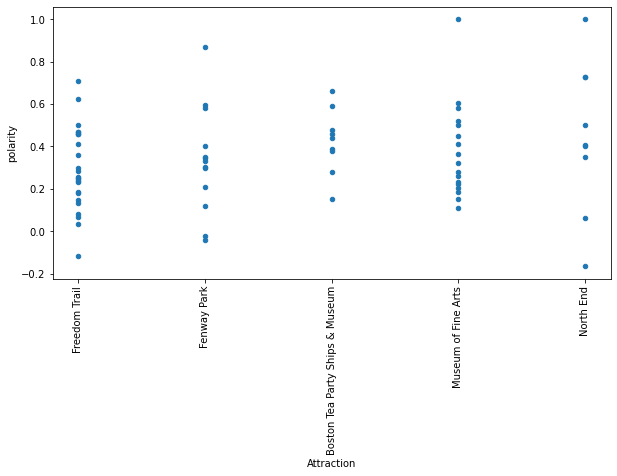

In [175]:
# polarity
sample_size_attr = len(ta_date.Attraction)

sample_attr = ta_date.sample(sample_size_attr).apply(sentiment_func, axis=1)
sample_attr.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

# User Location-Based Analysis

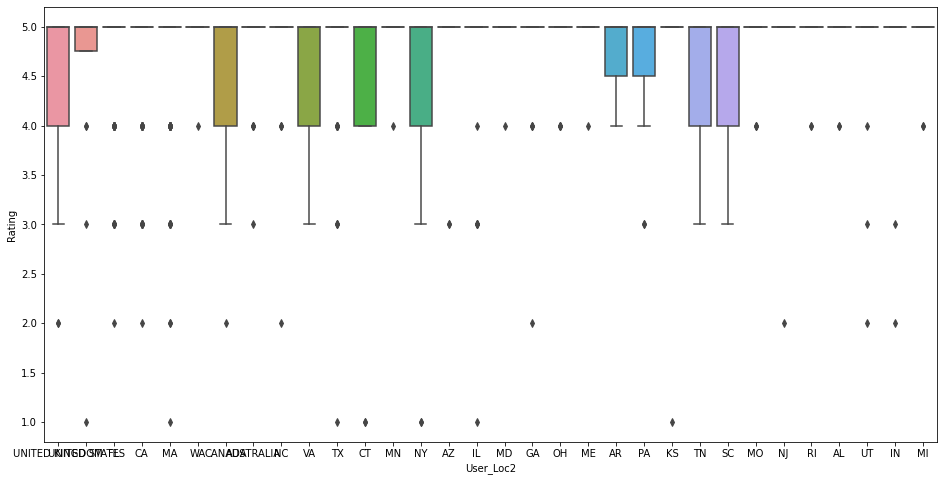

In [176]:
# checking median of rating based on location where there are more than 10 reviews from a loc
user_loc_fenway = tripadv[(tripadv['City']=='Boston') &\
                          (tripadv['User_Loc2']!='') &\
                          (tripadv['Attraction']=='Fenway Park')][['User_Loc2', 'Rating']]

list_of_locs = list(user_loc_fenway['User_Loc2'].value_counts().loc[lambda x: x>10].index)
user_loc_fenway_5 = user_loc_fenway[user_loc_fenway['User_Loc2'].isin(list_of_locs)]

fig, ax = plt.subplots(figsize=[16, 8])
ax = sns.boxplot(x='User_Loc2', y='Rating', data=user_loc_fenway_5)

In [177]:
user_loc_df = tripadv[(tripadv['City']=='Boston') &
                     (tripadv['User_Loc2']!='')]
user_loc_agg_df = user_loc_df.groupby('User_Loc2')['Rating'].agg(['count', 'mean', 'std'])
user_loc_agg_df

,count,mean,std
User_Loc2,,,
GREECE,1,4.000000,NaN
AB,1,5.000000,NaN
AK,8,4.750000,0.462910
AL,58,4.775862,0.531238
ALBERTA,3,5.000000,0.000000
...,...,...,...
WI,79,4.658228,0.677213
WI,1,5.000000,NaN
WV,16,4.875000,0.341565


In [178]:
user_loc_agg_df_10 = user_loc_agg_df[user_loc_agg_df['count']>=10].sort_values('mean',
                                                                               ascending = False)
user_loc_agg_df_10.head(5)

,count,mean,std
User_Loc2,,,
WV,16,4.875000,0.341565
OK,40,4.825000,0.446496
SD,17,4.823529,0.392953
COLOMBIA,11,4.818182,0.404520
NJ,124,4.798387,0.493533


In [179]:
user_loc_agg_df_10.tail(5)

,count,mean,std
User_Loc2,,,
INDIA,46,4.543478,0.545956
ISRAEL,18,4.500000,0.857493
THE NETHERLANDS,30,4.466667,0.628810
SPAIN,16,4.437500,0.813941
SOUTH AFRICA,11,4.000000,1.000000


# Use States or 10 most common locations

In [180]:
# based on df above
ta_loc_1 = user_loc_df[(user_loc_df['User_Loc2']=='WV') |
                       (user_loc_df['User_Loc2']=='OK') |
                       (user_loc_df['User_Loc2']=='SD') |
                       (user_loc_df['User_Loc2']=='COLOMBIA') |
                       (user_loc_df['User_Loc2']=='NJ')]
ta_loc_1.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
25794,North End,Boston,2018-07-01,2018-07-01,100,8,0,5,Nice area with some historic places around. Worth a peek. Can combine with the USS Constitution and you can walk from mass transit.,Beautiful Walk,hollyc366,JACKSON,NJ,,,,5
20069,Freedom Trail,Boston,2019-08-01,2019-08-01,3,4,0,5,"Great walk but long! Wear comfortable shoes, and if you plan on walking the 294 steps up the bunker hill monument, bring water!",Great,Leanne P,HACKETTSTOWN,NJ,,,,5
21322,Museum of Fine Arts,Boston,2017-09-01,2017-09-01,85,32,0,5,"We went for the Monet (and friends) exhibit and spent almost 4 hours touring as much of the museum as possible. We had to leave knowing we were only 1/2 through; my 14 year old would have stayed until closing. The rooms are comfortable (not huge or cramped) and for us, the number of pieces in each section was perfect. The ancient stone exhibits as well as modern jewelry exhibits had thoughtful descriptions in a style that was somewhat conversational. The pieces on display were diverse and thought provoking. Find the enormous foam cup light display on the ceiling near the children 'flying' in a dream. My daughter will be reading the Odyssey this year and wanted to check out Ancient Greece but it was not open. Brunch at the Bravo restaurant was excellent When we visit again we will try an audio tour.","Amazing Collections, Easy to Navigate",njphillips4,PRINCETON,NJ,,,,5
23270,Boston Tea Party Ships & Museum,Boston,2017-12-01,2017-10-01,85,38,0,5,"During our last trip to Boston we visited the Tea Party Museum. First we attended a mock town meeting where the merits of protesting the tax on tea was discussed by Samuel Adams. The hostess to this event was also in colonial dress. Both individuals were well versed and friendly with the attendees. Each person is given a card representing a real resident at the time of the tea party. If you wish to participate in the discussion request such a person. After you go on the replica ship and speak with a mate from the ship. You can tour the ship and go below and observe the cargo. Then you get the opportunity to throw a box of tea into the harbor. Inside there is then a lively discussion between two local women on the implication of the tea party. A movie about the Revolution, as well as an argument between Sam Adams and King George lllis next. A small cafe and gift shop are also on site. The gift shop had a wide variety of items that were reasonably priced. This was one of the best historical attractions I have ever visited. If in the Boston area, don't miss it.",Great Educational/Fun Experience,Frank E,HOWELL,NJ,,,,5
23828,Boston Tea Party Ships & Museum,Boston,2018-10-01,2018-10-01,35,5,0,5,Great museum and Boston Tea Party reenactment. Enjoyed being party of the reenactment and the tour of the ship and the film of the history and people involved.,Wonderful History,George W,BROKEN ARROW,OK,,,,5
19803,Freedom Trail,Boston,2019-06-01,2019-06-01,236,50,0,5,This is a nicely organized self tour of many historical sights in Boston. It is easy to follow as the path is marked by a line of red brick which guides you through the various points of interest. We thoroughly enjoyed taking this tour.,Presentation of history,ernieliedtke,WEIRTON,WV,,,,5
18825,Freedom Trail,Boston,2018-08-01,2018-08-01,28,7,1,5,"The Freedom Trail is very easy to follow (just follow the bricks!), We added a twist: By visiting some old taverns on the way: We visited the Warren Tavern near Bunker Hill for breakfast, The Green Dragon for mid-walk drink, and The Union Oyster House for lunch, we had Bostonâ€¦",Freedom Trail w a twist,excusesbyjulie,SPARTA,NJ,,,,5
24525,North End,Boston,2016-10-01,2016-09-01,28,6,0,5,Enjoyed a day at the North End in Boston. History jumps out at every corner. Enjoyed a meal at Union Oyster House - oldest restaurant in U.S. - Freed

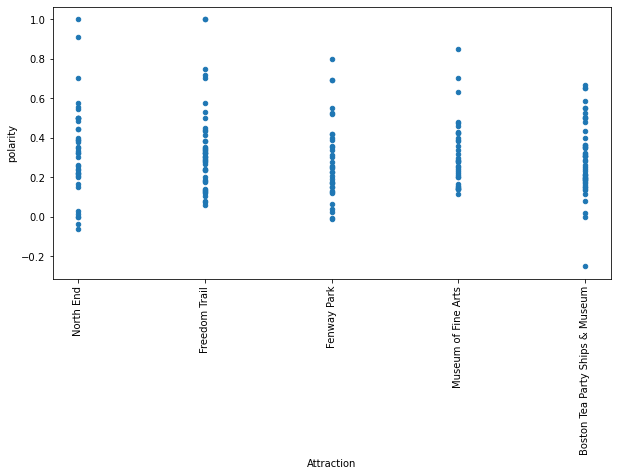

In [181]:
# polarity
sample_size_locattr = len(ta_loc_1.Attraction)

sample_locattr = ta_loc_1.sample(sample_size_locattr).apply(sentiment_func, axis=1)
sample_locattr.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

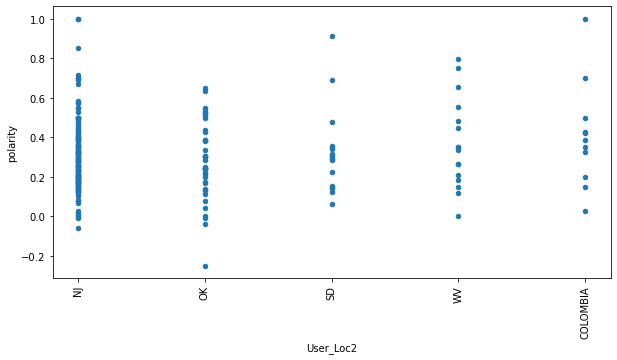

In [182]:
# polarity based on user location
sample_locattr = ta_loc_1.sample(sample_size_locattr).apply(sentiment_func, axis=1)
sample_locattr.plot.scatter('User_Loc2', 'polarity').tick_params(axis='x', labelrotation = 90)

In [183]:
corpus_loc_1 = ' '.join(ta_loc_1['Text']).lower()
tokens_loc_1 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_1) if tokens not in stop_filters]

bigram_loc_1 = list(nltk.bigrams(tokens_loc_1))
fdist_bi_loc_1 = FreqDist(bigram_loc_1)
fdist_bi_loc_1.most_common(10)

[(('tea', 'party'), 25),
 (('freedom', 'trail'), 24),
 (('north', 'end'), 24),
 (('tour', 'guide'), 16),
 (('red', 'sox'), 11),
 (('north', 'church'), 11),
 (('paul', 'revere'), 11),
 (('highly', 'recommend'), 10),
 (('old', 'north'), 10),
 (('green', 'monster'), 9)]

In [184]:
trigram_loc_1 = list(nltk.trigrams(tokens_loc_1))
fdist_tri_loc_1 = FreqDist(trigram_loc_1)
fdist_tri_loc_1.most_common(10)

[(('old', 'north', 'church'), 8),
 (('paul', 'revere', 'house'), 5),
 (('red', 'sox', 'fan'), 4),
 (('freedom', 'trail', 'great'), 4),
 (('time', 'tea', 'party'), 3),
 (('throw', 'tea', 'overboard'), 3),
 (('tour', 'guide', 'knowledgeable'), 3),
 (('great', 'way', 'see'), 3),
 (('walking', 'freedom', 'trail'), 3),
 (('along', 'freedom', 'trail'), 3)]

In [185]:
ta_loc_2 = user_loc_df[(user_loc_df['User_Loc2']=='INDIA') |
                       (user_loc_df['User_Loc2']=='ISRAEL') |
                       (user_loc_df['User_Loc2']=='THE NETHERLANDS') |
                       (user_loc_df['User_Loc2']=='SPAIN') |
                       (user_loc_df['User_Loc2']=='SOUTH AFRICA')]
ta_loc_2.sample(20)

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
23582,Boston Tea Party Ships & Museum,Boston,2018-07-01,2018-07-01,"1,408",86,2,3,"The actual place where the Boston tea party rebellion occured is now reclaimed land with high rise buildings. This museum is slightly away from the actual spot. Every thing is recreated like the 18th century ship, actors taking on roles of the rebel leaders and children among the visitors being asked to throw sample boxes into the sea. But somehow the feeling that it is all a show, lingers. The only thing from the past is an actual tea chest which is exhibited. The actors take too long to enact some of the scenes (for example, the speech to the patriots in the hall). Talking portraits and a short movie included could not take away the feeling that the museum was desperately trying to sell an important piece of American history. The visit took one and a half hours; something that should not take more than 30 minutes. The tickets are grossly over priced.",Not the real site & more of a marketing gimmick,Krishhere,THIRUVANANTHAPURAM (TRIVANDRUM),INDIA,,,,3
24671,North End,Boston,2016-11-01,2016-11-01,48,19,0,5,I sat for a hot drink and cake in a typical Italian owned cafe. The clients were local Italians. I enjoyed hearing the language. The neighborhood feels like Italy.,I love this neighborhood!,Deborah S,TEL AVIV,ISRAEL,,,,5
23999,Boston Tea Party Ships & Museum,Boston,2019-05-01,2019-04-01,607,117,0,4,This is a bit overpriced and too much of a drama than history. None of the items there are originally related to the historic event. The actors were good and presented their story pretty well. Children will like it and to take a feather as memorabilia!,Expensive and Dramatic !,njan45,KOCHI (COCHIN),INDIA,,,,4
22375,Museum of Fine Arts,Boston,2019-07-01,2019-07-01,90,22,0,5,"Pouring rain ensured a change of plans and, boy, am I happy with the results! Arriving a bit before it opened at 10am, we stayed for almost four hours enjoying the impressive and varied collections of the MFA. My teenagers especially liked the Endlessly Repeating Twentieth Century Modernism, the ceiling, the Dutch art. The cafeteria was crazy busy so we ate elsewhere.",AWESOME â€” even with teenagers,Deb S,WASSENAAR,THE NETHERLANDS,,,,5
21516,Museum of Fine Arts,Boston,2017-11-01,2017-10-01,158,102,0,5,It is a beautiful Museum worth visit any day. There is an entry fee but once a week the entry is free. It has large collection of paintings from the impressionists including Monet. They also have a large collection of themed oriental artefacts. There are volunteers to help you free and you may be surprised to find that your volunteer may turn out be a Dean of Medical school doing social service during his spare time !!,A good visit !,shasidpra,MUMBAI,INDIA,,,,5
26850,Fenway Park,Boston,2018-10-01,2018-04-01,53,13,0,5,"Come to the true spiritual center of the city of Boston. Once home to many demons, its now home to the best baseball team of the 21st century.",The cathedral of Boston,phildelude,BARCELONA,SPAIN,,,,5
20531,Freedom Trail,Boston,2020-01-01,2020-01-01,106,15,0,5,"A perfect way to explore the city and learn about the history of boston city at the same time, unique experience",Must do while in Boston,Lalchhanhima R,AIZAWL,INDIA,,,,5
23079,Boston Tea Party Ships & Museum,Boston,2017-09-01,2017-05-01,22,10,0,5,"The actors are great, they really make you feel like you are actually in the last century! I loved the video at the end!",Good fun!,NehaB26,MUMBAI,INDIA,,,,5
20938,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,22,8,0,5,"Beautiful and rich museum, I could spend hours here. The most moving exhibition was ""Memory Unearthed"", of photographs taken secretly in the Lodz ghetto by a Jewish photographer called Henryk Ross.","""Memory Unearthed"" exhibition is fantastic",Uvi K,JERUSALEM,ISRAEL,,,,5
21361,Museum of 

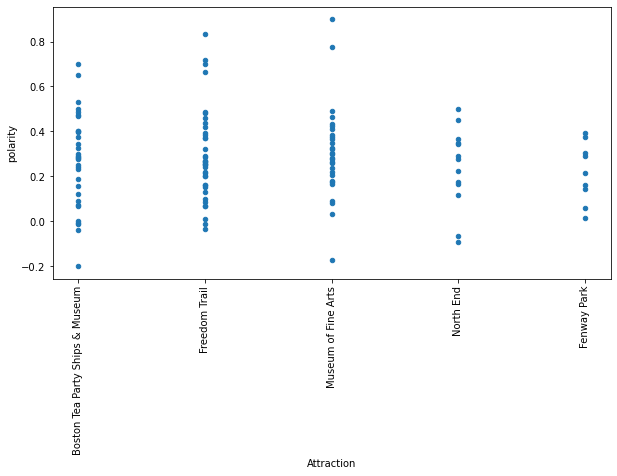

In [186]:
sample_size_loc2attr = len(ta_loc_2.Attraction)

sample_loc2attr = ta_loc_2.sample(sample_size_loc2attr).apply(sentiment_func, axis=1)
sample_loc2attr.plot.scatter('Attraction', 'polarity').tick_params(axis='x', labelrotation = 90)

- We might be seeing that the reason why there are so many positive reviews in the top 5 count is that a lot of them went to Fenway
- we might want to consider how we market to different groups based on these grams

In [187]:
corpus_loc_2 = ' '.join(ta_loc_2['Text']).lower()
tokens_loc_2 = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus_loc_2) if tokens not in stop_filters]

bigram_loc_2 = list(nltk.bigrams(tokens_loc_2))
fdist_bi_loc_2 = FreqDist(bigram_loc_2)
fdist_bi_loc_2.most_common(10)

[(('freedom', 'trail'), 16),
 (('tea', 'party'), 13),
 (('north', 'end'), 6),
 (('bunker', 'hill'), 5),
 (('american', 'history'), 4),
 (('history', 'city'), 4),
 (('along', 'trail'), 4),
 (('learn', 'history'), 4),
 (('museum', 'fine'), 4),
 (('fine', 'art'), 4)]

In [188]:
trigram_loc_2 = list(nltk.trigrams(tokens_loc_2))
fdist_tri_loc_2 = FreqDist(trigram_loc_2)
fdist_tri_loc_2.most_common(10)

[(('museum', 'fine', 'art'), 4),
 (('place', 'history', 'lover'), 2),
 (('must', 'visit', 'place'), 2),
 (('along', 'freedom', 'trail'), 2),
 (('freedom', 'trail', 'pass'), 2),
 (('bunker', 'hill', 'monument'), 2),
 (('learn', 'history', 'city'), 2),
 (('see', 'botticelli', 'exhibition'), 2),
 (('beautiful', 'peek', 'historic'), 1),
 (('peek', 'historic', 'tea'), 1)]

# Analysis of Review Text Polarity of the 20 most helpful users

In [189]:
helpful_users = ta_5vspoor.sort_values(by=['User_Helpful'], ascending = False).head(20)
helpful_users['Username'] = helpful_users['Username'].astype(str)
helpful_users

,Attraction,City,Posted,Visited,User_Reviews,User_Helpful,Review_Helpful,Rating,Text,Title,Username,User_Loc1,User_Loc2,User_Loc3,User_Loc4,User_Loc5,Old_Rating
22139,Museum of Fine Arts,Boston,2019-01-01,2018-12-01,"4,905",988,0,5,"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure.",Wonderful surprise,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,,5
20974,Museum of Fine Arts,Boston,2017-05-01,2017-04-01,"5,762",987,0,5,"In addition to seeing the Art in Bloom displays around the museum, we viewed Botticelli and Search for the Divine, Make Way for Ducklings: The Art of Robert McCloskey, and Matisse in the Studio. The Matisse exhibit was interesting as the you can see the works with the objects of inspiration including a pewter jug, a chocolate maker, an Andalusian vase, textiles, sculptures and masks.",Another lovely Art in Bloom!,Nikko4Me,MILFORD,MA,,,,5
19426,Freedom Trail,Boston,2019-01-01,2018-12-01,"4,905",987,0,4,"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way.",Boston best,Dirk W,ALEXANDRA HEADLAND,AUSTRALIA,,,,4
27259,Fenway Park,Boston,2019-05-01,2019-05-01,"9,552",973,0,5,I was here for an afternoon game. The weather was ok and it wasnâ€™t that crowded. Itâ€™s a great old park that is full of character and they embrace the past. Itâ€™s a great place to go. Iâ€™ve been to over 20 parks and this is second only to Wrigley.,Great park.,LostALot22,CHICAGO,IL,,,,5
21284,Museum of Fine Arts,Boston,2017-08-01,2017-05-01,"1,038",949,0,4,"My spouse and I visited Bostonâ€™s Museum of Fine Arts (MFA) on a Saturday afternoon in late May 2017. The museum is open daily from approximately 10:00 am until 5:00 pm, with extended hours until 10:00 pm on Wednesdays (including â€œWinedaysâ€ social event), Thursdays, and Fridays (including the monthly reoccurring â€œFirst Fridayâ€ cocktail party). Be sure to check their website for exact details. Admission costs $25 per adult, but you can enjoy a repeat visit within 10 days. If you visit the neighboring Isabella Stewart Gardner Museum (ISGM), you can save $2 on a combined admission. You are requested to check larger bags at the coat check counter. The over 600,000-square foot museum (founded in 1870) opened in its present Fenway-Kenmore neighborhood location in the early 1900s. The museum seems to occupy a series of interconnected buildings and wings (which makes navigating around a bit tricky). The museum collection is displayed in over 30 spacious, high-ceilinged galleries spread over four floors (including the basement). You can use either stairs or elevators to travel between the levels. Several dining options are available, including Bravo, American CafÃ©, Taste, and the Garden Cafeteria (listed in descending order from most formal/expensive to least). The expansive glass-enclosed courtyard hosts one of my favorite pieces in the museum, Dale Chihulyâ€™s 42-foot-high lime green icicle tower. Another favorite space is the rotunda with colonnades and frescoes painted by John Singer Sargent. (We loved how the museum placed a mirror in the center of the first floor space so that you can view the reflected ceiling paintings with

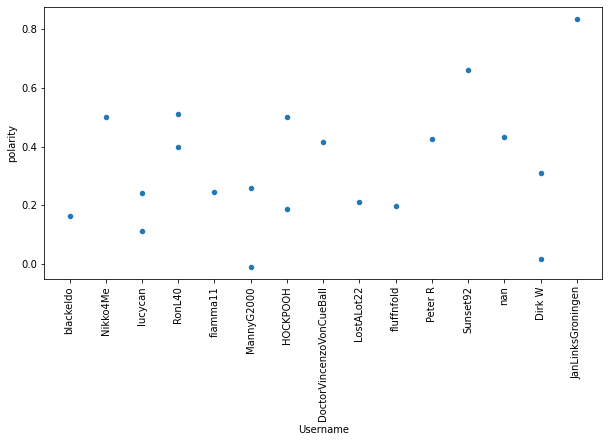

In [190]:
from textblob import TextBlob

def sentiment_func(x):
    sentiment = TextBlob(x['Text'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

sample = helpful_users.sample(20).apply(sentiment_func, axis=1)
sample.plot.scatter('Username', 'polarity').tick_params(axis='x', labelrotation = 90)

In [191]:
helpful_users_condensed = helpful_users[helpful_users.columns[[10, 5, 0, 8]]]
helpful_users_condensed

,Username,User_Helpful,Attraction,Text
22139,Dirk W,988,Museum of Fine Arts,"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."
20974,Nikko4Me,987,Museum of Fine Arts,"In addition to seeing the Art in Bloom displays around the museum, we viewed Botticelli and Search for the Divine, Make Way for Ducklings: The Art of Robert McCloskey, and Matisse in the Studio. The Matisse exhibit was interesting as the you can see the works with the objects of inspiration including a pewter jug, a chocolate maker, an Andalusian vase, textiles, sculptures and masks."
19426,Dirk W,987,Freedom Trail,"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."
27259,LostALot22,973,Fenway Park,I was here for an afternoon game. The weather was ok and it wasnâ€™t that crowded. Itâ€™s a great old park that is full of character and they embrace the past. Itâ€™s a great place to go. Iâ€™ve been to over 20 parks and this is second only to Wrigley.
21284,fluffnfold,949,Museum of Fine Arts,"My spouse and I visited Bostonâ€™s Museum of Fine Arts (MFA) on a Saturday afternoon in late May 2017. The museum is open daily from approximately 10:00 am until 5:00 pm, with extended hours until 10:00 pm on Wednesdays (including â€œWinedaysâ€ social event), Thursdays, and Fridays (including the monthly reoccurring â€œFirst Fridayâ€ cocktail party). Be sure to check their website for exact details. Admission costs $25 per adult, but you can enjoy a repeat visit within 10 days. If you visit the neighboring Isabella Stewart Gardner Museum (ISGM), you can save $2 on a combined admission. You are requested to check larger bags at the coat check counter. The over 600,000-square foot museum (founded in 1870) opened in its present Fenway-Kenmore neighborhood location in the early 1900s. The museum seems to occupy a series of interconnected buildings and wings (which makes navigating around a bit tricky). The museum collection is displayed in over 30 spacious, high-ceilinged galleries spread over four floors (including the basement). You can use either stairs or elevators to travel between the levels. Several dining options are available, including Bravo, American CafÃ©, Taste, and the Garden Cafeteria (listed in descending order from most formal/expensive to least). The expansive glass-enclosed courtyard hosts one of my favorite pieces in the museum, Dale Chihulyâ€™s 42-foot-high lime green icicle tower. Another favorite space is the rotunda with colonnades and frescoes painted by John Singer Sargent. (We loved how the museum placed a mirror in the center of the first floor space so that you can view the reflected ceiling paintings without craning your neck - an interesting technique that we had not seen before!) The architecture of the museum itself is almost as interesting as the objects that hang inside it. The MFA's vast and varied collection of approximately 450,000 objects includes works by American painters (Homer, Sargent, Hopper, and Cassatt), Impressionists (Monet, Manet, Renoir, Degas, Van Gogh, Cezanne), sculptures, furniture, Egyptian artifacts, Asian art from Japan and China, African masks, Native Ame

### Dirk W's Reviews and polarity assessment

In [192]:
print(helpful_users_condensed.loc[22139, 'Attraction'])
helpful_users_condensed.loc[22139, 'Text']

Museum of Fine Arts


"To be honest, it was not a planned visit and we only learned about this Museum whilst in Boston (the fact that it was free entry from 4pm that day encouraged us even more). But, boy, are we glad we went there ! What a great surprise to find such a huge collection of Dutch Golden Age and French impressionists ! Being European tourists, that's where we spent all of our time ; but we learned later that the American Art displays are even more impressive. So much splendid art, so little time . . . next time, for sure."

In [193]:
print(helpful_users_condensed.loc[19426, 'Attraction'])
helpful_users_condensed.loc[19426, 'Text']

Freedom Trail


"Just follow the red brick road, you cannot go wrong. We walked it several times on our way from Boston Common to a restaurant around Faneuil Hall. Then finally we bought tickets for the guided tour from the kiosk in Boston Common and joined a small group of about 8 people. The tour guide was most informative and entertaining : at $ 12 per person it is a small investment to learn heaps about an important period of Boston's (and America's !) history in a fun way."